Link to this article: https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/

What is AutoTS in Python?
AutoTS means Automatic Time Series, it is a machine learning library in Python used for the task of time series forecasting. I recently used it for forecasting the stock prices of Apple for the next 10 days and the resulting figures were so accurate. Some of the popular features of the AutoTS library in Python are:

It can be used to find the best time series forecasting model which depends on the type of data you are using.
It can handle both the univariate and multivariate time series.
It can also handle messy data by removing and filling the NaN values and it can also handle the outliers.
You can use the models provided by this Python library for deployment also.
These were some of the important features of the AutoTS library in Python. It has more features for time series forecasting, you can explore more about this library from its official documentation from here. In the section below, I will take you through a tutorial on the AutoTS library in Python for the task of stock price prediction.

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-08  154.639999  156.360001  152.679993  154.460007  152.767349   
2022-09-09  155.470001  157.820007  154.750000  157.369995  155.645477   
2022-09-12  159.589996  164.259995  159.300003  163.429993  161.639038   
2022-09-13  159.899994  160.539993  153.369995  153.839996  152.154175   
2022-09-14  154.789993  157.100006  153.610001  155.309998  153.608032   

               Volume  
Date                   
2022-09-08   84923800  
2022-09-09   68028800  
2022-09-12  104956000  
2022-09-13  122656600  
2022-09-14   87965400  


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-08,154.639999,156.360001,152.679993,154.460007,152.767349,84923800
2022-09-09,155.470001,157.820007,154.750000,157.369995,155.645477,68028800
2022-09-12,159.589996,164.259995,159.300003,163.429993,161.639038,104956000
2022-09-13,159.899994,160.539993,153.369995,153.839996,152.154175,122656600
2022-09-14,154.789993,157.100006,153.610001,155.309998,153.608032,87965400
...,...,...,...,...,...,...
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300
2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300


In [12]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-08,154.639999,156.360001,152.679993,154.460007,152.767349,84923800
1,2022-09-09,155.470001,157.820007,154.750000,157.369995,155.645477,68028800
2,2022-09-12,159.589996,164.259995,159.300003,163.429993,161.639038,104956000
3,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.154175,122656600
4,2022-09-14,154.789993,157.100006,153.610001,155.309998,153.608032,87965400


In [3]:
!pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.0/851.0 kB 2.0 MB/s eta 0:00:0000:0100:01


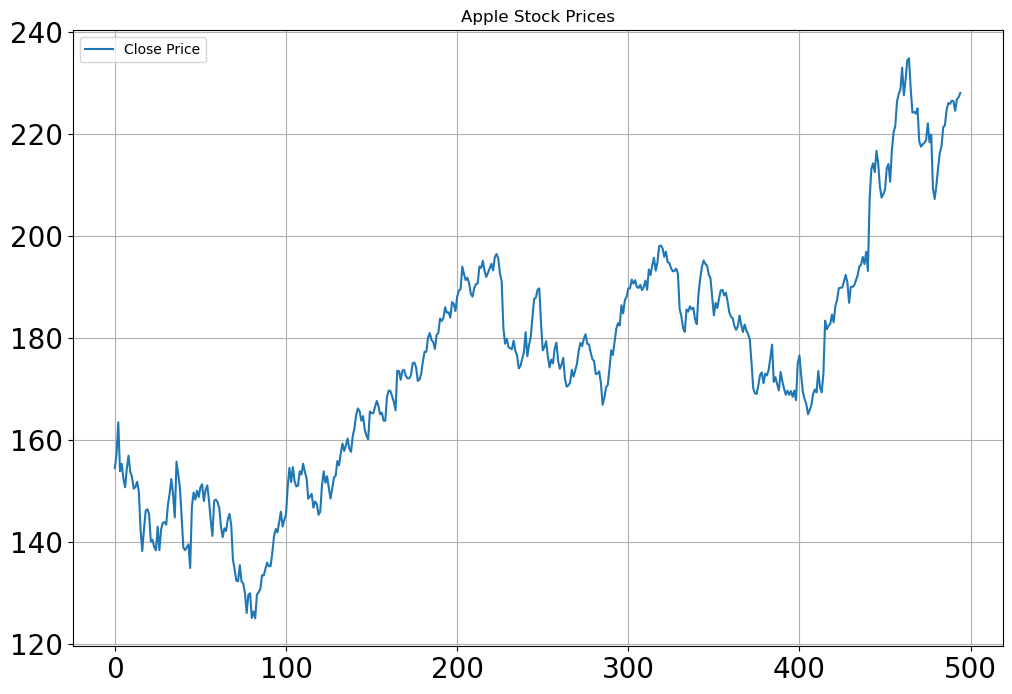

In [14]:
data = data[["Date", "Close"]]

data["Date"] = pd.to_datetime(data.Date)

data["Close"].plot(figsize=(12, 8), title="Apple Stock Prices", fontsize=20, label="Close Price")

import matplotlib.pyplot as plt
plt.legend()
plt.grid()
plt.show()

In [15]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50747D+03    |proj g|=  3.31747D+03

At iterate    1    f=  3.81657D+00    |proj g|=  2.76750D+00

At iterate    2    f=  3.58367D+00    |proj g|=  2.14163D+00

At iterate    3    f=  3.21581D+00    |proj g|=  1.18837D+00

At iterate    4    f=  2.95567D+00    |proj g|=  5.77243D-01

At iterate    5    f=  2.80172D+00    |proj g|=  2.60962D-01

At iterate    6    f=  2.65471D+00    |proj g|=  1.63090D-01

At iterate    7    f=  2.52895D+00    |proj g|=  1.00204D-01

At iterate    8    f=  2.49540D+00    |proj g|=  1.49577D-01

At iterate    9    f=  2.47806D+00    |proj g|=  9.49089D-02


 This problem is unconstrained.



At iterate   10    f=  2.45775D+00    |proj g|=  9.99879D-02

At iterate   11    f=  2.43587D+00    |proj g|=  1.07110D-01

At iterate   12    f=  2.41799D+00    |proj g|=  5.53315D-02

At iterate   13    f=  2.41324D+00    |proj g|=  3.34339D-02

At iterate   14    f=  2.41125D+00    |proj g|=  2.47837D-02

At iterate   15    f=  2.40892D+00    |proj g|=  2.52601D-02

At iterate   16    f=  2.40754D+00    |proj g|=  1.84881D-02

At iterate   17    f=  2.40646D+00    |proj g|=  1.57703D-02

At iterate   18    f=  2.40523D+00    |proj g|=  2.25690D-02

At iterate   19    f=  2.40439D+00    |proj g|=  1.49867D-02

At iterate   20    f=  2.40352D+00    |proj g|=  1.53851D-02

At iterate   21    f=  2.40201D+00    |proj g|=  3.70932D-02

At iterate   22    f=  2.40139D+00    |proj g|=  1.64142D-02

At iterate   23    f=  2.40111D+00    |proj g|=  8.21602D-03

At iterate   24    f=  2.40094D+00    |proj g|=  8.08453D-03

At iterate   25    f=  2.40089D+00    |proj g|=  1.50711D-02

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 20


2024-08-28 10:43:13.083944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
6/6 [==============================] - 4s 5ms/step - loss: 0.3818
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3703
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3598
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3474
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3372
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3245
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3234
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3106
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3036
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3108
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3015
Epoch 12/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2974
Epoch 13/50
6/6 [==============================] - 0s 4ms/step - loss: 0.

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 58 with model Cassandra in generation 0 of 20
FillNA method `pad` not known, returning original
Model Number: 59 with model Cassandra in generation 0 of 20
Model Number: 60 with model DMD in generation 0 of 20
Model Number: 61 with model DMD in generation 0 of 20
Model Number: 62 with model NVAR in generation 0 of 20
Model Number: 63 with model SectionalMotif in generation 0 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 64 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 64 in generation 0: FBProphet
Model Number: 65 with model ARDL in generation 0 of 20
Model Number: 66 with model FFT in generation 0 of 20
Model Number: 67 with model ConstantNaive in generation 0 of 20
Model Number: 68 with model LastValueNaive in generation 0 of 20
Model Number: 69 with model AverageValueNaive in generation 0 of 20
Model Number: 70 with model GLS in generation 0 of 20
Model Number: 71 with model SeasonalNaive in generation 0 of 20
Model Number: 72 with model GLM in generation 0 of 20
Template Eval Error: UnboundLocalError("local variable 'Xf' referenced before assignment") in model 72 in generation 0: GLM
Model Number: 73 with model ETS in generation 0 of 20
Model Number: 74 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 74 in generation 0: FBProphet
Mo

 This problem is unconstrained.


Model Number: 82 with model UnivariateMotif in generation 0 of 20
Model Number: 83 with model MultivariateMotif in generation 0 of 20
Model Number: 84 with model SectionalMotif in generation 0 of 20
Model Number: 85 with model NVAR in generation 0 of 20
Model Number: 86 with model Theta in generation 0 of 20
Model Number: 87 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (551) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larer than the sample available for estimation (189).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2023-11-22  22.0  0.0  2460270.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-11-23  23.0  0.0  2460271.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-11-24  24.0  0.0  2460272.5  0.0  0.0  0.0  0.0  0

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/thresholding.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  mean_perc_decrease = (


Model Number: 113 with model Cassandra in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 113 in generation 0: Cassandra
Model Number: 114 with model AverageValueNaive in generation 0 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params cubic {'0': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'output_distribution': 'uniform', 'n_quantiles': 62}, '3': {'lag': 1, 'fill': 'zero'}, '4': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '5': {'lag_1': 12, 'method': 20}}") in model 114 in generation 0: AverageValueNaive
Model Number: 115 with model GLS in generation 0 of 20
Model Number: 116 with model SeasonalityMotif in generation 0 of 20
Model Number: 117 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 1

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 121 with model Cassandra in generation 0 of 20
Model Number: 122 with model DMD in generation 0 of 20
Model Number: 123 with model AverageValueNaive in generation 0 of 20
Model Number: 124 with model UnivariateMotif in generation 0 of 20
Model Number: 125 with model FFT in generation 0 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 126 with model AverageValueNaive in generation 0 of 20
Model Number: 127 with model UnivariateMotif in generation 0 of 20
Model Number: 128 with model SectionalMotif in generation 0 of 20
Model Number: 129 with model ARIMA in generation 0 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13971D+02    |proj g|=  1.36821D+02

At iterate    1    f=  6.02572D+01    |proj g|=  2.94323D+01

At iterate    2    f=  4.94536D+01    |proj g|=  2.28344D+01

At iterate    3    f=  3.89972D+01    |proj g|=  1.62410D+01

At iterate    4    f=  3.15097D+01    |proj g|=  1.13691D+01

At iterate    5    f=  2.53653D+01    |proj g|=  7.84527D+00

At iterate    6    f=  1.82100D+01    |proj g|=  4.21471D+00

At iterate    7    f=  1.33893D+01    |proj g|=  2.29875D+00

At iterate    8    f=  1.01905D+01    |proj g|=  1.95013D+00

At iterate    9

 This problem is unconstrained.



At iterate   39    f=  5.10450D+00    |proj g|=  5.57034D-02

At iterate   40    f=  5.10420D+00    |proj g|=  4.54865D-02

At iterate   41    f=  5.10345D+00    |proj g|=  1.79820D-02

At iterate   42    f=  5.10216D+00    |proj g|=  3.83693D-02

At iterate   43    f=  5.09946D+00    |proj g|=  1.07988D-01

At iterate   44    f=  5.09313D+00    |proj g|=  1.21049D-01

At iterate   45    f=  5.08263D+00    |proj g|=  4.88977D-01

At iterate   46    f=  5.05290D+00    |proj g|=  1.48403D-01

At iterate   47    f=  5.04334D+00    |proj g|=  3.31990D-01

At iterate   48    f=  5.03709D+00    |proj g|=  5.46844D-01

At iterate   49    f=  5.00900D+00    |proj g|=  1.65095D-01

At iterate   50    f=  4.96161D+00    |proj g|=  9.58384D-02

At iterate   51    f=  4.96064D+00    |proj g|=  1.86629D-01

At iterate   52    f=  4.95912D+00    |proj g|=  1.61638D-01

At iterate   53    f=  4.94974D+00    |proj g|=  1.18517D-01

At iterate   54    f=  4.92418D+00    |proj g|=  2.25577D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 133 with model SectionalMotif in generation 0 of 20
Model Number: 134 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 134 in generation 0: DatepartRegression
Model Number: 135 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (35)') in model 135 in generation 0: SectionalMotif
Model Number: 136 with model RRVAR in generation 0 of 20
Model Number: 137 with model AverageValueNaive in generation 0 of 20
Model Number: 138 with model WindowRegression in generation 0 of 20
Model Number: 139 with model ARDL in generation 0 of 20
Model Number: 140 with model FFT in generation 0 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 141 with model SectionalMotif in generation 0 of 20
Model Number: 142 with model UnobservedComponents in generation 0 of 20
Model Number: 143 with model SeasonalityMotif in generation 0 of 20
Model Number: 144 with model AverageValueNaive in generation 0 of 20
Model Number: 145 with model VAR in generation 0 of 20
Template Eval Error: ValueError("x contains one or more constant columns. Column(s) 1 are constant. Adding a constant with trend='c' is not allowed.") in model 145 in generation 0: VAR
Model Number: 146 with model SeasonalityMotif in generation 0 of 20
Model Number: 147 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 147 in generation 0: MultivariateRegression
Model Number: 148 with model LastValueNaive in generation 0 of 20
Model Number: 149 with model ConstantNaive in generation 0 of 20
Model Number: 150 with model SeasonalNaive in generation 0 of 20
M

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 173 with model RRVAR in generation 0 of 20
Model Number: 174 with model GLS in generation 0 of 20
Model Number: 175 with model ConstantNaive in generation 0 of 20
Model Number: 176 with model NVAR in generation 0 of 20
Model Number: 177 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 177 in generation 0: ARCH
Model Number: 178 with model FBProphet in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 178 in generation 0: FBProphet
Model Number: 179 with model LastValueNaive in generation 0 of 20
Model Number: 180 with model LastValueNaive in generation 0 of 20
Model Number: 181 with model ConstantNaive in generation 0 of 20
Model Number: 182 with model UnivariateMotif in generation 0 of 20
Model Number: 183 with model SeasonalNaive in generation 0 of 20
Model Number: 184 with model ETS in generation 0 of 20
Model Number: 185 with m

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:550: RuntimeWarning: invalid value encountered in divide
  avg = np.multiply(a, wgt,
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.403e+00, tolerance: 1.600e-03
  model = cd_fast.enet_coordinate_descent(


Model Number: 191 with model SeasonalityMotif in generation 0 of 20
Model Number: 192 with model ConstantNaive in generation 0 of 20
Model Number: 193 with model WindowRegression in generation 0 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 194 with model DMD in generation 0 of 20
Model Number: 195 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 195 in generation 0: VECM
Model Number: 196 with model SectionalMotif in generation 0 of 20
Model Number: 197 with model SeasonalityMotif in generation 0 of 20
Model Number: 198 with model Theta in generation 0 of 20
Model Number: 199 with model UnivariateMotif in generation 0 of 20
Model Number: 200 with model GLM in generation 0 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 200 in generation 0: GLM
Model Number: 201 with model NVAR in generation 0 of 20
Model Number: 202 with model SectionalMotif in generation 0 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params ffill {'0': {'model': 'GLS', 'phi': 1, 'window': 10, 'transform_dict': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_o

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e+01, tolerance: 4.256e+00
  model = cd_fast.enet_coordinate_descent(
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


New Generation: 1 of 20
Model Number: 207 with model AverageValueNaive in generation 1 of 20
Model Number: 208 with model LastValueNaive in generation 1 of 20
Model Number: 209 with model AverageValueNaive in generation 1 of 20
Model Number: 210 with model UnivariateMotif in generation 1 of 20
Model Number: 211 with model SeasonalNaive in generation 1 of 20
Model Number: 212 with model SectionalMotif in generation 1 of 20
Model Number: 213 with model FFT in generation 1 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 214 with model FFT in generation 1 of 20
Model Number: 215 with model Cassandra in generation 1 of 20
Model Number: 216 with model DatepartRegression in generation 1 of 20
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0, inf). Got None instead.") in model 216 in generation 1: DatepartRegression
Model Number: 217 with model SectionalMotif in generation 1 of 20
Model Number: 218 with model SeasonalityMotif in generation 1 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 219 with model SeasonalityMotif in generation 1 of 20
Model Number: 220 with model DatepartRegression in generation 1 of 20
Model Number: 221 with model WindowRegression in generation 1 of 20
Model Number: 222 with model GLS in generation 1 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 This problem is unconstrained.


Model Number: 223 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23413D+00    |proj g|=  3.72725D-02

At iterate    1    f=  5.23329D+00    |proj g|=  7.85283D-03

At iterate    2    f=  5.23322D+00    |proj g|=  5.43578D-03

At iterate    3    f=  5.23317D+00    |proj g|=  5.43412D-03

At iterate    4    f=  5.23302D+00    |proj g|=  9.22529D-03

At iterate    5    f=  5.23262D+00    |proj g|=  1.99383D-02

At iterate    6    f=  5.23162D+00    |proj g|=  3.55661D-02

At iterate    7    f=  5.22907D+00    |proj g|=  5.79592D-02

At iterate    8    f=  5.22311D+00    |proj g|=  8.42383D-02

At iterate    9    f=  5.21130D+00    |proj g|=  1.02794D-01

At iterate   10    f=  5.19602D+00    |proj g|=  9.69866D-02

At iterate   11    f=  5.19533D+00    |proj g|=  1.07884D-01

At iterate   12    f=  5.18778D

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 243 with model UnivariateMotif in generation 1 of 20
Model Number: 244 with model Cassandra in generation 1 of 20
Model Number: 245 with model ConstantNaive in generation 1 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 246 with model MultivariateMotif in generation 1 of 20
Model Number: 247 with model MetricMotif in generation 1 of 20
Model Number: 248 with model WindowRegression in generation 1 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 248 in generation 1: WindowRegression
Model Number: 249 with model UnivariateMotif in generation 1 of 20
Model Number: 250 with model MultivariateRegression in generation 1 of 20
Model Number: 251 with model DatepartRegression in generation 1 of 20
Model Number: 252 with model NVAR in generation 1 of 20
Model Number: 253 with model MetricMotif in generation 1 of 20
Model Number: 254 with model MultivariateMotif in generation 1 of 20
Model Number: 255 with model NVAR in generation 1 of 20
Model Number: 256 with model MultivariateMotif in generation 1 of 20
Model Number: 257 with model FFT in generation 1 of 20
Model Number: 258 with model AverageValueNaive in generation 1 of 20
Model Number: 259 with model Avera

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 272 with model FFT in generation 1 of 20
Model Number: 273 with model FFT in generation 1 of 20
Model Number: 274 with model Theta in generation 1 of 20
Model Number: 275 with model GLS in generation 1 of 20
Model Number: 276 with model DatepartRegression in generation 1 of 20
Model Number: 277 with model GLS in generation 1 of 20
Model Number: 278 with model Cassandra in generation 1 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 279 with model ConstantNaive in generation 1 of 20
Model Number: 280 with model ETS in generation 1 of 20
Model Number: 281 with model Theta in generation 1 of 20
Model Number: 282 with model UnobservedComponents in generation 1 of 20
Model Number: 283 with model MetricMotif in generation 1 of 20
Model Number: 284 with model FFT in generation 1 of 20
Model Number: 285 with model ConstantNaive in generation 1 of 20
Model Number: 286 with model DMD in generation 1 of 20
ECR rank is 0
Model Number: 287 with model DatepartRegression in generation 1 of 20
Model Number: 288 with model ETS in generation 1 of 20
Model Number: 289 with model AverageValueNaive in generation 1 of 20
Model Number: 290 with model RRVAR in generation 1 of 20
Model Number: 291 with model NVAR in generation 1 of 20
Model Number: 292 with model ConstantNaive in generation 1 of 20
Model Number: 293 with model Cassandra in generation 1 of 20
Model Number: 294 with model AverageValueNaive in generation 1 of 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 295 with model UnivariateMotif in generation 1 of 20
Model Number: 296 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43946D+02    |proj g|=  1.44457D+03

At iterate    1    f=  7.25591D+01    |proj g|=  1.55695D+02

At iterate    2    f=  5.63130D+01    |proj g|=  1.13793D+02

At iterate    3    f=  3.05301D+01    |proj g|=  5.07055D+01

At iterate    4    f=  2.02378D+01    |proj g|=  2.79519D+01

At iterate    5    f=  1.33770D+01    |proj g|=  1.43578D+01

At iterate    6    f=  9.49918D+00    |proj g|=  7.61562D+00

At iterate    7    f=  7.10332D+00    |proj g|=  3.99721D+00

At iterate    8    f=  5.64677D+00    |proj g|=  2.10642D+00

At iterate    9    f=  4.74875D+00    |proj g|=  1.10823D+00

At iterate   10    f=  4.20207D+00    |proj g|=  5.85377D-01

At iterate   11    f=  3.8

 This problem is unconstrained.


Model Number: 302 with model RRVAR in generation 1 of 20
Model Number: 303 with model NVAR in generation 1 of 20
Model Number: 304 with model ARIMA in generation 1 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11239D+00    |proj g|=  6.10541D-01

At iterate    1    f=  9.67722D-01    |proj g|=  3.63686D-01

At iterate    2    f=  9.42992D-01    |proj g|=  8.24567D-02

At iterate    3    f=  9.40759D-01    |proj g|=  6.98945D-02

At iterate    4    f=  9.34428D-01    |proj g|=  5.21344D-02

At iterate    5    f=  9.34147D-01    |proj g|=  1.38664D-02

At iterate    6    f=  9.34127D-01    |proj g|=  6.72750D-04

At iterate    7    f=  9.34126D-01    |proj g|=  1.61915D-05

At iterate    8    f=  9.34126D-01    |proj g|=  1.08615D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint 

 This problem is unconstrained.


Model Number: 309 with model UnobservedComponents in generation 1 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 309 in generation 1: UnobservedComponents
Model Number: 310 with model RRVAR in generation 1 of 20
Model Number: 311 with model LastValueNaive in generation 1 of 20
Model Number: 312 with model SeasonalityMotif in generation 1 of 20
Model Number: 313 with model SeasonalityMotif in generation 1 of 20
Model Number: 314 with model Theta in generation 1 of 20
Model Number: 315 with model NVAR in generation 1 of 20
Model Number: 316 with model SectionalMotif in generation 1 of 20
Model Number: 317 with model UnobservedComponents in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 317 in generation 1: UnobservedComponents
Model Number: 318 with model LastValueNaive in generation 1 of 20
Model Number: 319 with model AverageValueNaive in generation 1 of 20
Model Number: 320 with model ARDL in g

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 341 with model AverageValueNaive in generation 1 of 20
Model Number: 342 with model DMD in generation 1 of 20
ECR rank is 0
Model Number: 343 with model ConstantNaive in generation 1 of 20
Model Number: 344 with model FFT in generation 1 of 20
Model Number: 345 with model ETS in generation 1 of 20
Model Number: 346 with model GLM in generation 1 of 20
New Generation: 2 of 20
Model Number: 347 with model UnivariateMotif in generation 2 of 20
Model Number: 348 with model Theta in generation 2 of 20
Model Number: 349 with model Theta in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52495D+00    |proj g|=  1.05753D+00

At iterate    5    f=  2.22538D+00    |proj g|=  8.25864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments expl

 This problem is unconstrained.


Model Number: 351 with model FFT in generation 2 of 20
Model Number: 352 with model ARDL in generation 2 of 20
Model Number: 353 with model MultivariateRegression in generation 2 of 20
Model Number: 354 with model ConstantNaive in generation 2 of 20
Model Number: 355 with model UnivariateMotif in generation 2 of 20
Model Number: 356 with model UnivariateMotif in generation 2 of 20
Model Number: 357 with model NVAR in generation 2 of 20
Model Number: 358 with model UnobservedComponents in generation 2 of 20
Model Number: 359 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44013D+00    |proj g|=  7.31226D-01

At iterate    1    f=  3.10484D+00    |proj g|=  1.83087D-01

At iterate    2    f=  3.05254D+00    |proj g|=  7.33780D-02

At iterate    3    f=  3.03340D+00    |proj g|=  7.29687D-02

At iterate    4

 This problem is unconstrained.



At iterate   18    f=  2.74761D+00    |proj g|=  5.32738D-02

At iterate   19    f=  2.74377D+00    |proj g|=  5.55409D-02

At iterate   20    f=  2.74022D+00    |proj g|=  6.19743D-02

At iterate   21    f=  2.73658D+00    |proj g|=  5.01066D-02

At iterate   22    f=  2.73327D+00    |proj g|=  3.71382D-02

At iterate   23    f=  2.73118D+00    |proj g|=  1.97481D-01

At iterate   24    f=  2.72882D+00    |proj g|=  3.80554D-02

At iterate   25    f=  2.72740D+00    |proj g|=  2.98973D-02

At iterate   26    f=  2.72522D+00    |proj g|=  6.50333D-02

At iterate   27    f=  2.72315D+00    |proj g|=  2.88086D-02

At iterate   28    f=  2.72147D+00    |proj g|=  2.60783D-02

At iterate   29    f=  2.72112D+00    |proj g|=  5.99238D-02

At iterate   30    f=  2.71928D+00    |proj g|=  1.27608D-02

At iterate   31    f=  2.71912D+00    |proj g|=  6.80284D-03

At iterate   32    f=  2.71902D+00    |proj g|=  7.39035D-03

At iterate   33    f=  2.71873D+00    |proj g|=  1.42857D-02

At iter


At iterate  151    f=  2.71538D+00    |proj g|=  6.91827D-04

At iterate  152    f=  2.71538D+00    |proj g|=  9.17737D-04

At iterate  153    f=  2.71538D+00    |proj g|=  5.44985D-04

At iterate  154    f=  2.71538D+00    |proj g|=  2.81001D-04

At iterate  155    f=  2.71538D+00    |proj g|=  1.31956D-03

At iterate  156    f=  2.71538D+00    |proj g|=  4.32933D-04

At iterate  157    f=  2.71538D+00    |proj g|=  2.93295D-04

At iterate  158    f=  2.71538D+00    |proj g|=  8.45285D-04

At iterate  159    f=  2.71538D+00    |proj g|=  4.97194D-04

At iterate  160    f=  2.71538D+00    |proj g|=  1.00310D-03

At iterate  161    f=  2.71538D+00    |proj g|=  2.14714D-04

At iterate  162    f=  2.71538D+00    |proj g|=  5.39560D-04

At iterate  163    f=  2.71538D+00    |proj g|=  1.47219D-03

At iterate  164    f=  2.71538D+00    |proj g|=  8.69155D-04

At iterate  165    f=  2.71538D+00    |proj g|=  8.76759D-04

At iterate  166    f=  2.71538D+00    |proj g|=  9.16909D-04

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 364 with model MetricMotif in generation 2 of 20
Model Number: 365 with model MetricMotif in generation 2 of 20
Model Number: 366 with model SeasonalityMotif in generation 2 of 20
Model Number: 367 with model LastValueNaive in generation 2 of 20
Model Number: 368 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06858D-01    |proj g|=  6.16753D-02

At iterate    1    f=  3.06737D-01    |proj g|=  1.21900D-02

At iterate    2    f=  3.06722D-01    |proj g|=  1.13854D-02

At iterate    3    f=  3.06611D-01    |proj g|=  1.73162D-02

At iterate    4    f=  3.06568D-01    |proj g|=  9.97530D-03

At iterate    5    f=  3.06495D-01    |proj g|=  8.62064D-03

At iterate    6    f=  3.06431D-01    |proj g|=  1.67038D-02

At iterate    7    f=  3.06281D-01    |proj g|=  2.76497D-02

At iterate    8    

 This problem is unconstrained.


Model Number: 374 with model Cassandra in generation 2 of 20
Template Eval Error: UnboundLocalError("local variable 'slope' referenced before assignment") in model 374 in generation 2: Cassandra
Model Number: 375 with model ConstantNaive in generation 2 of 20
Model Number: 376 with model LastValueNaive in generation 2 of 20
Model Number: 377 with model DMD in generation 2 of 20
Model Number: 378 with model ETS in generation 2 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 379 with model UnobservedComponents in generation 2 of 20
Model Number: 380 with model FFT in generation 2 of 20
Model Number: 381 with model GLM in generation 2 of 20
Model Number: 382 with model SectionalMotif in generation 2 of 20
Model Number: 383 with model NVAR in generation 2 of 20
Model Number: 384 with model GLS in generation 2 of 20
Model Number: 385 with model DMD in generation 2 of 20
ECR rank is 0
Model Number: 386 with model MetricMotif in generation 2 of 20
Model Number: 387 with model LastValueNaive in generation 2 of 20
Model Number: 388 with model LastValueNaive in generation 2 of 20
Model Number: 389 with model RRVAR in generation 2 of 20
Model Number: 390 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34672D+00    |proj g|=  1.42925D+04

At iterate    1    f=  2.52991D-0

 This problem is unconstrained.


Model Number: 392 with model ConstantNaive in generation 2 of 20
Model Number: 393 with model SeasonalNaive in generation 2 of 20
Model Number: 394 with model ETS in generation 2 of 20
Model Number: 395 with model LastValueNaive in generation 2 of 20
Model Number: 396 with model UnobservedComponents in generation 2 of 20
Model Number: 397 with model MetricMotif in generation 2 of 20
Model Number: 398 with model ConstantNaive in generation 2 of 20
Model Number: 399 with model Theta in generation 2 of 20
Model Number: 400 with model ETS in generation 2 of 20
Model Number: 401 with model ARIMA in generation 2 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33580D+01    |proj g|=  1.44572D+02

At iterate    1    f=  1.05333D+00    |proj g|=  8.22263D-01

At iterate    2    f=  7.32476D-02    |proj g|=  1.03205D+00

At iterate    3    f=  3.9

 This problem is unconstrained.



At iterate   28    f= -1.67652D-01    |proj g|=  3.43617D-02

At iterate   29    f= -1.68062D-01    |proj g|=  2.54881D-02

At iterate   30    f= -1.68286D-01    |proj g|=  3.00028D-02

At iterate   31    f= -1.68610D-01    |proj g|=  1.56355D-01

At iterate   32    f= -1.69272D-01    |proj g|=  1.27169D-01

At iterate   33    f= -1.72260D-01    |proj g|=  8.46273D-02

At iterate   34    f= -1.74698D-01    |proj g|=  5.96497D-02

At iterate   35    f= -1.75594D-01    |proj g|=  1.30661D-01

At iterate   36    f= -1.77115D-01    |proj g|=  1.21553D-01

At iterate   37    f= -1.79323D-01    |proj g|=  7.05697D-02

At iterate   38    f= -1.81172D-01    |proj g|=  9.52399D-02

At iterate   39    f= -1.82787D-01    |proj g|=  7.79741D-02

At iterate   40    f= -1.83339D-01    |proj g|=  9.25120D-02

At iterate   41    f= -1.84457D-01    |proj g|=  5.55398D-02

At iterate   42    f= -1.85039D-01    |proj g|=  4.02492D-02

At iterate   43    f= -1.85824D-01    |proj g|=  3.29209D-02

At iter

 This problem is unconstrained.


Model Number: 409 with model GLS in generation 2 of 20
Model Number: 410 with model Theta in generation 2 of 20
Model Number: 411 with model FFT in generation 2 of 20
Model Number: 412 with model MetricMotif in generation 2 of 20
Model Number: 413 with model MetricMotif in generation 2 of 20
Model Number: 414 with model ETS in generation 2 of 20
Model Number: 415 with model MetricMotif in generation 2 of 20
Model Number: 416 with model AverageValueNaive in generation 2 of 20
Model Number: 417 with model Cassandra in generation 2 of 20
Model Number: 418 with model WindowRegression in generation 2 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 419 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 419 in generation 2: DatepartRegression
Model Number: 420 with model GLS in generation 2 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 421 with model UnobservedComponents in generation 2 of 20
Model Number: 422 with model UnivariateMotif in generation 2 of 20
Model Number: 423 with model SectionalMotif in generation 2 of 20
Model Number: 424 with model DatepartRegression in generation 2 of 20
Model Number: 425 with model GLS in generation 2 of 20
Model Number: 426 with model Cassandra in generation 2 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.968e+03, tolerance: 5.861e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 427 with model DatepartRegression in generation 2 of 20
Model Number: 428 with model SectionalMotif in generation 2 of 20
Model Number: 429 with model MetricMotif in generation 2 of 20
Model Number: 430 with model DatepartRegression in generation 2 of 20
Model Number: 431 with model ARDL in generation 2 of 20
Model Number: 432 with model ARDL in generation 2 of 20
Model Number: 433 with model RRVAR in generation 2 of 20
Model Number: 434 with model UnivariateMotif in generation 2 of 20
Model Number: 435 with model SeasonalityMotif in generation 2 of 20
Model Number: 436 with model ETS in generation 2 of 20
Model Number: 437 with model DMD in generation 2 of 20
ECR rank is 0
Model Number: 438 with model RRVAR in generation 2 of 20
Model Number: 439 with model MetricMotif in generation 2 of 20
Model Number: 440 with model UnobservedComponents in generation 2 of 20
Model Number: 441 with model GLS in generation 2 of 20
Model Number: 442 with model Theta in generation 2 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 462 in generation 2: SeasonalityMotif
Model Number: 463 with model LastValueNaive in generation 2 of 20
Model Number: 464 with model DMD in generation 2 of 20
ECR rank is 0
Model Number: 465 with model LastValueNaive in generation 2 of 20
Model Number: 466 with model ETS in generation 2 of 20
Model Number: 467 with model MetricMotif in generation 2 of 20
Model Number: 468 with model NVAR in generation 2 of 20
Model Number: 469 with model NVAR in generation 2 of 20
Model Number: 470 with model MultivariateRegression in generation 2 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 471 with model Theta in generation 2 of 20
Model Number: 472 with model DMD in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'decimals': 0, 'on_transform': True, 'on_inverse': False}, '1': {'lag_1': 4, 'method': 'Median'}, '2': {'det_order': 1, 'k_ar_diff': 1}, '3': {'window': 28}, '4': {}}") in model 472 in generation 2: DMD
Model Number: 473 with model ConstantNaive in generation 2 of 20
Model Number: 474 with model AverageValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params cubic {'0': {'model': 'Poisson', 'phi': 0.999, 'window': 10, 'transform_dict': None}, '1': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_p

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 482 with model SectionalMotif in generation 2 of 20
Model Number: 483 with model ARDL in generation 2 of 20
Model Number: 484 with model ConstantNaive in generation 2 of 20
Model Number: 485 with model WindowRegression in generation 2 of 20
Model Number: 486 with model AverageValueNaive in generation 2 of 20
New Generation: 3 of 20
Model Number: 487 with model MetricMotif in generation 3 of 20
Model Number: 488 with model ARDL in generation 3 of 20
Model Number: 489 with model AverageValueNaive in generation 3 of 20
Model Number: 490 with model GLS in generation 3 of 20
Model Number: 491 with model UnobservedComponents in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 491 in generation 3: UnobservedComponents
Model Number: 492 with model RRVAR in generation 3 of 20
Model Number: 493 with model SectionalMotif in generation 3 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 494 with model GLS in generation 3 of 20
Model Number: 495 with model GLS in generation 3 of 20
Model Number: 496 with model ConstantNaive in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {'span': 12}}") in model 496 in generation 3: ConstantNaive
Model Number: 497 with model MultivariateMotif in generation 3 of 20
Model Number: 498 with model AverageValueNaive in generation 3 of 20
Model Number: 499 with model Cassandra in generation 3 of 20
Model Number: 500 with model UnobservedComponents in generation 3 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 501 with model SectionalMotif in generation 3 of 20
Model Number: 502 with model NVAR in generation 3 of 20
Model Number: 503 with model DMD in generation 3 of 20
Model Number: 504 with model ARIMA in generation 3 of 20
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill_mean_biased {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'method': 0.2}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 'alpha': 0.03}, 'fillna': 'mean', 'transform_dict': {'fillna': 'cubic', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0'

 This problem is unconstrained.


Model Number: 512 with model DMD in generation 3 of 20
Model Number: 513 with model ETS in generation 3 of 20
Model Number: 514 with model MultivariateRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 514 in generation 3: MultivariateRegression
Model Number: 515 with model LastValueNaive in generation 3 of 20
Model Number: 516 with model ETS in generation 3 of 20
Model Number: 517 with model DMD in generation 3 of 20
Model Number: 518 with model UnivariateMotif in generation 3 of 20
Model Number: 519 with model WindowRegression in generation 3 of 20
Model Number: 520 with model ARDL in generation 3 of 20
Model Number: 521 with model NVAR in generation 3 of 20
Model Number: 522 with model NVAR in generation 3 of 20
Model Number: 523 with model MetricMotif in generation 3 of 20
Model Number: 524 with model UnivariateMotif in generation 3 of 20
Model Number: 525 with model ARIMA in generation 3 of 20
RUNN

 This problem is unconstrained.


Model Number: 527 with model FFT in generation 3 of 20
Model Number: 528 with model ConstantNaive in generation 3 of 20
Model Number: 529 with model NVAR in generation 3 of 20
Model Number: 530 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18023D+03    |proj g|=  4.24873D+03

At iterate    1    f=  1.97481D+02    |proj g|=  4.42368D+02

At iterate    2    f=  1.52642D+02    |proj g|=  3.26490D+02

At iterate    3    f=  7.83572D+01    |proj g|=  1.43669D+02

At iterate    4    f=  4.93047D+01    |proj g|=  7.88139D+01

At iterate    5    f=  3.00205D+01    |proj g|=  4.00821D+01

At iterate    6    f=  1.92716D+01    |proj g|=  2.10505D+01

At iterate    7    f=  1.27304D+01    |proj g|=  1.09262D+01

At iterate    8    f=  8.83545D+00    |proj g|=  5.69810D+00

At iterate    9    f=  6.49002D+00    |pr

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 535 with model NVAR in generation 3 of 20
Model Number: 536 with model DMD in generation 3 of 20
Model Number: 537 with model RRVAR in generation 3 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05, 'rolling_periods': 90, 'center': False}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '1': {'constant': 0, 'reintroduction_model': None, 'fillna': None}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 1.5, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False}, '3': {'whiten': True, 'n_components': 100}, '4': {'part': 'trend', 'lamb': 1600}}") in model 537 in generation 3: RRVAR
Model Number: 538 with mod

 This problem is unconstrained.


Model Number: 563 with model RRVAR in generation 3 of 20
Model Number: 564 with model DatepartRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 564 in generation 3: DatepartRegression
Model Number: 565 with model DMD in generation 3 of 20
Model Number: 566 with model GLS in generation 3 of 20
Model Number: 567 with model SeasonalityMotif in generation 3 of 20
Model Number: 568 with model UnivariateMotif in generation 3 of 20
Model Number: 569 with model LastValueNaive in generation 3 of 20
Model Number: 570 with model MetricMotif in generation 3 of 20
Model Number: 571 with model DatepartRegression in generation 3 of 20
Model Number: 572 with model UnobservedComponents in generation 3 of 20
Model Number: 573 with model RRVAR in generation 3 of 20
Model Number: 574 with model SeasonalityMotif in generation 3 of 20
Model Number: 575 with model MetricMotif in generation 3 of 20
Model Number: 576 with model DM

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 582 with model MultivariateRegression in generation 3 of 20
Model Number: 583 with model MultivariateMotif in generation 3 of 20
Model Number: 584 with model SectionalMotif in generation 3 of 20
Model Number: 585 with model ETS in generation 3 of 20
Model Number: 586 with model RRVAR in generation 3 of 20
Model Number: 587 with model UnivariateMotif in generation 3 of 20
Model Number: 588 with model AverageValueNaive in generation 3 of 20
Model Number: 589 with model AverageValueNaive in generation 3 of 20
Model Number: 590 with model GLS in generation 3 of 20
Model Number: 591 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 591 in generation 3: ARDL
Model Number: 592 with model MetricMotif in generation 3 of 20
Model Number: 593 with model SeasonalityMotif in generation 3 of 20
Model Number: 594 with model LastValueNaive in generation 3 of 20
Template Eval Error: Exception('Transfo

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28789D-01    |proj g|=  3.04488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   3.381D-06   9.287D-01
  F =  0.92868536519306955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 596 with model NVAR in generation 3 of 20
Model Number: 597 with model MetricMotif in generation 3 of 20


 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 598 with model Cassandra in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 598 in generation 3: Cassandra
Model Number: 599 with model ETS in generation 3 of 20
Model Number: 600 with model ETS in generation 3 of 20
Model Number: 601 with model LastValueNaive in generation 3 of 20
Model Number: 602 with model ARDL in generation 3 of 20
Model Number: 603 with model UnobservedComponents in generation 3 of 20
Model Number: 604 with model DMD in generation 3 of 20
Model Number: 605 with model LastValueNaive in generation 3 of 20
Model Number: 606 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80935D-01    |proj g|=  3.21409D-02

At iterate    1    f=  4.80891D-01    |proj g|=  9.07593D-03

At iterate    2    f=  4.80753D-01  

 This problem is unconstrained.


Model Number: 608 with model DatepartRegression in generation 3 of 20
Model Number: 609 with model WindowRegression in generation 3 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 610 with model Theta in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52495D+00    |proj g|=  1.05753D+00

At iterate    5    f=  2.22538D+00    |proj g|=  8.25864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      1     0     0   1.612D-06   2.225D+00
  F =   2.2253751326369278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 611 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 613 with model MultivariateRegression in generation 3 of 20
Model Number: 614 with model ConstantNaive in generation 3 of 20
Model Number: 615 with model GLS in generation 3 of 20
Model Number: 616 with model UnivariateMotif in generation 3 of 20
Model Number: 617 with model ARIMA in generation 3 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41803D+03    |proj g|=  2.81418D+03

At iterate    1    f=  1.21430D+02    |proj g|=  2.83847D+02

At iterate    2    f=  9.37405D+01    |proj g|=  2.10119D+02

At iterate    3    f=  4.75390D+01    |proj g|=  9.21424D+01

At iterate    4    f=  2.98018D+01    |proj g|=  5.05015D+01

At iterate    5    f=  1.82198D+01    |proj g|=  2.56471D+01

At iterate    6    f=  1.19107D+01    |proj g|=  1.34647D+01

At iterate    7    f=  8.16580D+00    |proj g|=  6.99131D+00

At iterate    8   

 This problem is unconstrained.


Model Number: 622 with model ARDL in generation 3 of 20
Model Number: 623 with model AverageValueNaive in generation 3 of 20
Model Number: 624 with model ARDL in generation 3 of 20
Model Number: 625 with model LastValueNaive in generation 3 of 20
Model Number: 626 with model UnobservedComponents in generation 3 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 4 of 20
Model Number: 627 with model GLS in generation 4 of 20
Model Number: 628 with model GLM in generation 4 of 20
Template Eval Error: UnboundLocalError("local variable 'Xf' referenced before assignment") in model 628 in generation 4: GLM
Model Number: 629 with model ARDL in generation 4 of 20
Model Number: 630 with model MetricMotif in generation 4 of 20
Model Number: 631 with model SeasonalityMotif in generation 4 of 20
Model Number: 632 with model LastValueNaive in generation 4 of 20
Model Number: 633 with model DMD in generation 4 of 20
Model Number: 634 with model SeasonalityMotif in generation 4 of 20
Model Number: 635 with model SeasonalityMotif in generation 4 of 20
Model Number: 636 with model NVAR in generation 4 of 20
Model Number: 637 with model RRVAR in generation 4 of 20
Model Number: 638 with model RRVAR in generation 4 of 20
Model Number: 639 with model MultivariateMotif in generation 4 of 20
Model Number: 640 with model UnivariateMotif in generation

 This problem is unconstrained.


Model Number: 644 with model DMD in generation 4 of 20
ECR rank is 0
Model Number: 645 with model MultivariateMotif in generation 4 of 20
Model Number: 646 with model WindowRegression in generation 4 of 20
Model Number: 647 with model DMD in generation 4 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 This problem is unconstrained.


Model Number: 648 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39964D+05    |proj g|=  1.51722D+06

At iterate    1    f=  1.99927D+03    |proj g|=  4.68671D+03

At iterate    2    f=  1.35801D+03    |proj g|=  3.25285D+03

At iterate    3    f=  6.41798D+02    |proj g|=  1.58220D+03

At iterate    4    f=  3.49702D+02    |proj g|=  8.66765D+02

At iterate    5    f=  1.81796D+02    |proj g|=  4.43307D+02

At iterate    6    f=  9.78789D+01    |proj g|=  2.29626D+02

At iterate    7    f=  5.33252D+01    |proj g|=  1.17579D+02

At iterate    8    f=  2.98291D+01    |proj g|=  6.03326D+01

At iterate    9    f=  1.71894D+01    |proj g|=  3.09474D+01

At iterate   10    f=  1.03494D+01    |proj g|=  1.59372D+01

At iterate   11    f=  6.60329D+00    |proj g|=  8.22781D+00

At iterate   12    f=  4.54821D

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 653 with model DMD in generation 4 of 20
ECR rank is 0
Model Number: 654 with model NVAR in generation 4 of 20
Model Number: 655 with model MetricMotif in generation 4 of 20
Model Number: 656 with model NVAR in generation 4 of 20
Model Number: 657 with model SeasonalityMotif in generation 4 of 20
Model Number: 658 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85497D+00    |proj g|=  7.66883D-04

At iterate    1    f=  2.85496D+00    |proj g|=  7.05197D-04

At iterate    2    f=  2.85492D+00    |proj g|=  8.21201D-04

At iterate    3    f=  2.85491D+00    |proj g|=  6.05263D-05

At iterate    4    f=  2.85491D+00    |proj g|=  4.04623D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 661 with model MultivariateRegression in generation 4 of 20
Model Number: 662 with model NVAR in generation 4 of 20
Model Number: 663 with model UnivariateMotif in generation 4 of 20
Model Number: 664 with model GLM in generation 4 of 20
Model Number: 665 with model Cassandra in generation 4 of 20
Model Number: 666 with model SectionalMotif in generation 4 of 20
Model Number: 667 with model NVAR in generation 4 of 20
Model Number: 668 with model NVAR in generation 4 of 20
Model Number: 669 with model AverageValueNaive in generation 4 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 670 with model MultivariateRegression in generation 4 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 670 in generation 4: MultivariateRegression
Model Number: 671 with model WindowRegression in generation 4 of 20
Model Number: 672 with model MetricMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'lag_1': 4, 'method': 2}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': False, 'selection': 'cyclic'}}, 'datepart_method': ['weekdaymonthofyear', 'quarter', 'dayofweek'], 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_m

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 675 with model DatepartRegression in generation 4 of 20
Model Number: 676 with model ETS in generation 4 of 20
Model Number: 677 with model DMD in generation 4 of 20
Model Number: 678 with model WindowRegression in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 678 in generation 4: WindowRegression
Model Number: 679 with model MetricMotif in generation 4 of 20
Model Number: 680 with model Theta in generation 4 of 20
Model Number: 681 with model Theta in generation 4 of 20
Model Number: 682 with model MultivariateMotif in generation 4 of 20
Model Number: 683 with model UnivariateMotif in generation 4 of 20
Model Number: 684 with model UnobservedComponents in generation 4 of 20
Model Number: 685 with model UnobservedComponents in generation 4 of 20
Model Number: 686 with model Theta in generation 4 of 20
Model Number: 687 with model SeasonalNaive in generation 4 of 20
Model Number: 688 with model RRVAR in

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 699 with model GLS in generation 4 of 20
Model Number: 700 with model UnivariateMotif in generation 4 of 20
Model Number: 701 with model FFT in generation 4 of 20
Model Number: 702 with model NVAR in generation 4 of 20
Model Number: 703 with model MultivariateRegression in generation 4 of 20
Model Number: 704 with model Cassandra in generation 4 of 20
Model Number: 705 with model WindowRegression in generation 4 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 706 with model MetricMotif in generation 4 of 20
Model Number: 707 with model LastValueNaive in generation 4 of 20
Model Number: 708 with model MetricMotif in generation 4 of 20
Model Number: 709 with model GLS in generation 4 of 20
Model Number: 710 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.13138D+04    |proj g|=  4.79185D+04

At iterate    1    f=  1.27825D+03    |proj g|=  3.26261D+03

At iterate    2    f=  1.07756D+03    |proj g|=  2.73035D+03

At iterate    3    f=  4.66608D+02    |proj g|=  1.10117D+03

At iterate    4    f=  2.75601D+02    |proj g|=  6.07428D+02

At iterate    5    f=  1.50607D+02    |proj g|=  3.01604D+02

At iterate    6    f=  8.68690D+01    |proj g|=  1.57076D+02

At iterate    7    f=  5.01959D+01    |proj g|=  8.06972D+01

At iterate    8    f=  2.97080D+

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 713 with model RRVAR in generation 4 of 20
Model Number: 714 with model AverageValueNaive in generation 4 of 20
Model Number: 715 with model SeasonalityMotif in generation 4 of 20
Model Number: 716 with model DatepartRegression in generation 4 of 20
Model Number: 717 with model DMD in generation 4 of 20
Model Number: 718 with model ETS in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {}, '3': {'window_size': 90, 'alpha': 4.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '4': {}}") in model 718 in generation 4: ETS
Model Number: 719 with model Theta in generation 4 of 20
Model Number: 720 with model UnobservedComponents in generation 4 of 20
Model Number: 721 with model FFT in generation 4 of 20
Model Number: 722 with model MultivariateRegression in generation 4 of 20
Template Eval Error: Exception("Transformer Seaso

 This problem is unconstrained.


Model Number: 730 with model UnivariateMotif in generation 4 of 20
Model Number: 731 with model ARIMA in generation 4 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00410D+01    |proj g|=  3.23592D+04

At iterate    1    f= -1.04165D+01    |proj g|=  6.79494D+04
  ys=-2.024E-01  -gs= 1.841E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     36      2     1     0   6.795D+04  -1.042D+01
  F =  -10.416479852004560     

ABNORMAL_TERMINAT

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


Model Number: 734 with model UnobservedComponents in generation 4 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'model': 'Poisson', 'phi': 1, 'window': 30, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '3': {}}") in model 734 in generation 4: UnobservedComponents
Model Number: 735 with model SeasonalityMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': False, 'support_fraction': None}, 'fillna': 'ffill', 'transform_dict': {'transforma

 This problem is unconstrained.



At iterate    5    f=  3.31565D+00    |proj g|=  2.27832D-01

At iterate    6    f=  3.27147D+00    |proj g|=  7.49900D-01

At iterate    7    f=  2.93016D+00    |proj g|=  3.84890D-01

At iterate    8    f=  2.59606D+00    |proj g|=  3.26682D-01

At iterate    9    f=  2.45916D+00    |proj g|=  1.74639D-01

At iterate   10    f=  2.43008D+00    |proj g|=  3.61946D-01

At iterate   11    f=  2.31256D+00    |proj g|=  3.16580D-01

At iterate   12    f=  2.18410D+00    |proj g|=  5.10655D-01

At iterate   13    f=  2.14359D+00    |proj g|=  1.87984D-01

At iterate   14    f=  2.12115D+00    |proj g|=  1.06259D-01

At iterate   15    f=  2.10887D+00    |proj g|=  6.67365D-02

At iterate   16    f=  2.09772D+00    |proj g|=  5.89827D-02

At iterate   17    f=  2.08767D+00    |proj g|=  6.52451D-02

At iterate   18    f=  2.07906D+00    |proj g|=  3.84494D-02

At iterate   19    f=  2.07189D+00    |proj g|=  5.13756D-02

At iterate   20    f=  2.06773D+00    |proj g|=  5.41101D-02

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 773 with model AverageValueNaive in generation 5 of 20
Model Number: 774 with model Theta in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 775 with model Theta in generation 5 of 20
Model Number: 776 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 777 with model UnivariateMotif in generation 5 of 20
Model Number: 778 with model UnivariateMotif in generation 5 of 20
Model Number: 779 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49828D+00    |proj g|=  6.41767D-03

At iterate    1    f=  2.49820D+00    |proj g|=  3.37650D-03

At iterate    2    f=  2.49819D+00    |proj g|=  1.56141D-03

At iterate    3    f=  2.49818D+00    |proj g|=  7.06917D-05

At iterate    4    f=  2.49818D+00    |proj g|=  1.25262D-04


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    5    f=  2.49818D+00    |proj g|=  4.92209D-05

At iterate    6    f=  2.49818D+00    |proj g|=  4.84700D-05

At iterate    7    f=  2.49818D+00    |proj g|=  1.21060D-04

At iterate    8    f=  2.49818D+00    |proj g|=  2.22912D-04

At iterate    9    f=  2.49818D+00    |proj g|=  2.70000D-04

At iterate   10    f=  2.49818D+00    |proj g|=  1.47976D-04

At iterate   11    f=  2.49818D+00    |proj g|=  4.05695D-05

At iterate   12    f=  2.49818D+00    |proj g|=  5.94866D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     15      1     0     0   5.949D-06   2.498D+00
  F =   2.49818406581

 This problem is unconstrained.


Model Number: 786 with model UnobservedComponents in generation 5 of 20
Model Number: 787 with model UnivariateMotif in generation 5 of 20
Model Number: 788 with model MetricMotif in generation 5 of 20
Model Number: 789 with model MultivariateRegression in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 790 with model DatepartRegression in generation 5 of 20
Model Number: 791 with model MetricMotif in generation 5 of 20
Model Number: 792 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05134D+00    |proj g|=  6.55379D-02

At iterate    1    f=  2.04378D+00    |proj g|=  5.62652D-02

At iterate    2    f=  2.03396D+00    |proj g|=  5.36070D-02

At iterate    3    f=  1.98001D+00    |proj g|=  8.80505D-02

At iterate    4    f=  1.96070D+00    |proj g|=  2.58969D-02

At iterate    5    f=  1.95975D+00    |proj g|=  1.94345D-02

At iterate    6    f=  1.95938D+00    |proj g|=  2.58651D-03

At iterate    7    f=  1.95937D+00    |proj g|=  8.72916D-04

At iterate    8    f=  1.95937D+00    |proj g|=  4.44334D-04

At iterate    9    f=  1.95937D+00    |proj g|=  3.91192D-04

At iterate   10    f= 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   23    f=  1.95722D+00    |proj g|=  4.98206D-02

At iterate   24    f=  1.95706D+00    |proj g|=  6.01260D-02

At iterate   25    f=  1.95321D+00    |proj g|=  4.69470D-02

At iterate   26    f=  1.94960D+00    |proj g|=  3.54902D-02

At iterate   27    f=  1.94773D+00    |proj g|=  1.81608D-02

At iterate   28    f=  1.94634D+00    |proj g|=  2.57984D-02

At iterate   29    f=  1.94474D+00    |proj g|=  2.53402D-02

At iterate   30    f=  1.94328D+00    |proj g|=  2.41965D-02

At iterate   31    f=  1.94124D+00    |proj g|=  2.45059D-02

At iterate   32    f=  1.93912D+00    |proj g|=  2.13649D-02

At iterate   33    f=  1.93664D+00    |proj g|=  1.95723D-02

At iterate   34    f=  1.93638D+00    |proj g|=  1.25151D-02

At iterate   35    f=  1.93584D+00    |proj g|=  4.54755D-03

At iterate   36    f=  1.93566D+00    |proj g|=  3.36971D-03

At iterate   37    f=  1.93555D+00    |proj g|=  6.02165D-03

At iterate   38    f=  1.93538D+00    |proj g|=  3.62455D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 796 with model GLS in generation 5 of 20
Model Number: 797 with model FFT in generation 5 of 20
Model Number: 798 with model ARIMA in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17439D+03    |proj g|=  1.88818D+05

At iterate    1    f=  1.08810D+00    |proj g|=  6.78301D-01

At iterate    2    f= -1.65185D+00    |proj g|=  8.96541D-01
  ys=-1.093E+00  -gs= 1.519E+00 BFGS update SKIPPED

At iterate    3    f= -1.65313D+00    |proj g|=  8.31237D-01

At iterate    4    f= -1.65833D+00    |proj g|=  1.81529D+00

At iterate    5    f= -1.66093D+00    |proj g|=  2.58265D+00

At iterate    6    f= -1.67066D+00    |proj g|=  4.28088D+00

At iterate    7    f= -1.69037D+00    |proj g|=  6.12857D+00

At iterate    8    f= -1.73677D+00    |proj g|=  8.38614D+00

At iterate    9    f= -1.83384D+00    |proj g|=  1.0513

 This problem is unconstrained.



At iterate   28    f= -2.79336D+00    |proj g|=  1.79665D+00

At iterate   29    f= -2.79440D+00    |proj g|=  2.39569D-01

At iterate   30    f= -2.79491D+00    |proj g|=  2.44055D-01

At iterate   31    f= -2.80123D+00    |proj g|=  2.47908D-01

At iterate   32    f= -2.84267D+00    |proj g|=  1.11841D+01

At iterate   33    f= -2.86100D+00    |proj g|=  1.28918D+01

At iterate   34    f= -2.87882D+00    |proj g|=  2.81967D-01

At iterate   35    f= -2.88598D+00    |proj g|=  1.09470D+00

At iterate   36    f= -2.89590D+00    |proj g|=  1.02103D+00

At iterate   37    f= -2.89621D+00    |proj g|=  3.93188D+00

At iterate   38    f= -2.89936D+00    |proj g|=  1.39661D+00

At iterate   39    f= -2.90149D+00    |proj g|=  1.81036D+00

At iterate   40    f= -2.90301D+00    |proj g|=  6.91276D-01

At iterate   41    f= -2.90350D+00    |proj g|=  3.46525D-01

At iterate   42    f= -2.90370D+00    |proj g|=  2.21012D-01

At iterate   43    f= -2.90385D+00    |proj g|=  5.28551D-01

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   13    f=  3.00838D+00    |proj g|=  5.89676D-02

At iterate   14    f=  3.00487D+00    |proj g|=  6.29648D-02

At iterate   15    f=  2.99894D+00    |proj g|=  5.34220D-02

At iterate   16    f=  2.99072D+00    |proj g|=  4.49366D-02

At iterate   17    f=  2.98672D+00    |proj g|=  1.05293D-01

At iterate   18    f=  2.98424D+00    |proj g|=  4.90898D-02

At iterate   19    f=  2.98365D+00    |proj g|=  8.74151D-03

At iterate   20    f=  2.98356D+00    |proj g|=  4.80937D-03

At iterate   21    f=  2.98339D+00    |proj g|=  5.39517D-03

At iterate   22    f=  2.98317D+00    |proj g|=  5.22924D-03

At iterate   23    f=  2.98285D+00    |proj g|=  6.95068D-03

At iterate   24    f=  2.98249D+00    |proj g|=  6.28263D-03

At iterate   25    f=  2.98238D+00    |proj g|=  7.84669D-03

At iterate   26    f=  2.98232D+00    |proj g|=  4.47372D-03

At iterate   27    f=  2.98230D+00    |proj g|=  2.23590D-03

At iterate   28    f=  2.98226D+00    |proj g|=  6.76904D-03

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 809 with model SeasonalNaive in generation 5 of 20
Model Number: 810 with model UnivariateMotif in generation 5 of 20
Model Number: 811 with model SeasonalNaive in generation 5 of 20
Model Number: 812 with model NVAR in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 813 with model DMD in generation 5 of 20
Model Number: 814 with model Cassandra in generation 5 of 20
Model Number: 815 with model SectionalMotif in generation 5 of 20
Model Number: 816 with model SeasonalNaive in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 817 with model ConstantNaive in generation 5 of 20
Model Number: 818 with model Cassandra in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 819 with model Theta in generation 5 of 20
Model Number: 820 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 821 with model AverageValueNaive in generation 5 of 20
Model Number: 822 with model FFT in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 823 with model ETS in generation 5 of 20
Model Number: 824 with model MetricMotif in generation 5 of 20
Model Number: 825 with model ARDL in generation 5 of 20
Model Number: 826 with model MetricMotif in generation 5 of 20
Model Number: 827 with model UnivariateMotif in generation 5 of 20
Template Eval Error: IndexError('index 148 is out of bounds for axis 0 with size 1') in model 827 in generation 5: UnivariateMotif
Model Number: 828 with model ETS in generation 5 of 20
Model Number: 829 with model WindowRegression in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 830 with model MetricMotif in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 831 with model MetricMotif in generation 5 of 20
Model Number: 832 with model LastValueNaive in generation 5 of 20
Model Number: 833 with model FFT in generation 5 of 20
Model Number: 834 with model UnobservedComponents in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 835 with model UnobservedComponents in generation 5 of 20
Model Number: 836 with model RRVAR in generation 5 of 20
Model Number: 837 with model GLS in generation 5 of 20
Model Number: 838 with model LastValueNaive in generation 5 of 20
Model Number: 839 with model DatepartRegression in generation 5 of 20
Model Number: 840 with model AverageValueNaive in generation 5 of 20
Model Number: 841 with model ARDL in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 842 with model SectionalMotif in generation 5 of 20
Model Number: 843 with model LastValueNaive in generation 5 of 20
Model Number: 844 with model GLS in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 845 with model Theta in generation 5 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04414D+00    |proj g|=  6.72752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.794D-08   2.044D+00
  F =   2.0440603920887104     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 846 with model DMD in generation 5 of 20
ECR rank is 0
Model Number: 847 with model AverageValueNaive in generation 5 of 20

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 849 with model MultivariateMotif in generation 5 of 20
Model Number: 850 with model Theta in generation 5 of 20
Model Number: 851 with model SectionalMotif in generation 5 of 20
Model Number: 852 with model NVAR in generation 5 of 20
Model Number: 853 with model MetricMotif in generation 5 of 20
Model Number: 854 with model MultivariateMotif in generation 5 of 20
Model Number: 855 with model UnobservedComponents in generation 5 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 855 in generation 5: UnobservedComponents
Model Number: 856 with model ARDL in generation 5 of 20
Model Number: 857 with model SectionalMotif in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 858 with model MultivariateRegression in generation 5 of 20
Model Number: 859 with model LastValueNaive in generation 5 of 20
Model Number: 860 with model GLS in generation 5 of 20
Model Number: 861 with model SeasonalNaive in generation 5 of 20
Model Number: 862 with model LastValueNaive in generation 5 of 20
Model Number: 863 with model NVAR in generation 5 of 20
Model Number: 864 with model ARIMA in generation 5 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77250D+00    |proj g|=  7.45558D-03

At iterate    1    f=  2.77244D+00    |proj g|=  3.62932D-03

At iterate    2    f=  2.77242D+00    |proj g|=  2.90861D-03

At iterate    3    f=  2.77239D+00    |proj g|=  4.04183D-04

At iterate    4    f=  2.77237D+00    |proj g|=  4.27258D-04

At iterate    5    f=  2.77234D+00    |proj g|=  4.28645D-04

At iterate    6    f=  2.77234D+00    |proj g|=  1.09834D-04

At iterate    7    f=  2.77234D+00    |proj g|=  7.11387D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function

 This problem is unconstrained.


Model Number: 866 with model MetricMotif in generation 5 of 20
Model Number: 867 with model DatepartRegression in generation 5 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 867 in generation 5: DatepartRegression
Model Number: 868 with model ARDL in generation 5 of 20
Model Number: 869 with model AverageValueNaive in generation 5 of 20
Model Number: 870 with model NVAR in generation 5 of 20
Model Number: 871 with model NVAR in generation 5 of 20
Model Number: 872 with model ConstantNaive in generation 5 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 873 with model MetricMotif in generation 5 of 20
Model Number: 874 with model UnobservedComponents in generation 5 of 20
Model Number: 875 with model UnobservedComponents in generation 5 of 20
Model Number: 876 with model LastValueNaive in generation 5 of 20
Model Number: 877 with model LastValueNaive in generation 5 of 20
Model Number: 878 with model MetricMotif in generation 5 of 20
New Generation: 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 879 with model UnobservedComponents in generation 6 of 20
Model Number: 880 with model WindowRegression in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 880 in generation 6: WindowRegression
Model Number: 881 with model MultivariateMotif in generation 6 of 20
Model Number: 882 with model ETS in generation 6 of 20
Model Number: 883 with model MetricMotif in generation 6 of 20
Model Number: 884 with model SeasonalNaive in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 885 with model UnobservedComponents in generation 6 of 20
Model Number: 886 with model AverageValueNaive in generation 6 of 20
Model Number: 887 with model AverageValueNaive in generation 6 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {}, '3': {'low': 6, 'high': 364, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '4': {'lag': 2, 'fill': 'bfill'}}") in model 887 in generation 6: AverageValueNaive
Model Number: 888 with model AverageValueNaive in generation 6 of 20
Model Number: 889 with model MetricMotif in generation 6 of 20
Model Number: 890 with model MetricMotif in generation 6 of 20
Model Number: 891 with model UnivariateMotif in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 892 with model SectionalMotif in generation 6 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'method': 'remove', 'std_threshold': 4, 'fillna': 'rolling_mean_24'}, '1': {}, '2': {'lag_1': 12, 'method': 'LastValue'}, '3': {'det_order': 1, 'k_ar_diff': 1}, '4': {}}") in model 892 in generation 6: SectionalMotif
Model Number: 893 with model UnivariateMotif in generation 6 of 20
Model Number: 894 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32185D+03    |proj g|=  3.63431D+05

At iterate    1    f=  1.29249D+00    |proj g|=  7.26369D-01

At iterate    2    f=  7.52289D-01    |proj g|=  1.01033D+00

At iterate    3    f=  6.84656D-01    |proj g|=  1.27346D+00

At iterate    4    f= -1.44093D+00    |proj g|=  3.58093D+00
  ys=-9.209E-01  -gs

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 897 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58267D+04    |proj g|=  3.22725D+07

At iterate    1    f=  1.28349D+00    |proj g|=  7.21060D-01

At iterate    2    f= -1.26047D+00    |proj g|=  6.84250D-01

At iterate    3    f= -1.26534D+00    |proj g|=  2.30891D+00

At iterate    4    f= -1.50582D+00    |proj g|=  5.76428D+00

At iterate    5    f= -1.80159D+00    |proj g|=  1.23406D+01

At iterate    6    f= -2.54994D+00    |proj g|=  5.84773D+00

At iterate    7    f= -3.01972D+00    |proj g|=  2.42882D+01

At iterate    8    f= -3.04389D+00    |proj g|=  2.42050D+00

At iterate    9    f= -3.13569D+00    |proj g|=  1.11293D+00

At iterate   10    f= -3.35375D+00    |proj g|=  3.07830D+01

At iterate   11    f= -3.80237D+00    |proj g|=  2.10000D+01

At iterate   12    f= -3.94638D

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 899 with model UnobservedComponents in generation 6 of 20
Model Number: 900 with model DatepartRegression in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 901 with model MetricMotif in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 902 with model Theta in generation 6 of 20
Model Number: 903 with model SectionalMotif in generation 6 of 20
Model Number: 904 with model MultivariateMotif in generation 6 of 20
Model Number: 905 with model NVAR in generation 6 of 20
Model Number: 906 with model LastValueNaive in generation 6 of 20
Model Number: 907 with model UnobservedComponents in generation 6 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Model Number: 908 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46382D+04    |proj g|=  2.91017D+04

At iterate    1    f=  9.51428D+02    |proj g|=  2.39856D+03

At iterate    2    f=  7.79822D+02    |proj g|=  1.93920D+03

At iterate    3    f=  3.50185D+02    |proj g|=  7.99446D+02

At iterate    4    f=  2.07860D+02    |proj g|=  4.39568D+02

At iterate    5    f=  1.14935D+02    |proj g|=  2.19223D+02

At iterate    6    f=  6.68232D+01    |proj g|=  1.14225D+02

At iterate    7    f=  3.90130D+01    |proj g|=  5.87611D+01

At iterate    8    f=  2.33877D+01    |proj g|=  3.04748D+01

At iterate    9    f=  1.44356D+01    |proj g|=  1.58056D+01

At iterate   10    f=  9.32333D+00    |proj g|=  8.22898D+00

At iterate   11    f=  6.39960D+00    |proj g|=  4.30109D+00

At iterate   12    f=  4.73563

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 910 with model MetricMotif in generation 6 of 20
Model Number: 911 with model DMD in generation 6 of 20
ECR rank is 0
Model Number: 912 with model SectionalMotif in generation 6 of 20
Model Number: 913 with model UnobservedComponents in generation 6 of 20
Model Number: 914 with model MetricMotif in generation 6 of 20
Model Number: 915 with model WindowRegression in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Model Number: 916 with model GLS in generation 6 of 20
Model Number: 917 with model ConstantNaive in generation 6 of 20
Model Number: 918 with model AverageValueNaive in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 919 with model MultivariateRegression in generation 6 of 20
Model Number: 920 with model FFT in generation 6 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 920 in generation 6: FFT
Model Number: 921 with model Theta in generation 6 of 20
Model Number: 922 with model ConstantNaive in generation 6 of 20
Model Number: 923 with model LastValueNaive in generation 6 of 20
Model Number: 924 with model GLS in generation 6 of 20
Model Number: 925 with model SeasonalNaive in generation 6 of 20
Model Nu

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 927 with model WindowRegression in generation 6 of 20
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 927 in generation 6: WindowRegression
Model Number: 928 with model SeasonalNaive in generation 6 of 20
Model Number: 929 with model Theta in generation 6 of 20
Model Number: 930 with model LastValueNaive in generation 6 of 20
Model Number: 931 with model FFT in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 932 with model MetricMotif in generation 6 of 20
Model Number: 933 with model UnivariateMotif in generation 6 of 20
Model Number: 934 with model UnobservedComponents in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 934 in generation 6: UnobservedComponents
Model Number: 935 with model Theta in generation 6 of 20
Model Number: 936 with model SectionalMotif in generation 6 of 20
Model Number: 937 with model SectionalMotif in generation 6 of 20
Model Number: 938 with model LastValueNaive in generation 6 of 20
Model Number: 939 with model FFT in generation 6 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on inverse from params cubic {'0': {}, '1': {'window': None}, '2': {'rolling_window': 180, 'n_tails': 360, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}, '3': {'low': 8, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': False, 'on_inver

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 943 with model UnobservedComponents in generation 6 of 20
Model Number: 944 with model AverageValueNaive in generation 6 of 20
Model Number: 945 with model SeasonalNaive in generation 6 of 20
Model Number: 946 with model ETS in generation 6 of 20
Model Number: 947 with model GLS in generation 6 of 20
Model Number: 948 with model DatepartRegression in generation 6 of 20
Model Number: 949 with model SectionalMotif in generation 6 of 20
Model Number: 950 with model LastValueNaive in generation 6 of 20
Model Number: 951 with model LastValueNaive in generation 6 of 20
Model Number: 952 with model UnivariateMotif in generation 6 of 20
Model Number: 953 with model AverageValueNaive in generation 6 of 20
Model Number: 954 with model ARIMA in generation 6 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80343D+00    |proj g|=  6.2723

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 955 with model MultivariateRegression in generation 6 of 20
Model Number: 956 with model UnivariateMotif in generation 6 of 20
Model Number: 957 with model MultivariateMotif in generation 6 of 20
Model Number: 958 with model ARDL in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 958 in generation 6: ARDL
Model Number: 959 with model SeasonalityMotif in generation 6 of 20
Model Number: 960 with model UnivariateMotif in generation 6 of 20
Model Number: 961 with model MultivariateMotif in generation 6 of 20
Model Number: 962 with model DMD in generation 6 of 20
ECR rank is 0
Model Number: 963 with model NVAR in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 964 with model UnivariateMotif in generation 6 of 20
Model Number: 965 with model ETS in generation 6 of 20
Model Number: 966 with model NVAR in generation 6 of 20
Model Number: 967 with model AverageValueNaive in generation 6 of 20
Model Number: 968 with model SectionalMotif in generation 6 of 20
Model Number: 969 with model DMD in generation 6 of 20
Model Number: 970 with model DMD in generation 6 of 20
ECR rank is 0

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Model Number: 971 with model NVAR in generation 6 of 20
Model Number: 972 with model NVAR in generation 6 of 20
Model Number: 973 with model UnobservedComponents in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 974 with model GLS in generation 6 of 20
Model Number: 975 with model MultivariateMotif in generation 6 of 20
Model Number: 976 with model AverageValueNaive in generation 6 of 20
Model Number: 977 with model MultivariateRegression in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 978 with model NVAR in generation 6 of 20
Model Number: 979 with model UnivariateMotif in generation 6 of 20
Model Number: 980 with model Theta in generation 6 of 20
Model Number: 981 with model NVAR in generation 6 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'lag_1': 364, 'method': 'Median'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'random'}}, 'datepart_method': ['simple'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, '3': {'det_order': -1, 'k_ar_diff': 2}}") in model 981 in generation 6: NVAR
Model Number: 982 with model UnivariateMotif in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classifi

Model Number: 983 with model UnivariateMotif in generation 6 of 20
Model Number: 984 with model ARDL in generation 6 of 20
Model Number: 985 with model Cassandra in generation 6 of 20
Model Number: 986 with model FFT in generation 6 of 20
Model Number: 987 with model ARDL in generation 6 of 20
Model Number: 988 with model FFT in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 989 with model MultivariateRegression in generation 6 of 20
Model Number: 990 with model AverageValueNaive in generation 6 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 7 of 20
Model Number: 991 with model Theta in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38754D+00    |proj g|=  3.36670D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   2.228D-07   2.388D+00
  F =   2.3875165941891097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 992 with model DMD in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration 

 This problem is unconstrained.


Model Number: 994 with model MetricMotif in generation 7 of 20
Model Number: 995 with model UnivariateMotif in generation 7 of 20
Model Number: 996 with model DMD in generation 7 of 20
ECR rank is 0


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 997 with model MultivariateMotif in generation 7 of 20
Model Number: 998 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00643D+01    |proj g|=  3.42925D+04

At iterate    1    f= -1.12353D+01    |proj g|=  2.38344D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     53      2     0     0   2.383D+04  -1.124D+01
  F =  -11.235285601102007     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1001 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03115D+03    |proj g|=  2.04461D+03

At iterate    1    f=  9.01691D+01    |proj g|=  2.08209D+02

At iterate    2    f=  6.96849D+01    |proj g|=  1.53687D+02

At iterate    3    f=  3.59288D+01    |proj g|=  6.76109D+01

At iterate    4    f=  2.28964D+01    |proj g|=  3.70912D+01

At iterate    5    f=  1.43791D+01    |proj g|=  1.88772D+01

At iterate    6    f=  9.72420D+00    |proj g|=  9.93019D+00

At iterate    7    f=  6.95252D+00    |proj g|=  5.16766D+00

At iterate    8    f=  5.33978D+00    |proj g|=  2.70362D+00

At iterate    9    f=  4.39066D+00    |proj g|=  1.41460D+00

At iterate   10    f=  3.83813D+00    |proj g|=  7.44338D-01

At iterate   11    f=  3.52018D+00    |proj g|=  3.95828D-01

At iterate   12    f=  3.33867

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1006 with model UnobservedComponents in generation 7 of 20
Model Number: 1007 with model MultivariateRegression in generation 7 of 20
Model Number: 1008 with model NVAR in generation 7 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {'method': 'remove', 'std_threshold': 3, 'fillna': 'mean'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'grow_policy': 'lossguide'}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}}") in model 1008 in generation 7: NVAR
Model Number: 1009 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1012 with model DMD in generation 7 of 20
ECR rank is 0
Model Number: 1013 with model SectionalMotif in generation 7 of 20
Model Number: 1014 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00203D+00    |proj g|=  1.56277D-03

At iterate    1    f=  2.00203D+00    |proj g|=  3.13360D-04

At iterate    2    f=  2.00203D+00    |proj g|=  4.84627D-04

At iterate    3    f=  2.00203D+00    |proj g|=  1.03221D-03

At iterate    4    f=  2.00202D+00    |proj g|=  2.86963D-03

At iterate    5    f=  2.00200D+00    |proj g|=  4.98064D-03

At iterate    6    f=  2.00196D+00    |proj g|=  7.58854D-03

At iterate    7    f=  2.00190D+00    |proj g|=  8.01305D-03

At iterate    8    f=  2.00186D+00    |proj g|=  4.38954D-03

At iterate    9    f=  2.00185D+00    |proj g|=  2.03614D-04

At iterate   10  

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1016 with model UnivariateMotif in generation 7 of 20
Model Number: 1017 with model AverageValueNaive in generation 7 of 20
Model Number: 1018 with model Theta in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.59298D-01    |proj g|=  9.97123D+00

At iterate    5    f= -9.47239D-01    |proj g|=  5.35136D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   6.593D-06  -9.472D-01
  F = -0.94723888661342359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1019 with model AverageValueNaive in generation 7 of 20
Model Number: 1020 with model MetricMotif in generation 7 of 2

 This problem is unconstrained.


Model Number: 1021 with model ETS in generation 7 of 20
Model Number: 1022 with model MultivariateMotif in generation 7 of 20
Model Number: 1023 with model Theta in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.88941D-01    |proj g|=  8.94154D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   1.372D-04  -1.890D-01
  F = -0.18902320709791767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1024 with model SeasonalNaive in generation 7 of 20
Model Number: 1025 with model MetricMotif in generation 7 of 20
Model Number: 1026 with model AverageValueNaive in generation 7 of 20
Model Number: 1027 with model DMD in generation 7 of 20
ECR rank is 0
Model Number: 1028 with model FFT in generation 7 of 20
Model Number: 1029 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'output_distribution': 'uniform', 'n_quantiles': 100}, '2': {'low': 4, 'high': 32, 'K': 1, 'lanczos_factor': True, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}}") in model 1029 in generation 7: UnobservedComponents
Model Number: 1030 with model LastValueNaive in generation 7 of 20
Template Eval E

 This problem is unconstrained.


Model Number: 1033 with model ARDL in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1034 with model MultivariateRegression in generation 7 of 20
Model Number: 1035 with model SeasonalNaive in generation 7 of 20
Model Number: 1036 with model NVAR in generation 7 of 20
Model Number: 1037 with model MetricMotif in generation 7 of 20
Model Number: 1038 with model DMD in generation 7 of 20
ECR rank is 0
Model Number: 1039 with model FFT in generation 7 of 20
Model Number: 1040 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    0    f= -4.74179D-01    |proj g|=  3.53771D-02

At iterate    1    f= -4.74186D-01    |proj g|=  1.22540D-03

At iterate    2    f= -4.74186D-01    |proj g|=  1.79318D-04

At iterate    3    f= -4.74186D-01    |proj g|=  1.68858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      7      1     0     0   1.689D-04  -4.742D-01
  F = -0.47418641538057277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1041 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1045 with model AverageValueNaive in generation 7 of 20
Model Number: 1046 with model SeasonalityMotif in generation 7 of 20
Model Number: 1047 with model NVAR in generation 7 of 20
Model Number: 1048 with model DatepartRegression in generation 7 of 20
Model Number: 1049 with model AverageValueNaive in generation 7 of 20
Model Number: 1050 with model NVAR in generation 7 of 20
Model Number: 1051 with model LastValueNaive in generation 7 of 20
Model Number: 1052 with model ARIMA in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.73268D+00    |proj g|=  2.89835D+01

At iterate    1    f= -4.73307D+00    |proj g|=  2.44222D+01

At iterate    2    f= -4.73364D+00    |proj g|=  2.09297D+00

At iterate    3    f= -4.73364D+00    |proj g|=  9.66973D-01

At iterate    4    f= -4.73365D+00    |proj g|=  1.52846D+00

At 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   17    f= -6.55393D+00    |proj g|=  1.09346D+02

At iterate   18    f= -6.55973D+00    |proj g|=  1.76968D+02

At iterate   19    f= -6.56161D+00    |proj g|=  4.30109D+01

At iterate   20    f= -6.56283D+00    |proj g|=  2.23903D+02

At iterate   21    f= -6.56373D+00    |proj g|=  2.92080D+02

At iterate   22    f= -6.56825D+00    |proj g|=  4.29010D+02

At iterate   23    f= -6.57390D+00    |proj g|=  2.66254D+02

At iterate   24    f= -6.57391D+00    |proj g|=  2.66446D+02

At iterate   25    f= -6.57481D+00    |proj g|=  1.47061D+02

At iterate   26    f= -6.57492D+00    |proj g|=  1.02443D+02

At iterate   27    f= -6.57493D+00    |proj g|=  5.78198D+01

At iterate   28    f= -6.57494D+00    |proj g|=  5.61545D+01

At iterate   29    f= -6.57494D+00    |proj g|=  5.62808D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1054 with model MultivariateRegression in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1055 with model DMD in generation 7 of 20
ECR rank is 0
Model Number: 1056 with model Theta in generation 7 of 20
Model Number: 1057 with model SectionalMotif in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1058 with model MetricMotif in generation 7 of 20
Model Number: 1059 with model SeasonalNaive in generation 7 of 20
Model Number: 1060 with model UnivariateMotif in generation 7 of 20
Model Number: 1061 with model UnivariateMotif in generation 7 of 20
Model Number: 1062 with model UnobservedComponents in generation 7 of 20
Model Number: 1063 with model SectionalMotif in generation 7 of 20
Model Number: 1064 with model FFT in generation 7 of 20
Model Number: 1065 with model SeasonalNaive in generation 7 of 20
Model Number: 1066 with model MetricMotif in generation 7 of 20
Model Number: 1067 with model ConstantNaive in generation 7 of 20
Model Number: 1068 with model MetricMotif in generation 7 of 20
Model Number: 1069 with model NVAR in generation 7 of 20
Model Number: 1070 with model MetricMotif in generation 7 of 20
Model Number: 1071 with model ARDL in generation 7 of 20
Model Number: 1072 with model RRVAR in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1073 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'rows': None, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 90}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}}") in model 1073 in generation 7: UnobservedComponents
Model Number: 1074 with model MultivariateMotif in generation 7 of 20
Model Number: 1075 with model MetricMotif in generation 7 of 20
Model Number: 1076 with model UnobservedComponents in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1077 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params rolling_mean_24 {'0': {}, '1': {'n_harmonics': 20, 'detrend': 'quartic'}, '2': {'rolling_window': 0.05, 'n_tails': 180, 'n_future': 0.1, 'method': 'median', 'macro_micro': False}, '3': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'StandardScaler', '1': 'RollingMeanTransformer'}, 'transformation_params': {'0': {}, '1': {'fixed': True, 'window': 12, 'macro_micro': True, 'center': False}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}}") in model 1077 in generation 7: UnobservedComponents
Model Number: 1078 with model DatepartRegression in generation 7 of 20
Model Number: 1079 with model LastValueNaive in generation

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1084 with model Theta in generation 7 of 20
Model Number: 1085 with model FFT in generation 7 of 20
Model Number: 1086 with model MultivariateMotif in generation 7 of 20
Model Number: 1087 with model SectionalMotif in generation 7 of 20
Model Number: 1088 with model AverageValueNaive in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1089 with model AverageValueNaive in generation 7 of 20
Model Number: 1090 with model LastValueNaive in generation 7 of 20
Model Number: 1091 with model WindowRegression in generation 7 of 20
Model Number: 1092 with model UnivariateMotif in generation 7 of 20
Model Number: 1093 with model Cassandra in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1094 with model UnivariateMotif in generation 7 of 20
Model Number: 1095 with model MultivariateRegression in generation 7 of 20
Model Number: 1096 with model GLS in generation 7 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.3789e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1097 with model MetricMotif in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {'part': 'trend', 'lamb': 1600}, '1': {}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}}") in model 1097 in generation 7: MetricMotif
Model Number: 1098 with model NVAR in generation 7 of 20
Model Number: 1099 with model NVAR in generation 7 of 20
Model Number: 1100 with model Theta in generation 7 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58308D-01    |proj g|=  6.73131D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1102 with model DMD in generation 7 of 20
ECR rank is 0
New Generation: 8 of 20
Model Number: 1103 with model MultivariateMotif in generation 8 of 20
Model Number: 1104 with model UnivariateMotif in generation 8 of 20
Model Number: 1105 with model ARIMA in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1105 in generation 8: ARIMA
Model Number: 1106 with model UnobservedComponents in generation 8 of 20
Model Number: 1107 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84289D+14    |proj g|=  1.38217D+19

At iterate    1    f=  1.21911D+08    |proj g|=  1.98069D+10


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    2    f=  9.57748D+07    |proj g|=  1.37952D+10

At iterate    3    f=  6.02290D+07    |proj g|=  6.88320D+09

At iterate    4    f=  4.13790D+07    |proj g|=  3.92195D+09

At iterate    5    f=  2.74746D+07    |proj g|=  2.12384D+09

At iterate    6    f=  1.84713D+07    |proj g|=  1.17228D+09

At iterate    7    f=  1.23440D+07    |proj g|=  6.41697D+08

At iterate    8    f=  8.25321D+06    |proj g|=  3.51869D+08

At iterate    9    f=  5.50168D+06    |proj g|=  1.92386D+08

At iterate   10    f=  3.65635D+06    |proj g|=  1.04955D+08

At iterate   11    f=  2.41772D+06    |proj g|=  5.70253D+07

At iterate   12    f=  1.58722D+06    |proj g|=  3.08098D+07

At iterate   13    f=  1.03114D+06    |proj g|=  1.65107D+07

At iterate   14    f=  6.60052D+05    |proj g|=  8.74829D+06

At iterate   15    f=  4.14042D+05    |proj g|=  4.56540D+06

At iterate   16    f=  2.52923D+05    |proj g|=  2.33698D+06

At iterate   17    f=  1.49543D+05    |proj g|=  1.16951D+06

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


At iterate   72    f= -2.35858D+00    |proj g|=  1.26018D+00

At iterate   73    f= -2.36529D+00    |proj g|=  2.38215D+01

At iterate   74    f= -2.75323D+00    |proj g|=  1.42195D+00

At iterate   75    f= -2.75326D+00    |proj g|=  2.70737D+00

At iterate   76    f= -2.75326D+00    |proj g|=  2.70738D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     76    227      3     0     0   2.707D+00  -2.753D+00
  F =  -2.7532563523978046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1108 with model SeasonalityMotif in generation 8 of 20
Model Number: 1109 with model NVAR in generat


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+01, tolerance: 4.069e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.


Model Number: 1112 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.39519D+00    |proj g|=  1.94557D+00

At iterate    1    f= -5.39521D+00    |proj g|=  3.04879D-01

At iterate    2    f= -5.39521D+00    |proj g|=  5.95884D-01
  ys=-5.481E-08  -gs= 5.742E-08 BFGS update SKIPPED

At iterate    3    f= -5.39521D+00    |proj g|=  7.91749D-01
  ys=-2.300E-09  -gs= 6.996E-09 BFGS update SKIPPED

At iterate    4    f= -5.39521D+00    |proj g|=  7.91881D-01
  ys=-1.427E-13  -gs= 8.536E-10 BFGS update SKIPPED

At iterate    5    f= -5.39521D+00    |proj g|=  7.91881D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final gen


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1115 with model Theta in generation 8 of 20
Model Number: 1116 with model MetricMotif in generation 8 of 20
Model Number: 1117 with model Theta in generation 8 of 20
Model Number: 1118 with model Cassandra in generation 8 of 20
Template Eval Error: ValueError('transformed data is all zeroes') in model 1118 in generation 8: Cassandra
Model Number: 1119 with model MultivariateRegression in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1120 with model MultivariateMotif in generation 8 of 20
Model Number: 1121 with model GLS in generation 8 of 20
Model Number: 1122 with model UnivariateMotif in generation 8 of 20
Model Number: 1123 with model MetricMotif in generation 8 of 20
Model Number: 1124 with model AverageValueNaive in generation 8 of 20
Model Number: 1125 with model MetricMotif in generation 8 of 20
Model Number: 1126 with model ARDL in generation 8 of 20
Model Number: 1127 with model NVAR in generation 8 of 20
Model Number: 1128 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1128 in generation 8: WindowRegression
Model Number: 1129 with model UnivariateMotif in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1130 with model SeasonalityMotif in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.05, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 7}, 'datepart_method': 'common_fourier'}, 'fillna': 'ffill'}, '1': {'window_size': 30, 'alpha': 2.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}}") in model 1130 in generation 8: SeasonalityMotif
Model Number: 1131 with model SeasonalNaive in generation 8 of 20
Model Number: 1132 with model DMD in generation 8 of 20
ECR rank is 0
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'Detrend', '1'

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1137 with model MetricMotif in generation 8 of 20
Model Number: 1138 with model MultivariateRegression in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1139 with model SectionalMotif in generation 8 of 20
Model Number: 1140 with model DatepartRegression in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1141 with model NVAR in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1142 with model FFT in generation 8 of 20
Model Number: 1143 with model Cassandra in generation 8 of 20
Template Eval Error: Exception("Transformer HPFilter failed on fit from params None {'0': {'part': 'trend', 'lamb': 1600}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}}") in model 1143 in generation 8: Cassandra
Model Number: 1144 with model SeasonalNaive in generation 8 of 20
Model Number: 1145 with model MetricMotif in generation 8 of 20
Model Number: 1146 with model UnobservedComponents in generation 8 of 20
Model Number: 1147 with model SeasonalNaive in generation 8 of 20
Model Number: 1148 with model SectionalMotif in generation 8 of 20
Model Number: 1149 with model MultivariateMotif i

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1151 with model NVAR in generation 8 of 20
Model Number: 1152 with model MetricMotif in generation 8 of 20
Model Number: 1153 with model NVAR in generation 8 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'discretization': 'lower', 'n_bins': 10}, '1': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 1, 'deriv': 0, 'mode': 'nearest'}}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 1153 in generation 8: NVAR
Model Number: 1154 with model ARDL in generation 8 of 20
Model Number: 1155 with model AverageValueNaive in generation 8 of 20
Model Number: 1156 with model ARDL in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1156 in generation 8: ARDL
Model Number: 1157 with model LastValueNaive in generation 8 of 20
Model Number: 1158 with model ARIMA in generation 8 of 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.48807D+00    |proj g|=  1.41246D+01

At iterate    1    f= -3.49117D+00    |proj g|=  1.06656D+00

At iterate    2    f= -3.49118D+00    |proj g|=  1.67154D-01

At iterate    3    f= -3.49118D+00    |proj g|=  3.43029D-02

At iterate    4    f= -3.49119D+00    |proj g|=  7.81022D-02

At iterate    5    f= -3.49119D+00    |proj g|=  2.14641D-01

At iterate    6    f= -3.49119D+00    |proj g|=  5.28137D-01

At iterate    7    f= -3.49121D+00    |proj g|=  9.71371D-01

At iterate    8    f= -3.49124D+00    |proj g|=  1.69734D+00

At iterate    9    f= -3.49133D+00    |proj g|=  2.75444D+00

At iterate   10    f= -3.49151D+00    |proj g|=  4.13023D+00

At iterate   11    f= -3.49187D+00    |proj g|=  5.29605D+00

At iterate   12    f= -3.49233D+00    |proj g|=  4.96560D+00

At iterate   13    f= -3.4

 This problem is unconstrained.



At iterate   26    f= -3.49294D+00    |proj g|=  2.06038D-01

At iterate   27    f= -3.49294D+00    |proj g|=  3.31087D-01

At iterate   28    f= -3.49294D+00    |proj g|=  5.01006D-01

At iterate   29    f= -3.49295D+00    |proj g|=  6.64596D-01

At iterate   30    f= -3.49296D+00    |proj g|=  6.66149D-01

At iterate   31    f= -3.49296D+00    |proj g|=  6.66149D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     56      1     0     0   6.661D-01  -3.493D+00
  F =  -3.4929558736019519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1159 with model FFT in generation 8 o


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1160 with model NVAR in generation 8 of 20
Model Number: 1161 with model Theta in generation 8 of 20
Model Number: 1162 with model MultivariateRegression in generation 8 of 20
Template Eval Error: ValueError('Input X contains NaN.\nDecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1162 in generation 8: MultivariateRegression
Model Number: 1163 with model UnivariateMotif in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1164 with model FFT in generation 8 of 20
Model Number: 1165 with model DMD in generation 8 of 20
Model Number: 1166 with model AverageValueNaive in generation 8 of 20
Model Number: 1167 with model SectionalMotif in generation 8 of 20
Model Number: 1168 with model FFT in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1169 with model NVAR in generation 8 of 20
Model Number: 1170 with model ConstantNaive in generation 8 of 20
Model Number: 1171 with model DatepartRegression in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1172 with model NVAR in generation 8 of 20
Model Number: 1173 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1173 in generation 8: WindowRegression
Model Number: 1174 with model Cassandra in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1175 with model AverageValueNaive in generation 8 of 20
Model Number: 1176 with model SectionalMotif in generation 8 of 20
Model Number: 1177 with model ARDL in generation 8 of 20
Model Number: 1178 with model AverageValueNaive in generation 8 of 20
Model Number: 1179 with model AverageValueNaive in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1180 with model DatepartRegression in generation 8 of 20
Model Number: 1181 with model MultivariateMotif in generation 8 of 20
Model Number: 1182 with model MultivariateMotif in generation 8 of 20
Model Number: 1183 with model MetricMotif in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1184 with model AverageValueNaive in generation 8 of 20
Model Number: 1185 with model WindowRegression in generation 8 of 20
Model Number: 1186 with model Theta in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53524D+00    |proj g|=  6.19605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   2.869D-08   2.535D+00
  F =   2.5351408558918314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL          

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1188 with model MultivariateMotif in generation 8 of 20
Model Number: 1189 with model MultivariateMotif in generation 8 of 20
Model Number: 1190 with model LastValueNaive in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1191 with model AverageValueNaive in generation 8 of 20
Model Number: 1192 with model UnivariateMotif in generation 8 of 20
Model Number: 1193 with model MetricMotif in generation 8 of 20
Model Number: 1194 with model AverageValueNaive in generation 8 of 20
Model Number: 1195 with model GLS in generation 8 of 20
Model Number: 1196 with model GLS in generation 8 of 20
Model Number: 1197 with model WindowRegression in generation 8 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1197 in generation 8: WindowRegression
Model Number: 1198 with model SectionalMotif in generation 8 of 20
Model Number: 1199 with model SeasonalNaive in generation 8 of 20
Model Number: 1200 with model MultivariateRegression in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1201 with model FFT in generation 8 of 20
Model Number: 1202 with model DMD in generation 8 of 20
ECR rank is 0


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1203 with model LastValueNaive in generation 8 of 20
Model Number: 1204 with model DatepartRegression in generation 8 of 20
Model Number: 1205 with model ARDL in generation 8 of 20
Model Number: 1206 with model MultivariateMotif in generation 8 of 20
Model Number: 1207 with model UnobservedComponents in generation 8 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1208 with model SectionalMotif in generation 8 of 20
Model Number: 1209 with model AverageValueNaive in generation 8 of 20
Model Number: 1210 with model ARIMA in generation 8 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03115D+03    |proj g|=  2.04461D+03

At iterate    1    f=  9.01691D+01    |proj g|=  2.08209D+02

At iterate    2    f=  6.96849D+01    |proj g|=  1.53687D+02

At iterate    3    f=  3.59288D+01    |proj g|=  6.76109D+01

At iterate    4    f=  2.28964D+01    |proj g|=  3.70912D+01

At iterate    5    f=  1.43791D+01    |proj g|=  1.88772D+01

At iterate    6    f=  9.72420D+00    |proj g|=  9.93019D+00

At iterate    7    f=  6.95252D+00    |proj g|=  5.16766D+00

At iterate    8    f=  5.33978D+00    |proj g|=  2.70362D+00

At iterate    9    f=  4.39066D+00    |proj g|=  1.41460D+00

At iterate   10  

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1213 with model AverageValueNaive in generation 8 of 20
Model Number: 1214 with model SectionalMotif in generation 8 of 20
New Generation: 9 of 20
Model Number: 1215 with model MetricMotif in generation 9 of 20
Model Number: 1216 with model DatepartRegression in generation 9 of 20
Model Number: 1217 with model MetricMotif in generation 9 of 20
Model Number: 1218 with model SeasonalNaive in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.155e-01, tolerance: 1.600e-03
  model = cd_fast.enet_coordinate_descent(
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1219 with model Theta in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.97786D+00    |proj g|=  3.39131D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     38      2     0     0   7.369D-05  -1.978D+00
  F =  -1.9779413127032943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1220 with model SectionalMotif in generation 9 of 20


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1221 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45929D+00    |proj g|=  1.32754D-02

At iterate    1    f=  2.45903D+00    |proj g|=  1.27160D-02

At iterate    2    f=  2.45892D+00    |proj g|=  3.70608D-03

At iterate    3    f=  2.45891D+00    |proj g|=  2.38668D-04

At iterate    4    f=  2.45891D+00    |proj g|=  9.70136D-05

At iterate    5    f=  2.45891D+00    |proj g|=  4.13304D-05

At iterate    6    f=  2.45891D+00    |proj g|=  4.14134D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function valu

 This problem is unconstrained.


Model Number: 1223 with model SeasonalNaive in generation 9 of 20
Model Number: 1224 with model NVAR in generation 9 of 20
Model Number: 1225 with model ARDL in generation 9 of 20
Model Number: 1226 with model ARDL in generation 9 of 20
Model Number: 1227 with model MultivariateMotif in generation 9 of 20
Model Number: 1228 with model UnivariateMotif in generation 9 of 20
Model Number: 1229 with model UnobservedComponents in generation 9 of 20
Model Number: 1230 with model DatepartRegression in generation 9 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Model Number: 1231 with model UnivariateMotif in generation 9 of 20
Model Number: 1232 with model UnivariateMotif in generation 9 of 20
Model Number: 1233 with model AverageValueNaive in generation 9 of 20
Model Number: 1234 with model MetricMotif in generation 9 of 20
Model Number: 1235 with model Theta in generation 9 of 20
Model Number: 1236 with model MetricMotif in generation 9 of 20
Model Number: 1237 with model UnivariateMotif in generation 9 of 20
Model Number: 1238 with model MetricMotif in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1239 with model UnivariateMotif in generation 9 of 20
Model Number: 1240 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params zero {'0': {'lag_1': 364, 'method': 2}, '1': {'output_distribution': 'uniform', 'n_quantiles': 63}, '2': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': False}}") in model 1240 in generation 9: NVAR
Model Number: 1241 with model Theta in generation 9 of 20
Model Number: 1242 with model MetricMotif in generation 9 of 20
Model Number: 1243 with model MultivariateMotif in generation 9 of 20
Model Number: 1244 with model SectionalMotif in generation 9 of 20
Model Number: 1245 with model MetricMotif in generation 9 of 20
Model Number: 1246 with model ConstantNaive in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1247 with model DatepartRegression in generation 9 of 20
Model Number: 1248 with model Theta in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32145D+00    |proj g|=  4.35533D-01

At iterate    5    f=  1.29796D+00    |proj g|=  6.00443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   1.822D-07   1.298D+00
  F =   1.2979601281001572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Mod

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 This problem is unconstrained.


Model Number: 1250 with model MultivariateRegression in generation 9 of 20
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a float in the range [0, inf). Got None instead.") in model 1250 in generation 9: MultivariateRegression
Model Number: 1251 with model GLS in generation 9 of 20
Model Number: 1252 with model AverageValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params linear {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {}, '2': {'method': 0.8}, '3': {}}") in model 1252 in generation 9: AverageValueNaive
Model Number: 1253 with model MultivariateMotif in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1255 with model MultivariateMotif in generation 9 of 20
Model Number: 1256 with model AverageValueNaive in generation 9 of 20
Model Number: 1257 with model Theta in generation 9 of 20
Model Number: 1258 with model UnobservedComponents in generation 9 of 20
Model Number: 1259 with model DMD in generation 9 of 20
ECR rank is 0
Model Number: 1260 with model UnivariateMotif in generation 9 of 20
Model Number: 1261 with model NVAR in generation 9 of 20
Model Number: 1262 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82884D+02    |proj g|=  1.94826D+03

At iterate    1    f=  8.60048D+01    |proj g|=  1.98249D+02

At iterate    2    f=  6.65108D+01    |proj g|=  1.46378D+02

At iterate    3    f=  3.43429D+01    |proj g|=  6.43742D+01

At iterate    4    f=  2.19290D+01    |proj g|=  3.53122D+01

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/models/matrix_var.py:987: RuntimeWarning: invalid value encountered in divide
  captured_energy = np.cumsum(s**2) / total_energy
 This problem is unconstrained.


Model Number: 1264 with model MetricMotif in generation 9 of 20
Model Number: 1265 with model ETS in generation 9 of 20
Model Number: 1266 with model AverageValueNaive in generation 9 of 20
Model Number: 1267 with model SeasonalityMotif in generation 9 of 20
Model Number: 1268 with model MultivariateMotif in generation 9 of 20
Model Number: 1269 with model UnobservedComponents in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}, '2': {'lag_1': 7, 'method': 'LastValue'}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1269 in generation 9: 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1271 with model SectionalMotif in generation 9 of 20
Model Number: 1272 with model UnobservedComponents in generation 9 of 20
Model Number: 1273 with model UnobservedComponents in generation 9 of 20
Model Number: 1274 with model MetricMotif in generation 9 of 20
Model Number: 1275 with model MetricMotif in generation 9 of 20
Model Number: 1276 with model LastValueNaive in generation 9 of 20
Model Number: 1277 with model MultivariateMotif in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1278 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24615D+00    |proj g|=  1.66111D-01

At iterate    1    f=  3.23481D+00    |proj g|=  4.46137D-02

At iterate    2    f=  3.23369D+00    |proj g|=  8.14687D-03

At iterate    3    f=  3.23354D+00    |proj g|=  7.43064D-03

At iterate    4    f=  3.23332D+00    |proj g|=  6.62738D-03

At iterate    5    f=  3.23314D+00    |proj g|=  4.95260D-03

At iterate    6    f=  3.23301D+00    |proj g|=  2.78776D-03

At iterate    7    f=  3.23298D+00    |proj g|=  1.51990D-03

At iterate    8    f=  3.23296D+00    |proj g|=  4.44897D-03

At iterate    9    f=  3.23289D+00    |proj g|=  1.04894D-02

At iterate   10    f=  3.23272D+00    |proj g|=  1.90166D-02

At iterate   11    f=  3.23229D+00    |proj g|=  3.20276D-02

At iterate   12    f=  3.23133

 This problem is unconstrained.


Model Number: 1280 with model WindowRegression in generation 9 of 20
Template Eval Error: XGBoostError('[10:46:23] /Users/runner/work/xgboost/xgboost/src/objective/quantile_obj.cu:40: Check failed: info.labels.Shape(1) == 1 (10 vs. 1) : Multi-target is not yet supported by the quantile loss.\nStack trace:\n  [bt] (0) 1   libxgboost.dylib                    0x0000000151ede355 dmlc::LogMessageFatal::~LogMessageFatal() + 117\n  [bt] (1) 2   libxgboost.dylib                    0x00000001520ee482 xgboost::obj::QuantileRegression::Targets(xgboost::MetaInfo const&) const + 530\n  [bt] (2) 3   libxgboost.dylib                    0x000000015206262e xgboost::LearnerConfiguration::ConfigureTargets() + 142\n  [bt] (3) 4   libxgboost.dylib                    0x000000015205fe08 xgboost::LearnerConfiguration::ConfigureModelParamWithoutBaseScore() + 24\n  [bt] (4) 5   libxgboost.dylib                    0x0000000152050c01 xgboost::LearnerConfiguration::Configure() + 1233\n  [bt] (5) 6   libxgboost.dyl

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765558     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1284 with model AverageValueNaive in generation 9 of 20
Model Number: 1285 with model MetricMotif in generation 9 of 20
Model Number: 1286 with model AverageValueNaive in generation 9 of 20
Model Number: 1287 with model ARDL in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1288 with model RRVAR in generation 9 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {'decimals': 0, 'on_transform': True, 'on_inverse': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'recurring'}, 'fillna': 'mean'}, '2': {'det_order': 1, 'k_ar_diff': 1}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '4': {}}") in model 1288 in generation 9: RRVAR
Model Number: 1289 with model DMD in generation 9 of 20
ECR rank is 0
Model Number: 1290 with model LastValueNaive in generation 9 of 20
Model Number: 1291 with model NVAR in generation 9 of 20
Model Number: 1292 with model AverageValueNaive in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1293 with model ARIMA in generation 9 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.32451D+03    |proj g|=  1.85271D+04

At iterate    1    f=  9.65901D+01    |proj g|=  1.16669D+02

At iterate    2    f=  8.39673D+01    |proj g|=  1.04223D+02

At iterate    3    f=  4.96994D+01    |proj g|=  6.89686D+01

At iterate    4    f=  3.66863D+01    |proj g|=  5.37089D+01

At iterate    5    f=  2.58596D+01    |proj g|=  3.80527D+01

At iterate    6    f=  1.74425D+01    |proj g|=  2.25037D+01

At iterate    7    f=  1.37843D+01    |proj g|=  1.26059D+01

At iterate    8    f=  1.24491D+01    |proj g|=  1.15643D+01

At iterate    9    f=  7.40955D+00    |proj g|=  4.34175D+00

At iterate   10    f=  7.02113D+00    |proj g|=  3.86576D+00

At iterate   11    f=  4.53703D+00    |proj g|=  2.38678D+00

At iterate   12    f=  3.63491

 This problem is unconstrained.



At iterate   17    f=  2.70123D+00    |proj g|=  1.73096D-01

At iterate   18    f=  2.63383D+00    |proj g|=  1.42589D-01

At iterate   19    f=  2.52566D+00    |proj g|=  3.81360D-01

At iterate   20    f=  2.41378D+00    |proj g|=  2.25865D-01

At iterate   21    f=  2.37277D+00    |proj g|=  3.24786D-01

At iterate   22    f=  2.35424D+00    |proj g|=  3.32725D-01

At iterate   23    f=  2.33142D+00    |proj g|=  1.11645D-01

At iterate   24    f=  2.32230D+00    |proj g|=  9.81138D-02

At iterate   25    f=  2.31264D+00    |proj g|=  7.28154D-02

At iterate   26    f=  2.29144D+00    |proj g|=  8.59084D-02

At iterate   27    f=  2.28183D+00    |proj g|=  4.49579D-02

At iterate   28    f=  2.27454D+00    |proj g|=  5.74987D-02

At iterate   29    f=  2.27089D+00    |proj g|=  7.84601D-02

At iterate   30    f=  2.26606D+00    |proj g|=  6.00227D-02

At iterate   31    f=  2.25268D+00    |proj g|=  5.56964D-02

At iterate   32    f=  2.23733D+00    |proj g|=  1.01810D-01

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.


Model Number: 1297 with model GLS in generation 9 of 20
Model Number: 1298 with model NVAR in generation 9 of 20
Model Number: 1299 with model FFT in generation 9 of 20
Model Number: 1300 with model ConstantNaive in generation 9 of 20
Model Number: 1301 with model LastValueNaive in generation 9 of 20
Model Number: 1302 with model LastValueNaive in generation 9 of 20
Model Number: 1303 with model UnobservedComponents in generation 9 of 20
Model Number: 1304 with model DatepartRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1304 in generation 9: DatepartRegression
Model Number: 1305 with model SectionalMotif in generation 9 of 20
Model Number: 1306 with model SectionalMotif in generation 9 of 20
Model Number: 1307 with model DatepartRegression in generation 9 of 20
Model Number: 1308 with model LastValueNaive in generation 9 of 20
Model Number: 1309 with model SeasonalNaive in generation 9 of 20
Model Numb

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1311 with model Cassandra in generation 9 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 1311 in generation 9: Cassandra
Model Number: 1312 with model NVAR in generation 9 of 20
Model Number: 1313 with model DMD in generation 9 of 20
ECR rank is 0
Model Number: 1314 with model SectionalMotif in generation 9 of 20
Model Number: 1315 with model NVAR in generation 9 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)



Model Number: 1316 with model DatepartRegression in generation 9 of 20
Template Eval Error: IndexError('tuple index out of range') in model 1316 in generation 9: DatepartRegression
Model Number: 1317 with model UnobservedComponents in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1317 in generation 9: UnobservedComponents
Model Number: 1318 with model ETS in generation 9 of 20
Model Number: 1319 with model ARDL in generation 9 of 20
Model Number: 1320 with model WindowRegression in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1321 with model MetricMotif in generation 9 of 20
Model Number: 1322 with model SeasonalityMotif in generation 9 of 20
Model Number: 1323 with model ARDL in generation 9 of 20
Model Number: 1324 with model SeasonalNaive in generation 9 of 20
Model Number: 1325 with model Theta in generation 9 of 20
Model Number: 1326 with model Cassandra in generation 9 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 10 of 20
Model Number: 1327 with model ConstantNaive in generation 10 of 20
Model Number: 1328 with model SectionalMotif in generation 10 of 20
Model Number: 1329 with model AverageValueNaive in generation 10 of 20
Model Number: 1330 with model AverageValueNaive in generation 10 of 20
Model Number: 1331 with model NVAR in generation 10 of 20
Model Number: 1332 with model SectionalMotif in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1333 with model SectionalMotif in generation 10 of 20
Model Number: 1334 with model AverageValueNaive in generation 10 of 20
Model Number: 1335 with model AverageValueNaive in generation 10 of 20
Model Number: 1336 with model LastValueNaive in generation 10 of 20
Model Number: 1337 with model MetricMotif in generation 10 of 20
Model Number: 1338 with model UnobservedComponents in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1339 with model AverageValueNaive in generation 10 of 20
Model Number: 1340 with model NVAR in generation 10 of 20
Model Number: 1341 with model ARDL in generation 10 of 20
Model Number: 1342 with model WindowRegression in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1342 in generation 10: WindowRegression
Model Number: 1343 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35960D+03    |proj g|=  5.55404D+03

At iterate    1    f=  1.37656D+02    |proj g|=  3.45181D+02

At iterate    2    f=  1.18925D+02    |proj g|=  2.95660D+02

At iterate    3    f=  5.26684D+01    |proj g|=  1.18219D+02

At iterate    4    f=  3.25590D+01    |proj g|=  6.56695D+01

At iterate    5    f=  1.92636D+01    |proj g|=  3.27389D+01

At ite

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1347 with model MultivariateMotif in generation 10 of 20
Model Number: 1348 with model UnivariateMotif in generation 10 of 20
Model Number: 1349 with model UnivariateMotif in generation 10 of 20
Model Number: 1350 with model AverageValueNaive in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1351 with model DatepartRegression in generation 10 of 20
Model Number: 1352 with model UnivariateMotif in generation 10 of 20
Model Number: 1353 with model UnivariateMotif in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1354 with model MetricMotif in generation 10 of 20
Model Number: 1355 with model SectionalMotif in generation 10 of 20
Model Number: 1356 with model WindowRegression in generation 10 of 20
Template Eval Error: XGBoostError('[10:46:31] /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:343: PoissonRegression: label must be nonnegative\nStack trace:\n  [bt] (0) 1   libxgboost.dylib                    0x0000000151ede355 dmlc::LogMessageFatal::~LogMessageFatal() + 117\n  [bt] (1) 2   libxgboost.dylib                    0x000000015210d188 xgboost::obj::PoissonRegression::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float>>*) + 1480\n  [bt] (2) 3   libxgboost.dylib                    0x00000001520c5607 xgboost::obj::FitIntercept::InitEstimation(xgboost::MetaInfo const&, xgboost::linalg::Tensor<float, 1>*) const + 327\n  [bt] (3) 4   libxgboost.dylib            

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1358 with model AverageValueNaive in generation 10 of 20
Model Number: 1359 with model MetricMotif in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1360 with model MultivariateMotif in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}}") in model 1360 in generation 10: MultivariateMotif
Model Number: 1361 with model MultivariateMotif in generation 10 of 20
Model Number: 1362 with model ARIMA in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1362 in generation 10: ARIMA
Model Number: 1363 with model UnobservedComponents in generation 10 of 20
Model Number: 1364 with model ARDL in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1365 with model UnivariateMotif in generation 10 of 20
Model Number: 1366 with model SeasonalNaive in generation 10 of 20
Model Number: 1367 with model ARDL in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1368 with model FFT in generation 10 of 20
Model Number: 1369 with model Theta in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.88800D+00    |proj g|=  5.24598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      8      1     0     0   3.239D-06  -1.888D+00
  F =  -1.8881021100057458     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1370 with model NVAR in generation 10 of 20
Model Number: 1371 with model MetricMotif in generation 10 of 20
Model Number: 1372 with model ARIMA in generation 10 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   30    f= -4.39008D+00    |proj g|=  1.83852D+00

At iterate   31    f= -4.39338D+00    |proj g|=  9.59467D-01

At iterate   32    f= -4.39530D+00    |proj g|=  1.46121D+00

At iterate   33    f= -4.39543D+00    |proj g|=  1.08191D+01

At iterate   34    f= -4.39660D+00    |proj g|=  1.95263D+00

At iterate   35    f= -4.39690D+00    |proj g|=  1.24740D+00

At iterate   36    f= -4.39701D+00    |proj g|=  9.32741D-01

At iterate   37    f= -4.39703D+00    |proj g|=  1.03626D+00

At iterate   38    f= -4.39705D+00    |proj g|=  1.75794D-01

At iterate   39    f= -4.39705D+00    |proj g|=  1.69850D-02

At iterate   40    f= -4.39705D+00    |proj g|=  1.69850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1378 with model UnivariateMotif in generation 10 of 20
Model Number: 1379 with model UnivariateMotif in generation 10 of 20
Model Number: 1380 with model SectionalMotif in generation 10 of 20
Model Number: 1381 with model SeasonalNaive in generation 10 of 20
Model Number: 1382 with model SectionalMotif in generation 10 of 20
Model Number: 1383 with model NVAR in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1384 with model UnobservedComponents in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '5': {}}") in model 1384 in generation 10: UnobservedComponents
Model Number: 1385 with model MetricM

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1389 with model ARDL in generation 10 of 20
Model Number: 1390 with model MultivariateMotif in generation 10 of 20
Model Number: 1391 with model UnivariateMotif in generation 10 of 20
Model Number: 1392 with model MultivariateMotif in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1393 with model SeasonalNaive in generation 10 of 20
Model Number: 1394 with model UnivariateMotif in generation 10 of 20
Model Number: 1395 with model MultivariateMotif in generation 10 of 20
Model Number: 1396 with model NVAR in generation 10 of 20
Model Number: 1397 with model NVAR in generation 10 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'fixed': True, 'window': 24, 'macro_micro': False, 'center': False}}") in model 1397 in generation 10: NVAR
Model Number: 1398 with model ARDL in generation 10 of 20
Model Number: 1399 with model MultivariateMotif in generation 10 of 20
Model Number: 1400 with model SectionalMotif in generation 10 of 20
Model Number: 1401 with model UnobservedComponents in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1402 with model MetricMotif in generation 10 of 20
Model Number: 1403 with model NVAR in generation 10 of 20
Model Number: 1404 with model Theta in generation 10 of 20
Model Number: 1405 with model MultivariateMotif in generation 10 of 20
Model Number: 1406 with model MultivariateMotif in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1407 with model DMD in generation 10 of 20
Model Number: 1408 with model Theta in generation 10 of 20
Model Number: 1409 with model LastValueNaive in generation 10 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1410 with model SeasonalNaive in generation 10 of 20
New Generation: 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1411 with model AverageValueNaive in generation 11 of 20
Model Number: 1412 with model UnobservedComponents in generation 11 of 20
Model Number: 1413 with model LastValueNaive in generation 11 of 20
Model Number: 1414 with model UnobservedComponents in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1415 with model LastValueNaive in generation 11 of 20
Model Number: 1416 with model DMD in generation 11 of 20
ECR rank is 0
Model Number: 1417 with model Theta in generation 11 of 20
Model Number: 1418 with model WindowRegression in generation 11 of 20
Model Number: 1419 with model Theta in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16212D-01    |proj g|=  3.07666D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6     

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1420 in generation 11: ARDL
Model Number: 1421 with model UnivariateMotif in generation 11 of 20
Model Number: 1422 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47224D+04    |proj g|=  6.88516D+06

At iterate    1    f=  1.38954D+01    |proj g|=  2.61833D+01

At iterate    2    f=  1.04016D+01    |proj g|=  2.04112D+01

At iterate    3    f=  4.97212D+00    |proj g|=  9.49463D+00

At iterate    4    f=  3.20351D+00    |proj g|=  5.03620D+00

At iterate    5    f=  2.31286D+00    |proj g|=  2.53190D+00

At iterate    6    f=  1.91103D+00    |proj g|=  1.34231D+00

At iterate    7    f=  1.69669D+00    |proj g|=  7.24124D-01

At iterate    8    f=  1.54954D+00    |proj g|=  3.94884D-01

At iterate    9 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1425 with model MultivariateRegression in generation 11 of 20
Model Number: 1426 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+00    |proj g|=  9.99980D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.000D-05   1.419D+00
  F =   1.4189385332046727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1427 with model NVAR in generation 11 of 20
Model Number: 1428 with model SeasonalNaive in generation 11 of 20
Model Number: 1429 with model UnivariateMotif in generation 11 of 20
Model Number: 1430 with model NVAR in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1431 with model Theta in generation 11 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}, '2': {}, '3': {}, '4': {'lag_1': 24, 'method': 'LastValue'}, '5': {'rows': 364, 'displacement_rows': 4, 'quantile': 0.2, 'decay_span': None}}") in model 1431 in generation 11: Theta
Model Number: 1432 with model AverageValueNaive in generation 11 of 20
Model Number: 1433 with model MultivariateMotif in generation 11 of 20
Model Number: 1434 with model NVAR in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1435 with model SectionalMotif in generation 11 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 5, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100, 'quantile_alpha': 0.5, 'tree_method': 'hist'}, 'datepart_method': 'common_fourier'}, 'fillna': 'pchip'}, '2': {'window_size': 364, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '3': {}}") in model 1435 in generation 11: SectionalMotif
Model Number: 1436 with model MetricMotif in generation 11 of 20
Model Number: 1437 with model UnobservedComponents in generation 11 of 20
Model Number: 1438 with mod

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1440 with model SeasonalityMotif in generation 11 of 20
Model Number: 1441 with model AverageValueNaive in generation 11 of 20
Model Number: 1442 with model MetricMotif in generation 11 of 20
Model Number: 1443 with model UnivariateMotif in generation 11 of 20
Model Number: 1444 with model SeasonalNaive in generation 11 of 20
Model Number: 1445 with model MultivariateMotif in generation 11 of 20
Model Number: 1446 with model DMD in generation 11 of 20
ECR rank is 0
Model Number: 1447 with model UnivariateMotif in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1448 with model MultivariateMotif in generation 11 of 20
Model Number: 1449 with model MultivariateMotif in generation 11 of 20
Model Number: 1450 with model UnobservedComponents in generation 11 of 20
Model Number: 1451 with model MultivariateMotif in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1452 with model ARDL in generation 11 of 20
Model Number: 1453 with model MetricMotif in generation 11 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'part': 'trend', 'lamb': 1600}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}, '2': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 250, 'whiten': 'unit-variance'}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'linear'}}") in model 1453 in generation 11: MetricMotif
Model Number: 1454 with model AverageValueNaive in generation 11 of 20
Model Number: 1455 with model ARIMA in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.41878D+00    |proj g|=  8.63325D-01

At iterate    1    f= -3.41878D+00    |proj g|=  2.79276D-01

At iterate    2    f= -3.41878D+00    |proj g|=  2.82234D-01

At iterate    3    f= -3.41878D+00    |proj g|=  4.00917D-01

At iterate    4    f= -3.41879D+00    |proj g|=  2.82815D-01

At iterate    5    f= -3.41879D+00    |proj g|=  2.79212D-01

At iterate    6    f= -3.41879D+00    |proj g|=  4.22501D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1458 with model MultivariateMotif in generation 11 of 20
Model Number: 1459 with model NVAR in generation 11 of 20
Model Number: 1460 with model ARIMA in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765558     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1462 with model MetricMotif in generation 11 of 20
Model Number: 1463 with model MetricMotif in generation 11 of 20
Model Number: 1464 with model MultivariateMotif in generation 11 of 20
Model Number: 1465 with model AverageValueNaive in generation 11 of 20
Model Number: 1466 with model UnivariateMotif in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1467 with model SectionalMotif in generation 11 of 20
Model Number: 1468 with model UnivariateMotif in generation 11 of 20
Model Number: 1469 with model NVAR in generation 11 of 20
Model Number: 1470 with model SeasonalNaive in generation 11 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1470 in generation 11: SeasonalNaive
Model Number: 1471 with model ConstantNaive in generation 11 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [32, 32, 32], 'max_iter': 500, 'activation': 'tanh', 'solver': 'sgd', 'early_stopping': True, 'learning_rate_init': 0.

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1475 with model DatepartRegression in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1476 with model AverageValueNaive in generation 11 of 20
Model Number: 1477 with model ARDL in generation 11 of 20
Model Number: 1478 with model SeasonalNaive in generation 11 of 20
Model Number: 1479 with model SectionalMotif in generation 11 of 20
Model Number: 1480 with model AverageValueNaive in generation 11 of 20
Model Number: 1481 with model DMD in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1482 with model Theta in generation 11 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86517D+00    |proj g|=  3.16784D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.134D-06   2.865D+00
  F =   2.8650793759694904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1483 with model UnivariateMotif in generation 11 of 20
Model Number: 1484 with model MetricMotif in generation 11 of 20


 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1485 with model ARDL in generation 11 of 20
Model Number: 1486 with model MetricMotif in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1487 with model MultivariateMotif in generation 11 of 20
Model Number: 1488 with model NVAR in generation 11 of 20
Model Number: 1489 with model UnobservedComponents in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1490 with model SectionalMotif in generation 11 of 20
Model Number: 1491 with model UnivariateMotif in generation 11 of 20
Model Number: 1492 with model SectionalMotif in generation 11 of 20
Model Number: 1493 with model WindowRegression in generation 11 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1494 with model WindowRegression in generation 11 of 20
New Generation: 12 of 20
Model Number: 1495 with model MultivariateMotif in generation 12 of 20
Model Number: 1496 with model UnobservedComponents in generation 12 of 20
Model Number: 1497 with model UnivariateMotif in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1498 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.96406D-01    |proj g|=  7.68078D+00

At iterate    1    f= -8.01477D-01    |proj g|=  3.20052D+00

At iterate    2    f= -8.45750D-01    |proj g|=  2.27297D+00

At iterate    3    f= -8.70746D-01    |proj g|=  5.05412D-01

At iterate    4    f= -8.73953D-01    |proj g|=  5.35946D-01

At iterate    5    f= -8.82724D-01    |proj g|=  1.17946D+00

At iterate    6    f= -9.18125D-01    |proj g|=  4.07180D+00

At iterate    7    f= -9.66520D-01    |proj g|=  4.58534D+00

At iterate    8    f= -1.05865D+00    |proj g|=  1.47442D+00

At iterate    9    f= -1.07942D+00    |proj g|=  6.09578D-01

At iterate   10    f= -1.08998D+00    |proj g|=  1.70633D-01

At iterate   11    f= -1.09766D+00    |proj g|=  4.44832D-01

At iterate   12    f= -1.1095

 This problem is unconstrained.



At iterate   15    f= -1.19737D+00    |proj g|=  1.35414D-01

At iterate   16    f= -1.20270D+00    |proj g|=  1.24559D+00

At iterate   17    f= -1.20863D+00    |proj g|=  1.68373D-01

At iterate   18    f= -1.21481D+00    |proj g|=  4.68262D-01

At iterate   19    f= -1.21710D+00    |proj g|=  2.62038D-01

At iterate   20    f= -1.21824D+00    |proj g|=  1.05682D-01

At iterate   21    f= -1.22147D+00    |proj g|=  1.77293D-01

At iterate   22    f= -1.22310D+00    |proj g|=  1.84585D-01

At iterate   23    f= -1.22626D+00    |proj g|=  2.01227D-01

At iterate   24    f= -1.22903D+00    |proj g|=  4.37161D-01

At iterate   25    f= -1.22958D+00    |proj g|=  1.96188D-01

At iterate   26    f= -1.23020D+00    |proj g|=  2.74839D-02

At iterate   27    f= -1.23059D+00    |proj g|=  1.06842D-02

At iterate   28    f= -1.23066D+00    |proj g|=  1.71749D-01

At iterate   29    f= -1.23080D+00    |proj g|=  8.26732D-02

At iterate   30    f= -1.23087D+00    |proj g|=  4.18855D-02

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1502 with model UnobservedComponents in generation 12 of 20
Model Number: 1503 with model UnivariateMotif in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1504 with model AverageValueNaive in generation 12 of 20
Template Eval Error: ValueError('Model AverageValueNaive returned improper forecast_length. Returned: 8 and requested: 10') in model 1504 in generation 12: AverageValueNaive
Model Number: 1505 with model MetricMotif in generation 12 of 20
Model Number: 1506 with model MetricMotif in generation 12 of 20
Model Number: 1507 with model AverageValueNaive in generation 12 of 20
Template Eval Error: ValueError('Model AverageValueNaive returned improper forecast_length. Returned: 8 and requested: 10') in model 1507 in generation 12: AverageValueNaive
Model Number: 1508 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.19451D-01    |proj g|=  4.73579D+00

At iterate    1    f= -9.30610D-01    |proj g|=  3.65821D+00

At iterate    2    f= -9.7901

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    6    f= -1.54448D+00    |proj g|=  8.19039D+00

At iterate    7    f= -1.58959D+00    |proj g|=  3.54158D+00

At iterate    8    f= -1.61574D+00    |proj g|=  2.94158D+00

At iterate    9    f= -1.68074D+00    |proj g|=  1.03222D+00

At iterate   10    f= -1.73716D+00    |proj g|=  1.76418D+00

At iterate   11    f= -1.91972D+00    |proj g|=  5.85301D-01

At iterate   12    f= -2.12152D+00    |proj g|=  7.80854D+00

At iterate   13    f= -2.32722D+00    |proj g|=  8.55980D+00

At iterate   14    f= -2.34344D+00    |proj g|=  1.64003D+00

At iterate   15    f= -2.34602D+00    |proj g|=  2.66387D+00

At iterate   16    f= -2.34817D+00    |proj g|=  2.52667D+00

At iterate   17    f= -2.36392D+00    |proj g|=  1.34506D+00

At iterate   18    f= -2.41756D+00    |proj g|=  4.31171D+00

At iterate   19    f= -2.43467D+00    |proj g|=  1.89004D+00

At iterate   20    f= -2.44715D+00    |proj g|=  1.60639D-01

At iterate   21    f= -2.48570D+00    |proj g|=  4.09847D+00

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1515 with model MetricMotif in generation 12 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params rolling_mean {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'span': 2}, '3': {}, '4': {'whiten': False, 'n_components': 10}}") in model 1515 in generation 12: MetricMotif
Model Number: 1516 with model SectionalMotif in generation 12 of 20
Model Number: 1517 with model SectionalMotif in generation 12 of 20
Model Number: 1518 with model MetricMotif in generation 12 of 20
Model Number: 1519 with model MetricMotif in generation 12 of 20
Model Number: 1520 with model NVAR in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1521 with model AverageValueNaive in generation 12 of 20
Model Number: 1522 with model SeasonalNaive in generation 12 of 20
Model Number: 1523 with model SeasonalNaive in generation 12 of 20
Model Number: 1524 with model AverageValueNaive in generation 12 of 20
Model Number: 1525 with model UnobservedComponents in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1526 with model UnivariateMotif in generation 12 of 20
Model Number: 1527 with model LastValueNaive in generation 12 of 20
Model Number: 1528 with model Theta in generation 12 of 20
Model Number: 1529 with model SectionalMotif in generation 12 of 20
Model Number: 1530 with model WindowRegression in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1531 with model NVAR in generation 12 of 20
Model Number: 1532 with model ARDL in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1533 with model UnivariateMotif in generation 12 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'Log', '1': 'FFTFilter', '2': 'CumSumTransformer'}, 'transformation_params': {'0': {}, '1': {'cutoff': 0.01, 'reverse': False}, '2': {}}}. fail_on_forecast_nan=True") in model 1533 in generation 12: UnivariateMotif
Model Number: 1534 with model GLS in generation 12 of 20
Model Number: 1535 with model DatepartRegression in generation 12 of 20
Model Number: 1536 with model SeasonalNaive in generation 12 of 20
Model Number: 1537 with model DMD in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


ECR rank is 0
Model Number: 1538 with model DMD in generation 12 of 20
ECR rank is 0
Model Number: 1539 with model Theta in generation 12 of 20
Model Number: 1540 with model MetricMotif in generation 12 of 20
Model Number: 1541 with model Theta in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.55451D-01    |proj g|=  1.08015D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   6.205D-07  -3.555D-01
  F = -0.35553898901

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45075D+02    |proj g|=  1.82828D+04

At iterate    1    f=  1.38599D+00    |proj g|=  8.87774D-01

At iterate    2    f=  1.17117D+00    |proj g|=  6.22301D-01

At iterate    3    f=  8.07584D-01    |proj g|=  1.07351D+00

At iterate    4    f= -1.65178D+00    |proj g|=  8.04576D+00
  ys=-5.334E+00  -gs= 1.231E+00 BFGS update SKIPPED

At iterate    5    f= -1.75510D+00    |proj g|=  2.34774D+00

At iterate    6    f= -1.75644D+00    |proj g|=  1.68209D+00

At iterate    7    f= -1.75757D+00    |proj g|=  3.92220D-01

At iterate    8    f= -1.75767D+00    |proj g|=  1.24171D-01

At iterate    9    f= -1.75790D+00    |proj g|=  1.94401D-01

At iterate   10    f= -1.75864D+00    |proj g|=  8.77192D-01

At iterate   11    f= -1.76035D+00    |proj g|=  1.85576D+00

At iterate   12    f= -1.76458D+00    |proj g|=  3.31247D+00

At iterate   13    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Model Number: 1547 with model MultivariateMotif in generation 12 of 20
Model Number: 1548 with model ARDL in generation 12 of 20
Model Number: 1549 with model SeasonalNaive in generation 12 of 20
Model Number: 1550 with model ARIMA in generation 12 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68602D+00    |proj g|=  1.11566D-02

At iterate    1    f=  2.68579D+00    |proj g|=  8.84316D-03


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    2    f=  2.68561D+00    |proj g|=  4.46436D-03

At iterate    3    f=  2.68558D+00    |proj g|=  1.20212D-03

At iterate    4    f=  2.68558D+00    |proj g|=  6.71735D-04

At iterate    5    f=  2.68558D+00    |proj g|=  3.69909D-04

At iterate    6    f=  2.68558D+00    |proj g|=  4.13627D-04

At iterate    7    f=  2.68558D+00    |proj g|=  9.44447D-04

At iterate    8    f=  2.68557D+00    |proj g|=  1.75429D-03

At iterate    9    f=  2.68555D+00    |proj g|=  3.54547D-03

At iterate   10    f=  2.68448D+00    |proj g|=  1.03814D-02

At iterate   11    f=  2.68448D+00    |proj g|=  1.20264D-02

At iterate   12    f=  2.68410D+00    |proj g|=  9.21845D-03

At iterate   13    f=  2.68384D+00    |proj g|=  1.65831D-03

At iterate   14    f=  2.68383D+00    |proj g|=  2.24752D-03

At iterate   15    f=  2.68383D+00    |proj g|=  1.43782D-03

At iterate   16    f=  2.68383D+00    |proj g|=  1.41456D-03

At iterate   17    f=  2.68382D+00    |proj g|=  1.28960D-03

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1558 with model UnobservedComponents in generation 12 of 20
Model Number: 1559 with model SectionalMotif in generation 12 of 20
Model Number: 1560 with model LastValueNaive in generation 12 of 20
Model Number: 1561 with model FFT in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1562 with model UnivariateMotif in generation 12 of 20
Model Number: 1563 with model ARDL in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1564 with model SectionalMotif in generation 12 of 20
Model Number: 1565 with model AverageValueNaive in generation 12 of 20
Model Number: 1566 with model ARDL in generation 12 of 20
Model Number: 1567 with model Theta in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1568 with model SeasonalNaive in generation 12 of 20
Model Number: 1569 with model SectionalMotif in generation 12 of 20
Model Number: 1570 with model UnobservedComponents in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1571 with model MultivariateMotif in generation 12 of 20
Model Number: 1572 with model AverageValueNaive in generation 12 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'part': 'trend', 'lamb': 1600}, '1': {'rows': 4, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {}, '3': {}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1572 in generation 12: AverageValueNaive
Model Number: 1573 with model AverageValueNaive in generation 12 of 20
Model Number: 1574 with model AverageValueNaive in generation 12 of 20
Model Number: 1575 with model MetricMotif in generation 12 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1576 with model DMD in generation 12 of 20
Model Number: 1577 with model DatepartRegression in generation 12 of 20
Template Eval Error: IndexError('tuple index out of range') in model 1577 in generation 12: DatepartRegression
Model Number: 1578 with model MetricMotif in generation 12 of 20
New Generation: 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1579 with model MultivariateMotif in generation 13 of 20
Model Number: 1580 with model AverageValueNaive in generation 13 of 20
Model Number: 1581 with model NVAR in generation 13 of 20
Model Number: 1582 with model SeasonalNaive in generation 13 of 20
Model Number: 1583 with model ARDL in generation 13 of 20
Model Number: 1584 with model AverageValueNaive in generation 13 of 20
Model Number: 1585 with model SectionalMotif in generation 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1586 with model AverageValueNaive in generation 13 of 20
Model Number: 1587 with model MultivariateMotif in generation 13 of 20
Model Number: 1588 with model MetricMotif in generation 13 of 20
Model Number: 1589 with model UnobservedComponents in generation 13 of 20
Model Number: 1590 with model ARDL in generation 13 of 20
Model Number: 1591 with model ARDL in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1591 in generation 13: ARDL
Model Number: 1592 with model DMD in generation 13 of 20
ECR rank is 0
Model Number: 1593 with model SeasonalNaive in generation 13 of 20
Model Number: 1594 with model DMD in generation 13 of 20
ECR rank is 0
Model Number: 1595 with model MetricMotif in generation 13 of 20
Model Number: 1596 with model UnivariateMotif in generation 13 of 20
Model Number: 1597 with model SeasonalNaive in generation 13 of 20
Model Number: 1598 with model MetricMotif in generation 13 of 20

 This problem is unconstrained.


Model Number: 1603 with model ARDL in generation 13 of 20
Model Number: 1604 with model MultivariateRegression in generation 13 of 20
Model Number: 1605 with model NVAR in generation 13 of 20
Model Number: 1606 with model UnivariateMotif in generation 13 of 20
Model Number: 1607 with model LastValueNaive in generation 13 of 20
Model Number: 1608 with model UnivariateMotif in generation 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1609 with model MultivariateMotif in generation 13 of 20
Model Number: 1610 with model Cassandra in generation 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 1611 with model ARDL in generation 13 of 20
Model Number: 1612 with model MetricMotif in generation 13 of 20
Model Number: 1613 with model UnivariateMotif in generation 13 of 20
Model Number: 1614 with model ARDL in generation 13 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'constraint_method': 'last_window', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': {'window': 10, 'threshold': 0.01}}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None, 'threshold_method': 'mean'}, '2': {'det_order': 1, 'k_ar_diff': 2}}") in model 1614 in generation 13: ARDL
Model Number: 1615 with model SectionalMotif in generation 13 of 20
Model Number: 1616 with model AverageValueNaive in generation 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1617 with model MetricMotif in generation 13 of 20
Model Number: 1618 with model Theta in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.85371D-01    |proj g|=  1.40007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   8.839D-07  -6.855D-01
  F = -0.68546164279816180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1619 with model MetricMotif in generation 13 of 20
Model

 This problem is unconstrained.


Model Number: 1623 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40875D+00    |proj g|=  6.03385D-01

At iterate    1    f= -5.15161D-01    |proj g|=  3.20139D+00

At iterate    2    f= -6.95865D-01    |proj g|=  1.26547D+00

At iterate    3    f= -7.03564D-01    |proj g|=  9.51796D-02

At iterate    4    f= -7.03594D-01    |proj g|=  2.47137D-02

At iterate    5    f= -7.03597D-01    |proj g|=  3.61633D-04

At iterate    6    f= -7.03597D-01    |proj g|=  3.62888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function val

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1625 with model ARIMA in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1625 in generation 13: ARIMA
Model Number: 1626 with model MetricMotif in generation 13 of 20
Model Number: 1627 with model FFT in generation 13 of 20
Model Number: 1628 with model AverageValueNaive in generation 13 of 20
Model Number: 1629 with model UnobservedComponents in generation 13 of 20
Model Number: 1630 with model MultivariateRegression in generation 13 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1631 with model ARDL in generation 13 of 20
Model Number: 1632 with model Theta in generation 13 of 20
Model Number: 1633 with model UnobservedComponents in generation 13 of 20
Template Eval Error: Exception("Transformer BKBandpassFilter failed on inverse from params time {'0': {'low': 6, 'high': 28, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}} with ValueError('Shape of passed values is (16, 1), indices imply (3, 1)')") in model 1633 in generation 13: UnobservedComponents
Model Number: 1634 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.94817D+00    |proj g|=  6.87176D+00

At iterate    1    f= -4.94817D+00    |proj g|=  1.31219D+00

At iterate    2    f= -4.94817D+00    |proj g|=  1.31219D+00

           * * *

Tit   = total number of 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1638 with model SectionalMotif in generation 13 of 20
Model Number: 1639 with model AverageValueNaive in generation 13 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'fillna': 'akima', 'center': 'zero'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '3': {'n_harmonics': 0.5, 'detrend': None}, '4': {'lag_1': 1440, 'method': 20}}") in model 1639 in generation 13: AverageValueNaive
Model Number: 1640 with model ARDL in generation 13 of 20
Model Number: 1641 with model UnivariateMotif in generation 13 of 20
Model Number: 1642 with model ARIMA in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.


Model Number: 1645 with model ARDL in generation 13 of 20
Model Number: 1646 with model Theta in generation 13 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37986D+00    |proj g|=  4.00353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   2.954D-07   2.380D+00
  F =   2.3798255767090857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1647 with model MetricMotif in generation 13 of 20
Model Number

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate   24    f=  2.47870D+00    |proj g|=  2.00520D-04

At iterate   25    f=  2.47869D+00    |proj g|=  1.44958D-04

At iterate   26    f=  2.47869D+00    |proj g|=  6.46989D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   6.470D-06   2.479D+00
  F =   2.4786867170402673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1649 with model UnivariateMotif in generation 13 of 20
Model Number: 1650 with model UnobservedComponents in generation 13 of 20
Model Number: 1651 with model UnobservedComponents in generation 13 of 20
Model Number: 1652 w

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1654 with model SectionalMotif in generation 13 of 20
Model Number: 1655 with model UnobservedComponents in generation 13 of 20
Model Number: 1656 with model MetricMotif in generation 13 of 20
Model Number: 1657 with model AverageValueNaive in generation 13 of 20
Model Number: 1658 with model SectionalMotif in generation 13 of 20
Model Number: 1659 with model UnobservedComponents in generation 13 of 20
Model Number: 1660 with model AverageValueNaive in generation 13 of 20
Model Number: 1661 with model UnivariateMotif in generation 13 of 20
Model Number: 1662 with model AverageValueNaive in generation 13 of 20
New Generation: 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1663 with model SectionalMotif in generation 14 of 20
Model Number: 1664 with model MultivariateMotif in generation 14 of 20
Model Number: 1665 with model NVAR in generation 14 of 20
Model Number: 1666 with model NVAR in generation 14 of 20
Model Number: 1667 with model UnivariateMotif in generation 14 of 20
Model Number: 1668 with model ARDL in generation 14 of 20
Model Number: 1669 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.15618D-01    |proj g|=  4.86250D-02

At iterate    1    f= -8.15625D-01    |proj g|=  4.34705D-04

At iterate    2    f= -8.15625D-01    |proj g|=  4.34705D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1671 with model NVAR in generation 14 of 20
Model Number: 1672 with model MetricMotif in generation 14 of 20
Model Number: 1673 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00209D+00    |proj g|=  1.55721D-03

At iterate    1    f=  2.00209D+00    |proj g|=  3.12341D-04

At iterate    2    f=  2.00209D+00    |proj g|=  4.82896D-04

At iterate    3    f=  2.00208D+00    |proj g|=  1.02924D-03

At iterate    4    f=  2.00207D+00    |proj g|=  2.85978D-03

At iterate    5    f=  2.00205D+00    |proj g|=  4.96264D-03

At iterate    6    f=  2.00201D+00    |proj g|=  7.55692D-03

At iterate    7    f=  2.00196D+00    |proj g|=  7.97336D-03

At iterate    8    f=  2.00192D+00    |proj g|=  4.35508D-03

At iterate    9    f=  2.00190D+00    |proj g|=  2.02186D-04

At iterate   10    f=  2.00190

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1675 with model UnobservedComponents in generation 14 of 20
Model Number: 1676 with model AverageValueNaive in generation 14 of 20
Model Number: 1677 with model SectionalMotif in generation 14 of 20
Model Number: 1678 with model UnivariateMotif in generation 14 of 20
Model Number: 1679 with model ARIMA in generation 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16841D+01    |proj g|=  5.96746D+01

At iterate    1    f=  2.47138D+00    |proj g|=  9.73843D-01

At iterate    2    f=  2.40368D+00    |proj g|=  7.75450D-01

At iterate    3    f=  2.24801D+00    |proj g|=  3.39751D-01

At iterate    4    f=  2.16899D+00    |proj g|=  1.83040D-01

At iterate    5    f=  2.08385D+00    |proj g|=  9.19034D-02

At iterate    6    f=  2.02527D+00    |proj g|=  4.47131D-02

At iterate    7    f=  2.01938D+00    |proj g|=  4.24906D-02

At iterate    8    f=  2.01548D+00    |proj g|=  2.65708D-02

At iterate    9    f=  2.01237D+00    |proj g|=  2.23811D-02

At iterate   10    f=  2.01163D+00    |proj g|=  1.49666D-02

At iterate   11    f=  2.01123D+00    |proj g|=  5.08940D-03

At iterate   12    f=  2.01104D+00    |proj g|=  2.55701D-03

At iterate   13    f=  2.0

 This problem is unconstrained.



At iterate   44    f=  1.98131D+00    |proj g|=  1.65514D-02

At iterate   45    f=  1.98022D+00    |proj g|=  3.24982D-02

At iterate   46    f=  1.97985D+00    |proj g|=  3.76679D-02

At iterate   47    f=  1.97901D+00    |proj g|=  3.51419D-02

At iterate   48    f=  1.97872D+00    |proj g|=  3.81135D-02

At iterate   49    f=  1.97773D+00    |proj g|=  1.07517D-03

At iterate   50    f=  1.97772D+00    |proj g|=  1.43927D-03

At iterate   51    f=  1.97771D+00    |proj g|=  2.56611D-03

At iterate   52    f=  1.97769D+00    |proj g|=  2.89913D-03

At iterate   53    f=  1.97769D+00    |proj g|=  3.17023D-03

At iterate   54    f=  1.97767D+00    |proj g|=  2.02124D-03

At iterate   55    f=  1.97767D+00    |proj g|=  5.54498D-04

At iterate   56    f=  1.97767D+00    |proj g|=  7.03116D-05

At iterate   57    f=  1.97767D+00    |proj g|=  5.34204D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1684 with model MultivariateMotif in generation 14 of 20
Model Number: 1685 with model MultivariateMotif in generation 14 of 20
Model Number: 1686 with model AverageValueNaive in generation 14 of 20
Model Number: 1687 with model DatepartRegression in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1687 in generation 14: DatepartRegression
Model Number: 1688 with model AverageValueNaive in generation 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1689 with model NVAR in generation 14 of 20
Model Number: 1690 with model MetricMotif in generation 14 of 20
Model Number: 1691 with model UnobservedComponents in generation 14 of 20
Template Eval Error: Exception("Transformer PCA failed on fit from params ffill {'0': {}, '1': {}, '2': {'low': 4, 'high': 32, 'K': 1, 'lanczos_factor': True, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '3': {'whiten': False, 'n_components': 100}, '4': {'fillna': 'ffill', 'center': 'zero'}}") in model 1691 in generation 14: UnobservedComponents
Model Number: 1692 with model MultivariateRegression in generation 14 of 20
Model Number: 1693 with model Theta in generation 14 of 20
Model Number: 1694 with model SectionalMotif in generation 14 of 20
Model Number: 1695 with model DMD in generation 14 of 20
Model Number: 1696 with model NVAR in generation 14 of 20
Model Number: 1697 with model AverageValueNaive in generation 14 of 20
Model Number: 1698 with model SeasonalNaive in

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1711 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99967D+00    |proj g|=  1.88455D-03

At iterate    1    f=  1.99967D+00    |proj g|=  3.93757D-04

At iterate    2    f=  1.99967D+00    |proj g|=  5.92756D-04

At iterate    3    f=  1.99966D+00    |proj g|=  1.35225D-03

At iterate    4    f=  1.99965D+00    |proj g|=  3.60954D-03

At iterate    5    f=  1.99962D+00    |proj g|=  6.26333D-03

At iterate    6    f=  1.99955D+00    |proj g|=  9.37584D-03

At iterate    7    f=  1.99948D+00    |proj g|=  9.36589D-03

At iterate    8    f=  1.99941D+00    |proj g|=  2.13919D-03

At iterate    9    f=  1.99941D+00    |proj g|=  8.53165D-05

At iterate   10    f=  1.99941D+00    |proj g|=  1.49443D-05

At iterate   11    f=  1.99941D+00    |proj g|=  7.38121D-07

           * * *

Tit   = tot

 This problem is unconstrained.


Model Number: 1713 with model MultivariateMotif in generation 14 of 20
Model Number: 1714 with model AverageValueNaive in generation 14 of 20
Model Number: 1715 with model SeasonalNaive in generation 14 of 20
Model Number: 1716 with model DMD in generation 14 of 20
ECR rank is 0
Model Number: 1717 with model WindowRegression in generation 14 of 20
Model Number: 1718 with model SeasonalNaive in generation 14 of 20
Model Number: 1719 with model NVAR in generation 14 of 20
Model Number: 1720 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66862D+02    |proj g|=  2.00333D+04

At iterate    1    f=  1.38684D+00    |proj g|=  8.91030D-01

At iterate    2    f=  1.18757D+00    |proj g|=  6.48483D-01

At iterate    3    f=  8.11745D-01    |proj g|=  1.06963D+00

At iterate    4    f= -1.56597D+00    |proj g|=  9

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1723 with model MultivariateMotif in generation 14 of 20
Model Number: 1724 with model MultivariateRegression in generation 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1725 with model UnivariateMotif in generation 14 of 20
Model Number: 1726 with model AverageValueNaive in generation 14 of 20
Model Number: 1727 with model LastValueNaive in generation 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1728 with model MultivariateMotif in generation 14 of 20
Model Number: 1729 with model UnivariateMotif in generation 14 of 20
Model Number: 1730 with model MetricMotif in generation 14 of 20
Model Number: 1731 with model DMD in generation 14 of 20
ECR rank is 0
Model Number: 1732 with model AverageValueNaive in generation 14 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1733 with model Theta in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41401D+00    |proj g|=  5.80756D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.186D-06   1.414D+00
  F =   1.4139916081764612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1734 with model ARIMA in generation 14 of 20


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11404D+00    |proj g|=  3.61255D-04

At iterate    1    f=  4.11403D+00    |proj g|=  1.40036D-04

At iterate    2    f=  4.11399D+00    |proj g|=  4.30788D-04

At iterate    3    f=  4.11378D+00    |proj g|=  1.36304D-03

At iterate    4    f=  4.11295D+00    |proj g|=  3.97072D-03

At iterate    5    f=  4.11263D+00    |proj g|=  4.68309D-03

At iterate    6    f=  4.11230D+00    |proj g|=  4.80658D-03

At iterate    7    f=  4.11160D+00    |proj g|=  2.89732D-03

At iterate    8    f=  4.11130D+00    |proj g|=  8.45868D-04

At iterate    9    f=  4.11117D+00    |proj g|=  3.80431D-05

At iterate   10    f=  4.11117D+00    |proj g|=  2.44609D-05

At iterate   11    f=  4.11117D+00    |proj g|=  6.25455D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1736 with model ARIMA in generation 14 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84688D+00    |proj g|=  8.95933D-04

At iterate    1    f=  2.84686D+00    |proj g|=  8.31688D-04

At iterate    2    f=  2.84681D+00    |proj g|=  1.01418D-03

At iterate    3    f=  2.84679D+00    |proj g|=  1.01775D-04

At iterate    4    f=  2.84679D+00    |proj g|=  9.11182D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   9.1

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1746 with model UnivariateMotif in generation 14 of 20
New Generation: 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1747 with model UnivariateMotif in generation 15 of 20
Model Number: 1748 with model Theta in generation 15 of 20
Model Number: 1749 with model UnivariateMotif in generation 15 of 20
Model Number: 1750 with model NVAR in generation 15 of 20
Model Number: 1751 with model NVAR in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {'fixed': True, 'window': 10, 'macro_micro': False, 'center': False}, '1': {}, '2': {'lag_1': 7, 'method': 'Median'}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'max'}, '4': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1751 in generation 15: NVAR
Model Number: 1752 with model LastValueNaive in generation 15 of 20
Model Number: 1753 with model MetricMotif in generation 15 of 20
Model Number: 1754 with model AverageValueNaive in generation 15 of 20
Model Number: 17

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1757 with model UnivariateMotif in generation 15 of 20
Model Number: 1758 with model SectionalMotif in generation 15 of 20
Model Number: 1759 with model UnivariateMotif in generation 15 of 20
Model Number: 1760 with model SectionalMotif in generation 15 of 20
Model Number: 1761 with model DMD in generation 15 of 20
ECR rank is 0
Model Number: 1762 with model MultivariateMotif in generation 15 of 20
Model Number: 1763 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77957D+00    |proj g|=  3.84611D-04

At iterate    1    f=  6.69874D+00    |proj g|=  3.17380D-03

At iterate    2    f=  6.65354D+00    |proj g|=  1.11024D-04

At iterate    3    f=  6.65344D+00    |proj g|=  4.47433D-05

At iterate    4    f=  6.65343D+00    |proj g|=  1.22293D-06

           * * *

Tit   = total number of itera

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1767 with model MetricMotif in generation 15 of 20
Model Number: 1768 with model UnobservedComponents in generation 15 of 20
Model Number: 1769 with model UnivariateMotif in generation 15 of 20
Model Number: 1770 with model UnivariateMotif in generation 15 of 20
Model Number: 1771 with model SeasonalNaive in generation 15 of 20
Model Number: 1772 with model AverageValueNaive in generation 15 of 20
Model Number: 1773 with model SeasonalNaive in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1774 with model MetricMotif in generation 15 of 20
Model Number: 1775 with model SectionalMotif in generation 15 of 20
Model Number: 1776 with model SectionalMotif in generation 15 of 20
Model Number: 1777 with model ARDL in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1777 in generation 15: ARDL
Model Number: 1778 with model Theta in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86269D+00    |proj g|=  3.14761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fi

 This problem is unconstrained.


Model Number: 1780 with model WindowRegression in generation 15 of 20
Model Number: 1781 with model ARDL in generation 15 of 20
Model Number: 1782 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57704D+01    |proj g|=  2.12418D+01

At iterate    1    f=  6.41181D+00    |proj g|=  1.43107D+00

At iterate    2    f=  6.32302D+00    |proj g|=  1.18427D+00

At iterate    3    f=  6.11256D+00    |proj g|=  4.48205D-01

At iterate    4    f=  6.08001D+00    |proj g|=  5.43628D-01

At iterate    5    f=  5.93857D+00    |proj g|=  1.41886D+00

At iterate    6    f=  5.80077D+00    |proj g|=  6.76468D-01

At iterate    7    f=  5.65208D+00    |proj g|=  4.86730D-01

At iterate    8    f=  5.39557D+00    |proj g|=  4.70094D-01

At iterate    9    f=  5.31430D+00    |proj g|=  1.67672D-01

At iterate   10    f=  5.

 This problem is unconstrained.



At iterate   34    f=  4.78928D+00    |proj g|=  2.17611D-02

At iterate   35    f=  4.70934D+00    |proj g|=  2.55787D-02

At iterate   36    f=  4.50110D+00    |proj g|=  1.97083D-01

At iterate   37    f=  4.43664D+00    |proj g|=  3.21562D-01

At iterate   38    f=  4.26486D+00    |proj g|=  6.41390D-01

At iterate   39    f=  4.11249D+00    |proj g|=  1.28237D+00

At iterate   40    f=  3.06106D+00    |proj g|=  8.46466D-01

At iterate   41    f=  3.05552D+00    |proj g|=  6.19423D-01

At iterate   42    f=  2.98650D+00    |proj g|=  8.11048D-01

At iterate   43    f=  2.06777D+00    |proj g|=  1.02854D+00

At iterate   44    f=  2.05595D+00    |proj g|=  6.38960D-01

At iterate   45    f=  1.65926D+00    |proj g|=  1.40988D+00

At iterate   46    f=  1.16984D+00    |proj g|=  9.85435D-01

At iterate   47    f=  1.15687D+00    |proj g|=  7.54020D-01

At iterate   48    f=  8.00993D-01    |proj g|=  9.13138D-01

At iterate   49    f=  5.94254D-02    |proj g|=  1.72575D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1784 with model UnobservedComponents in generation 15 of 20
Model Number: 1785 with model LastValueNaive in generation 15 of 20
Model Number: 1786 with model AverageValueNaive in generation 15 of 20
Model Number: 1787 with model MetricMotif in generation 15 of 20
Model Number: 1788 with model MultivariateRegression in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1789 with model WindowRegression in generation 15 of 20
Model Number: 1790 with model DMD in generation 15 of 20
Model Number: 1791 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21546D-01    |proj g|=  1.27330D-01

At iterate    1    f=  2.21080D-01    |proj g|=  2.41132D-02

At iterate    2    f=  2.20751D-01    |proj g|=  3.38927D-02

At iterate    3    f=  2.20319D-01    |proj g|=  1.96112D-02

At iterate    4    f=  2.20237D-01    |proj g|=  8.02681D-03

At iterate    5    f=  2.20226D-01    |proj g|=  1.84708D-03

At iterate    6    f=  2.20224D-01    |proj g|=  2.51757D-03

At iterate    7    f=  2.20222D-01    |proj g|=  1.90488D-03

At iterate    8    f=  2.20220D-01    |proj g|=  6.03475D-04

At iterate    9    f=  2.20219D-01    |proj g|=  5.84792D-04

At iterate   10    f=  2.2

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1793 with model NVAR in generation 15 of 20
Model Number: 1794 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69262D+02    |proj g|=  2.02293D+04

At iterate    1    f=  1.38694D+00    |proj g|=  8.91257D-01

At iterate    2    f=  1.18931D+00    |proj g|=  6.51140D-01

At iterate    3    f=  8.12164D-01    |proj g|=  1.06924D+00

At iterate    4    f= -1.54072D+00    |proj g|=  9.38675D+00
  ys=-6.276E+00  -gs= 1.221E+00 BFGS update SKIPPED

At iterate    5    f= -1.79370D+00    |proj g|=  5.11866D-01

At iterate    6    f= -1.79374D+00    |proj g|=  1.96679D-01

At iterate    7    f= -1.79861D+00    |proj g|=  1.45707D+00

At iterate    8    f= -1.81151D+00    |proj g|=  3.21972D+00

At iterate    9    f= -1.83042D+00    |proj g|=  2.86572D+00

At iterate   10    f= -1.84473D+00    |proj

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1796 with model MultivariateMotif in generation 15 of 20
Model Number: 1797 with model Theta in generation 15 of 20
Model Number: 1798 with model SeasonalityMotif in generation 15 of 20
Model Number: 1799 with model AverageValueNaive in generation 15 of 20
Model Number: 1800 with model AverageValueNaive in generation 15 of 20
Model Number: 1801 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00308D+00    |proj g|=  2.93006D-03

At iterate    1    f=  2.00307D+00    |proj g|=  2.15198D-04

At iterate    2    f=  2.00307D+00    |proj g|=  1.26810D-04

At iterate    3    f=  2.00307D+00    |proj g|=  3.36704D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BF

 This problem is unconstrained.


Model Number: 1803 with model SeasonalNaive in generation 15 of 20
Model Number: 1804 with model ConstantNaive in generation 15 of 20
Model Number: 1805 with model MultivariateMotif in generation 15 of 20
Model Number: 1806 with model SeasonalNaive in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'part': 'trend', 'lamb': 1600}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'random'}}, 'datepart_method': ['simple'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, '2': {'part': 'trend', 'lamb': 1600}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '4': {'lag': 7, 'fill': 'bfill'}}") in model 1806 in generation 15: SeasonalNaive
Model Number: 1807 with model UnobservedComponents in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1808 with model LastValueNaive in generation 15 of 20
Model Number: 1809 with model ARDL in generation 15 of 20
Model Number: 1810 with model MultivariateMotif in generation 15 of 20
Model Number: 1811 with model UnivariateMotif in generation 15 of 20
Model Number: 1812 with model UnobservedComponents in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1813 with model AverageValueNaive in generation 15 of 20
Model Number: 1814 with model MetricMotif in generation 15 of 20
Model Number: 1815 with model MetricMotif in generation 15 of 20
Model Number: 1816 with model ARIMA in generation 15 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67494D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   6.675D+00
  F =   6.6749353297705776  

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1819 with model MultivariateMotif in generation 15 of 20
Model Number: 1820 with model NVAR in generation 15 of 20
Model Number: 1821 with model DatepartRegression in generation 15 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1821 in generation 15: DatepartRegression
Model Number: 1822 with model WindowRegression in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1823 with model NVAR in generation 15 of 20
Model Number: 1824 with model AverageValueNaive in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1825 with model SectionalMotif in generation 15 of 20
Model Number: 1826 with model UnivariateMotif in generation 15 of 20
Model Number: 1827 with model SeasonalityMotif in generation 15 of 20
Model Number: 1828 with model SectionalMotif in generation 15 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1829 with model LastValueNaive in generation 15 of 20
Model Number: 1830 with model ARDL in generation 15 of 20
New Generation: 16 of 20
Model Number: 1831 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20794D-01    |proj g|=  1.49229D-02

At iterate    1    f=  4.20786D-01    |proj g|=  8.35631D-05

At iterate    2    f=  4.20786D-01    |proj g|=  6.76953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1835 with model DMD in generation 16 of 20
ECR rank is 0
Model Number: 1836 with model MultivariateRegression in generation 16 of 20
Model Number: 1837 with model AverageValueNaive in generation 16 of 20
Model Number: 1838 with model AverageValueNaive in generation 16 of 20
Model Number: 1839 with model UnobservedComponents in generation 16 of 20
Model Number: 1840 with model MetricMotif in generation 16 of 20
Model Number: 1841 with model UnobservedComponents in generation 16 of 20
Model Number: 1842 with model AverageValueNaive in generation 16 of 20
Model Number: 1843 with model Theta in generation 16 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1844 with model DMD in generation 16 of 20
ECR rank is 0
Model Number: 1845 with model Theta in generation 16 of 20
Model Number: 1846 with model ARDL in generation 16 of 20
Model Number: 1847 with model UnobservedComponents in generation 16 of 20
Model Number: 1848 with model DMD in generation 16 of 20
ECR rank is 0
Model Number: 1849 with model UnobservedComponents in generation 16 of 20
Model Number: 1850 with model MetricMotif in generation 16 of 20
Model Number: 1851 with model UnivariateMotif in generation 16 of 20
Model Number: 1852 with model AverageValueNaive in generation 16 of 20
Model Number: 1853 with model ARDL in generation 16 of 20
Model Number: 1854 with model Theta in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43064D+00    |proj g|=  5.58279D-03

           * * *

Tit   = total number of

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97465D+00    |proj g|=  9.38075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   5.739D-06   1.975D+00
  F =   1.9745653649803301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1857 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 vari

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1858 with model UnobservedComponents in generation 16 of 20
Model Number: 1859 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38334D+00    |proj g|=  9.40163D-02

At iterate    1    f=  2.36835D+00    |proj g|=  2.35980D-02

At iterate    2    f=  2.36755D+00    |proj g|=  9.40289D-03

At iterate    3    f=  2.36742D+00    |proj g|=  1.16972D-03

At iterate    4    f=  2.36742D+00    |proj g|=  4.92825D-05

At iterate    5    f=  2.36742D+00    |proj g|=  3.51608D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1861 with model LastValueNaive in generation 16 of 20
Model Number: 1862 with model SeasonalNaive in generation 16 of 20
Model Number: 1863 with model SeasonalNaive in generation 16 of 20
Model Number: 1864 with model SectionalMotif in generation 16 of 20

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Model Number: 1865 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69262D+02    |proj g|=  2.02293D+04

At iterate    1    f=  1.38694D+00    |proj g|=  8.91257D-01

At iterate    2    f=  1.18931D+00    |proj g|=  6.51140D-01

At iterate    3    f=  8.12164D-01    |proj g|=  1.06924D+00

At iterate    4    f= -1.54072D+00    |proj g|=  9.38675D+00
  ys=-6.276E+00  -gs= 1.221E+00 BFGS update SKIPPED

At iterate    5    f= -1.79370D+00    |proj g|=  5.11867D-01

At iterate    6    f= -1.79374D+00    |proj g|=  1.96679D-01

At iterate    7    f= -1.79861D+00    |proj g|=  1.45708D+00

At iterate    8    f= -1.81151D+00    |proj g|=  3.21971D+00

At iterate    9    f= -1.83042D+00    |proj g|=  2.86572D+00

At iterate   10    f= -1.84473D+00    |proj g|=  1.04146D+00

At iterate   11    f= -1.85283D+00    

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1868 with model AverageValueNaive in generation 16 of 20
Model Number: 1869 with model ARDL in generation 16 of 20
Model Number: 1870 with model SeasonalNaive in generation 16 of 20
Model Number: 1871 with model UnobservedComponents in generation 16 of 20
Model Number: 1872 with model MetricMotif in generation 16 of 20
Model Number: 1873 with model NVAR in generation 16 of 20
Model Number: 1874 with model SectionalMotif in generation 16 of 20
Model Number: 1875 with model SectionalMotif in generation 16 of 20
Model Number: 1876 with model Theta in generation 16 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {}, '1': {}, '2': {'whiten': False, 'n_components': None}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.05, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 0.7, 'reg_alpha': 100, 'reg_lambda': 1, 'n_estimators': 1000},

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1884 with model MetricMotif in generation 16 of 20
Model Number: 1885 with model UnobservedComponents in generation 16 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1885 in generation 16: UnobservedComponents
Model Number: 1886 with model SeasonalNaive in generation 16 of 20
Model Number: 1887 with model UnivariateMotif in generation 16 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1888 with model UnivariateMotif in generation 16 of 20
Model Number: 1889 with model ConstantNaive in generation 16 of 20
Model Number: 1890 with model MultivariateMotif in generation 16 of 20
Model Number: 1891 with model MultivariateMotif in generation 16 of 20
Model Number: 1892 with model DatepartRegression in generation 16 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1893 with model FFT in generation 16 of 20
Model Number: 1894 with model DMD in generation 16 of 20
Model Number: 1895 with model MultivariateMotif in generation 16 of 20
Model Number: 1896 with model ARDL in generation 16 of 20
Model Number: 1897 with model ARIMA in generation 16 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15628D+01    |proj g|=  1.64694D+02

At iterate    1    f=  7.38008D+00    |proj g|=  5.30882D+00

At iterate    2    f=  7.17169D+00    |proj g|=  4.71745D+00

At iterate    3    f=  6.25510D+00    |proj g|=  1.95287D+00

At iterate    4    f=  6.00655D+00    |proj g|=  1.12754D+00

At iterate    5    f=  5.82684D+00    |proj g|=  5.89165D-01

At iterate    6    f=  5.65968D+00    |proj g|=  3.23121D-01

At iterate    7    f=  5.45723D+00    |proj g|=  2.09774D-01

At iterate    8    f=  5.36738D+00

 This problem is unconstrained.


At iterate   29    f=  2.23843D+00    |proj g|=  1.09825D-04

At iterate   30    f=  2.23843D+00    |proj g|=  4.15655D-05

At iterate   31    f=  2.23843D+00    |proj g|=  3.83070D-05

At iterate   32    f=  2.23843D+00    |proj g|=  3.09940D-04

At iterate   33    f=  2.23842D+00    |proj g|=  7.29471D-04

At iterate   34    f=  2.23842D+00    |proj g|=  1.42490D-03

At iterate   35    f=  2.23841D+00    |proj g|=  2.55106D-03

At iterate   36    f=  2.23837D+00    |proj g|=  4.39210D-03

At iterate   37    f=  2.23827D+00    |proj g|=  7.45908D-03

At iterate   38    f=  2.23801D+00    |proj g|=  1.29803D-02

At iterate   39    f=  2.23734D+00    |proj g|=  2.50971D-02

At iterate   40    f=  2.23688D+00    |proj g|=  2.31255D-02

At iterate   41    f=  2.23660D+00    |proj g|=  3.30404D-02

At iterate   42    f=  2.23618D+00    |proj g|=  3.00858D-02

At iterate   43    f=  2.23541D+00    |proj g|=  8.72524D-04

At iterate   44    f=  2.23541D+00    |proj g|=  1.49366D-04

At itera

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1902 with model Theta in generation 16 of 20
Model Number: 1903 with model UnivariateMotif in generation 16 of 20
Model Number: 1904 with model MultivariateMotif in generation 16 of 20
Model Number: 1905 with model DMD in generation 16 of 20
ECR rank is 0
Model Number: 1906 with model Theta in generation 16 of 20
Model Number: 1907 with model NVAR in generation 16 of 20
Model Number: 1908 with model UnobservedComponents in generation 16 of 20
Model Number: 1909 with model SeasonalNaive in generation 16 of 20
Model Number: 1910 with model DMD in generation 16 of 20
ECR rank is 0
Model Number: 1911 with model AverageValueNaive in generation 16 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1912 with model ConstantNaive in generation 16 of 20
Model Number: 1913 with model UnivariateMotif in generation 16 of 20
Model Number: 1914 with model NVAR in generation 16 of 20
New Generation: 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1915 with model WindowRegression in generation 17 of 20
Model Number: 1916 with model MultivariateMotif in generation 17 of 20
Model Number: 1917 with model SeasonalityMotif in generation 17 of 20
Model Number: 1918 with model MetricMotif in generation 17 of 20
Model Number: 1919 with model NVAR in generation 17 of 20
Model Number: 1920 with model SectionalMotif in generation 17 of 20
Model Number: 1921 with model MetricMotif in generation 17 of 20
Model Number: 1922 with model Theta in generation 17 of 20
Model Number: 1923 with model NVAR in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model Number: 1924 with model DMD in generation 17 of 20
Model Number: 1925 with model ARDL in generation 17 of 20
Model Number: 1926 with model AverageValueNaive in generation 17 of 20
Model Number: 1927 with model MetricMotif in generation 17 of 20
Model Number: 1928 with model LastValueNaive in generation 17 of 20
Model Number: 1929 with model Theta in generation 17 of 20
Model Number: 1930 with model SeasonalNaive in generation 17 of 20
Model Number: 1931 with model MultivariateRegression in generation 17 of 20
Model Number: 1932 with model SectionalMotif in generation 17 of 20
Model Number: 1933 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05976D+02    |proj g|=  2.80995D+03

At iterate    1    f=  1.37897D+00    |proj g|=  8.34067D-01

At iterate    2    f=  1.23693D+00    |proj g|=  6.22497D-01

 This problem is unconstrained.


At iterate   24    f= -2.51551D+00    |proj g|=  2.47521D+00

At iterate   25    f= -2.52204D+00    |proj g|=  8.78264D-01

At iterate   26    f= -2.52689D+00    |proj g|=  5.73875D-01

At iterate   27    f= -2.52988D+00    |proj g|=  1.19242D-01

At iterate   28    f= -2.53140D+00    |proj g|=  3.20553D+00

At iterate   29    f= -2.53321D+00    |proj g|=  6.98933D-01

At iterate   30    f= -2.53408D+00    |proj g|=  2.02123D-01

At iterate   31    f= -2.53458D+00    |proj g|=  2.67321D-01

At iterate   32    f= -2.53482D+00    |proj g|=  8.30157D-02

At iterate   33    f= -2.53488D+00    |proj g|=  5.75078D-02

At iterate   34    f= -2.53489D+00    |proj g|=  3.90945D-02

At iterate   35    f= -2.53489D+00    |proj g|=  2.89983D-02

At iterate   36    f= -2.53489D+00    |proj g|=  6.60620D-03

At iterate   37    f= -2.53489D+00    |proj g|=  5.46930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments e

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1936 with model UnivariateMotif in generation 17 of 20
Model Number: 1937 with model MultivariateMotif in generation 17 of 20
Model Number: 1938 with model UnobservedComponents in generation 17 of 20
Model Number: 1939 with model ARDL in generation 17 of 20
Model Number: 1940 with model SeasonalNaive in generation 17 of 20
Model Number: 1941 with model WindowRegression in generation 17 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1941 in generation 17: WindowRegression
Model Number: 1942 with model MultivariateMotif in generation 17 of 20
Model Number: 1943 with model AverageValueNaive in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1944 with model ARDL in generation 17 of 20
Model Number: 1945 with model Theta in generation 17 of 20
Model Number: 1946 with model AverageValueNaive in generation 17 of 20
Model Number: 1947 with model NVAR in generation 17 of 20
Model Number: 1948 with model SectionalMotif in generation 17 of 20
Model Number: 1949 with model NVAR in generation 17 of 20
Model Number: 1950 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.90755D+00    |proj g|=  1.37106D+00

At iterate    1    f= -3.90756D+00    |proj g|=  1.76437D+00
  ys=-1.008E-07  -gs= 1.497E-06 BFGS update SKIPPED

At iterate    2    f= -3.90756D+00    |proj g|=  1.58368D+00

At iterate    3    f= -3.90756D+00    |proj g|=  1.53799D+00

At iterate    4    f= -3.90756D+00    |proj g|=  1.29848D+00

           * * *

Tit   = total number 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1954 with model MultivariateMotif in generation 17 of 20
Model Number: 1955 with model UnivariateMotif in generation 17 of 20
Model Number: 1956 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98233D-01    |proj g|=  1.45922D-02

At iterate    1    f=  3.98226D-01    |proj g|=  2.19644D-03

At iterate    2    f=  3.98226D-01    |proj g|=  2.10745D-03

At iterate    3    f=  3.98224D-01    |proj g|=  3.27076D-03

At iterate    4    f=  3.98223D-01    |proj g|=  3.89437D-03

At iterate    5    f=  3.98222D-01    |proj g|=  7.36344D-04

At iterate    6    f=  3.98222D-01    |proj g|=  7.11224D-05

At iterate    7    f=  3.98222D-01    |proj g|=  4.81872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 1959 with model SectionalMotif in generation 17 of 20
Model Number: 1960 with model MetricMotif in generation 17 of 20
Model Number: 1961 with model NVAR in generation 17 of 20
Model Number: 1962 with model ConstantNaive in generation 17 of 20
Model Number: 1963 with model UnobservedComponents in generation 17 of 20
Model Number: 1964 with model DMD in generation 17 of 20
Model Number: 1965 with model MetricMotif in generation 17 of 20
Model Number: 1966 with model AverageValueNaive in generation 17 of 20
Model Number: 1967 with model MultivariateMotif in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1968 with model MultivariateMotif in generation 17 of 20
Model Number: 1969 with model Theta in generation 17 of 20
Model Number: 1970 with model UnivariateMotif in generation 17 of 20
Model Number: 1971 with model NVAR in generation 17 of 20
Model Number: 1972 with model UnivariateMotif in generation 17 of 20
Model Number: 1973 with model SectionalMotif in generation 17 of 20
Model Number: 1974 with model AverageValueNaive in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


Model Number: 1975 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.33737D+00    |proj g|=  8.11195D-02

At iterate    1    f= -1.33737D+00    |proj g|=  1.78117D-03

At iterate    2    f= -1.33737D+00    |proj g|=  1.78117D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     18      1     0     0   1.781D-03  -1.337D+00
  F =  -1.3373724004484886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Numbe


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1977 with model NVAR in generation 17 of 20
Model Number: 1978 with model AverageValueNaive in generation 17 of 20
Model Number: 1979 with model DatepartRegression in generation 17 of 20
Model Number: 1980 with model SectionalMotif in generation 17 of 20
Model Number: 1981 with model WindowRegression in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1982 with model MetricMotif in generation 17 of 20
Model Number: 1983 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33145D+00    |proj g|=  3.00452D-02

At iterate    1    f=  2.35115D+00    |proj g|=  1.37024D-01

At iterate    2    f=  2.27296D+00    |proj g|=  1.90764D-02

At iterate    3    f=  2.27246D+00    |proj g|=  2.64238D-03

At iterate    4    f=  2.27245D+00    |proj g|=  1.47025D-04

At iterate    5    f=  2.27245D+00    |proj g|=  1.21334D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   2.128D-06   2.437D+00
  F =   2.4368488739985978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1987 with model SeasonalNaive in generation 17 of 20
Model Number: 1988 with model AverageValueNaive in generation 17 of 20
Model Number: 1989 with model ARDL in generation 17 of 20
Model Number: 1990 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1991 with model MetricMotif in generation 17 of 20
Model Number: 1992 with model UnivariateMotif in generation 17 of 20
Model Number: 1993 with model UnivariateMotif in generation 17 of 20
Model Number: 1994 with model MetricMotif in generation 17 of 20
Model Number: 1995 with model UnobservedComponents in generation 17 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1995 in generation 17: UnobservedComponents
Model Number: 1996 with model ARDL in generation 17 of 20
Model Number: 1997 with model MetricMotif in generation 17 of 20
Model Number: 1998 with model ARIMA in generation 17 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96116D+00    |proj g|=  1.11395D-02

At iterate    1    f=  1.96105D+00    |proj g|=  1.01320D-03

At iterate    2    f=  1.96105D+00    |proj g|=  7.41083D-04

At iterate    3    f=  1.96104D+00    |proj g|=  4.82060D-05

At iterate    4    f=  1.96104D+00    |proj g|=  1.68406D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 This problem is unconstrained.


New Generation: 18 of 20
Model Number: 1999 with model MultivariateMotif in generation 18 of 20
Model Number: 2000 with model MultivariateMotif in generation 18 of 20
Model Number: 2001 with model NVAR in generation 18 of 20
Model Number: 2002 with model WindowRegression in generation 18 of 20
Model Number: 2003 with model UnivariateMotif in generation 18 of 20
Model Number: 2004 with model AverageValueNaive in generation 18 of 20
Model Number: 2005 with model MultivariateMotif in generation 18 of 20
Model Number: 2006 with model SeasonalNaive in generation 18 of 20
Model Number: 2007 with model NVAR in generation 18 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params time {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'common_fourier', 'polynomial_degree': N

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2014 with model UnobservedComponents in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2014 in generation 18: UnobservedComponents
Model Number: 2015 with model UnivariateMotif in generation 18 of 20
Model Number: 2016 with model MetricMotif in generation 18 of 20
Model Number: 2017 with model UnobservedComponents in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2017 in generation 18: UnobservedComponents
Model Number: 2018 with model MetricMotif in generation 18 of 20
Model Number: 2019 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78298D+00    |proj g|=  1.13181D-03

At iterate    1    f=  2.78296D+00    |proj g|=  1.22950D-03

At iterate    

 This problem is unconstrained.


Model Number: 2021 with model AverageValueNaive in generation 18 of 20
Model Number: 2022 with model MultivariateMotif in generation 18 of 20
Model Number: 2023 with model NVAR in generation 18 of 20
Model Number: 2024 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90471D+01    |proj g|=  2.43302D+03

At iterate    1    f=  1.26456D+00    |proj g|=  5.94188D-01

At iterate    2    f=  1.11408D+00    |proj g|=  6.23094D-01

At iterate    3    f=  6.54839D-01    |proj g|=  1.25617D+00

At iterate    4    f= -5.68896D-01    |proj g|=  1.41020D+00

At iterate    5    f= -5.78957D-01    |proj g|=  1.09976D+00

At iterate    6    f= -6.36420D-01    |proj g|=  7.91640D-01

At iterate    7    f= -6.94222D-01    |proj g|=  9.89100D-01

At iterate    8    f= -7.03079D-01    |proj g|=  2.94345D-01

At iterate    9

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate   11    f= -7.80237D-01    |proj g|=  1.65777D+00

At iterate   12    f= -8.15774D-01    |proj g|=  2.12778D+00

At iterate   13    f= -8.35171D-01    |proj g|=  2.26106D+00

At iterate   14    f= -8.67028D-01    |proj g|=  2.15531D+00

At iterate   15    f= -1.08445D+00    |proj g|=  3.32120D+00

At iterate   16    f= -1.94992D+00    |proj g|=  1.00087D+01

At iterate   17    f= -1.98966D+00    |proj g|=  7.62012D+00

At iterate   18    f= -2.20152D+00    |proj g|=  1.37557D+01

At iterate   19    f= -2.30502D+00    |proj g|=  2.54904D+01

At iterate   20    f= -2.44981D+00    |proj g|=  4.78301D+00

At iterate   21    f= -2.87153D+00    |proj g|=  4.30882D+00

At iterate   22    f= -3.02492D+00    |proj g|=  4.64919D+01

At iterate   23    f= -3.12306D+00    |proj g|=  3.94748D+01

At iterate   24    f= -3.38180D+00    |proj g|=  9.58938D+01

At iterate   25    f= -3.41930D+00    |proj g|=  5.75814D+01

At iterate   26    f= -3.56406D+00    |proj g|=  4.93352D+01

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2032 with model ARDL in generation 18 of 20
Model Number: 2033 with model Theta in generation 18 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.517e+01, tolerance: 5.704e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 2034 with model UnobservedComponents in generation 18 of 20
Model Number: 2035 with model MetricMotif in generation 18 of 20
Model Number: 2036 with model MetricMotif in generation 18 of 20
Model Number: 2037 with model UnobservedComponents in generation 18 of 20
Model Number: 2038 with model DMD in generation 18 of 20
Model Number: 2039 with model UnivariateMotif in generation 18 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2040 with model AverageValueNaive in generation 18 of 20
Model Number: 2041 with model ARDL in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2041 in generation 18: ARDL
Model Number: 2042 with model NVAR in generation 18 of 20
Model Number: 2043 with model UnivariateMotif in generation 18 of 20
Model Number: 2044 with model ARDL in generation 18 of 20
Model Number: 2045 with model SectionalMotif in generation 18 of 20
Model Number: 2046 with model WindowRegression in generation 18 of 20
Model Number: 2047 with model MetricMotif in generation 18 of 20
Model Number: 2048 with model DMD in generation 18 of 20
Model Number: 2049 with model MetricMotif in generation 18 of 20
Model Number: 2050 with model SectionalMotif in generation 18 of 20
Model Number: 2051 with model UnivariateMotif in generation 18 of 20
Model Number: 2052 with model MultivariateRegression in generation 18 of 20
Model Number: 2053 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   4.915D-06   2.492D+00
  F =   2.4923035758218530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 2059 with model MultivariateRegression in generation 18 of 20
Model Number: 2060 with model SectionalMotif in generation 18 of 20
Model Number: 2061 with model SectionalMotif in generation 18 of 20
Model Number: 2062 with model UnivariateMotif in generation 18 of 20
Model Number: 2063 with model DMD in generation 18 of 20
Model Number: 2064 with model AverageValueNaive in generation 18 of 20
Model Number: 

 This problem is unconstrained.



At iterate    4    f=  4.11873D+07    |proj g|=  3.90518D+09

At iterate    5    f=  2.73035D+07    |proj g|=  2.11209D+09

At iterate    6    f=  1.83105D+07    |proj g|=  1.16352D+09

At iterate    7    f=  1.21881D+07    |proj g|=  6.34913D+08

At iterate    8    f=  8.09972D+06    |proj g|=  3.46493D+08

At iterate    9    f=  5.35012D+06    |proj g|=  1.88092D+08

At iterate   10    f=  3.50778D+06    |proj g|=  1.01537D+08

At iterate   11    f=  2.27453D+06    |proj g|=  5.43447D+07

At iterate   12    f=  1.45285D+06    |proj g|=  2.87609D+07

At iterate   13    f=  9.09753D+05    |proj g|=  1.50027D+07

At iterate   14    f=  5.55847D+05    |proj g|=  7.69389D+06

At iterate   15    f=  3.30190D+05    |proj g|=  3.87472D+06

At iterate   16    f=  1.90490D+05    |proj g|=  1.91868D+06

At iterate   17    f=  1.06938D+05    |proj g|=  9.37632D+05

At iterate   18    f=  5.86787D+04    |proj g|=  4.54486D+05

At iterate   19    f=  3.16423D+04    |proj g|=  2.19584D+05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     49    147      2     1     0   5.325D+01  -4.353D+00
  F =  -4.3529488827926643     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 2071 with model UnobservedComponents in generation 18 of 20
Model Number: 2072 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66053D+09    |proj g|=  2.74540D+14

At iterate    1    f=  2.41805D+03    |proj g|=  3.93344D+05

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2075 with model NVAR in generation 18 of 20
Model Number: 2076 with model WindowRegression in generation 18 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 2076 in generation 18: WindowRegression
Model Number: 2077 with model FFT in generation 18 of 20
Model Number: 2078 with model MultivariateMotif in generation 18 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2079 with model ARIMA in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2079 in generation 18: ARIMA
Model Number: 2080 with model Theta in generation 18 of 20
Model Number: 2081 with model ARIMA in generation 18 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.75678D+00    |proj g|=  3.75841D+03

At iterate    1    f= -8.75807D+00    |proj g|=  2.88879D+03

At iterate    2    f= -8.75807D+00    |proj g|=  2.88879D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function val

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


New Generation: 19 of 20
Model Number: 2083 with model UnivariateMotif in generation 19 of 20
Model Number: 2084 with model MetricMotif in generation 19 of 20
Model Number: 2085 with model MultivariateMotif in generation 19 of 20
Model Number: 2086 with model NVAR in generation 19 of 20
Model Number: 2087 with model SeasonalityMotif in generation 19 of 20
Model Number: 2088 with model NVAR in generation 19 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.73157e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2089 with model UnivariateMotif in generation 19 of 20
Model Number: 2090 with model ARDL in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': -1, 'k_ar_diff': 2}, '1': {}, '2': {}, '3': {'rows': 4, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 90}, '4': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 0.7, 'first_value_only': True, 'threshold': 1, 'threshold_method': 'mean'}}") in model 2090 in generation 19: ARDL
Model Number: 2091 with model AverageValueNaive in generation 19 of 20
Model Number: 2092 with model MetricMotif in generation 19 of 20
Model Number: 2093 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.76665D-01    |proj g|=  1.03537D-01

At iterate    1    f= -9.76687D-0

 This problem is unconstrained.


Model Number: 2096 with model DMD in generation 19 of 20
Model Number: 2097 with model AverageValueNaive in generation 19 of 20
Model Number: 2098 with model SeasonalNaive in generation 19 of 20
Model Number: 2099 with model MetricMotif in generation 19 of 20
Model Number: 2100 with model UnobservedComponents in generation 19 of 20
Model Number: 2101 with model DMD in generation 19 of 20
Model Number: 2102 with model UnivariateMotif in generation 19 of 20
Model Number: 2103 with model NVAR in generation 19 of 20
Model Number: 2104 with model UnivariateMotif in generation 19 of 20
Model Number: 2105 with model ARDL in generation 19 of 20
Model Number: 2106 with model MultivariateMotif in generation 19 of 20
Model Number: 2107 with model AverageValueNaive in generation 19 of 20
Model Number: 2108 with model UnobservedComponents in generation 19 of 20
Model Number: 2109 with model ARDL in generation 19 of 20
Model Number: 2110 with model SectionalMotif in generation 19 of 20
Model Number:

 This problem is unconstrained.



At iterate   35    f= -2.48072D+00    |proj g|=  6.33765D-04

At iterate   36    f= -2.48072D+00    |proj g|=  4.84344D-04

At iterate   37    f= -2.48072D+00    |proj g|=  2.73923D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     37     46      1     0     0   2.739D-06  -2.481D+00
  F =  -2.4807221053882911     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 2113 with model ARIMA in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate

 This problem is unconstrained.



At iterate   10    f= -2.00399D+00    |proj g|=  4.96881D-01

At iterate   11    f= -2.01541D+00    |proj g|=  3.44209D+00

At iterate   12    f= -2.05147D+00    |proj g|=  4.86140D+00

At iterate   13    f= -2.09237D+00    |proj g|=  2.98160D+00

At iterate   14    f= -2.12308D+00    |proj g|=  1.28449D+01

At iterate   15    f= -2.16147D+00    |proj g|=  6.68144D+00

At iterate   16    f= -2.16336D+00    |proj g|=  6.90623D+00

At iterate   17    f= -2.16685D+00    |proj g|=  1.09062D+00

At iterate   18    f= -2.16698D+00    |proj g|=  6.53924D-01

At iterate   19    f= -2.16711D+00    |proj g|=  2.72827D-02

At iterate   20    f= -2.16711D+00    |proj g|=  2.81325D-02

At iterate   21    f= -2.16714D+00    |proj g|=  1.18891D-01

At iterate   22    f= -2.16723D+00    |proj g|=  2.53533D-01

At iterate   23    f= -2.16766D+00    |proj g|=  6.67075D-01

At iterate   24    f= -2.16862D+00    |proj g|=  1.23575D+00

At iterate   25    f= -2.17188D+00    |proj g|=  2.37822D+00

At iter

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2128 with model MetricMotif in generation 19 of 20
Model Number: 2129 with model ARDL in generation 19 of 20
Model Number: 2130 with model DMD in generation 19 of 20
ECR rank is 0
Model Number: 2131 with model Theta in generation 19 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.62147D-01    |proj g|=  6.08985D-01

At iterate    5    f= -8.63258D-01    |proj g|=  4.62122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     12      1     0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765558     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 2134 with model DMD in generation 19 of 20
ECR rank is 0
Model Number: 2135 with model Theta in generation 19 of 20



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2136 with model NVAR in generation 19 of 20
Model Number: 2137 with model AverageValueNaive in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {}, '2': {'low': 6, 'high': 364, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}}") in model 2137 in generation 19: AverageValueNaive
Model Number: 2138 with model UnobservedComponents in generation 19 of 20
Model Number: 2139 with model NVAR in generation 19 of 20
Model Number: 2140 with model SectionalMotif in generation 19 of 20
Model Number: 2141 with model ARDL in generation 19 of 20
Model Number: 2142 with model AverageValueNaive in generation 19 of 20
Model Number: 2143 with model WindowRegression in generation 19 of 20
Model Number: 2144 with model MetricMotif in generation 19 of 20
Model Number: 2145 with model MultivariateMotif in generation 19 of 20
Template Eval Err

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2156 with model ARDL in generation 19 of 20
Model Number: 2157 with model FFT in generation 19 of 20
Model Number: 2158 with model ARIMA in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2158 in generation 19: ARIMA
Model Number: 2159 with model SeasonalNaive in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'part': 'trend', 'lamb': 1600}, '1': {}, '2': {'det_order': -1, 'k_ar_diff': 0}}") in model 2159 in generation 19: SeasonalNaive
Model Number: 2160 with model ARDL in generation 19 of 20
Model Number: 2161 with model Theta in generation 19 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01482D-01    |proj g|=  3.11832D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   2.814D-06   9.014D-01
  F =  0.90137902214756471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 2162 with model MetricMotif in generation 19 of 20
Model Number: 2163 with model MultivariateMotif in generation 19 of 20
Model Number: 2164 with model MetricMotif in generation 19

 This problem is unconstrained.


Model Number: 2165 with model MultivariateMotif in generation 19 of 20
Model Number: 2166 with model NVAR in generation 19 of 20
New Generation: 20 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2167 with model MultivariateMotif in generation 20 of 20
Model Number: 2168 with model SectionalMotif in generation 20 of 20
Model Number: 2169 with model UnivariateMotif in generation 20 of 20
Model Number: 2170 with model UnivariateMotif in generation 20 of 20
Model Number: 2171 with model SectionalMotif in generation 20 of 20
Model Number: 2172 with model MultivariateMotif in generation 20 of 20
Model Number: 2173 with model ARIMA in generation 20 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36503D+00    |proj g|=  5.40155D-03

At iterate    1    f=  1.36502D+00    |proj g|=  8.94262D-04

At iterate    2    f=  1.36499D+00    |proj g|=  2.93527D-03

At iterate    3    f=  1.36481D+00    |proj g|=  1.44064D-02

At iterate    4    f=  1.36473D+00    |proj g|=  1.21097D-02

At iterate    5    f=  1.36470D+00    |proj g|=  3.78189D-03

At iterate    6    f=  1.36469D+00    |proj g|=  6.94739D-05

At iterate    7    f=  1.36469D+00    |proj g|=  8.84675D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


Model Number: 2175 with model MetricMotif in generation 20 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'output_distribution': 'uniform', 'n_quantiles': 100}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 2}, '3': {'regression_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '4': {}}") in model 2175 in generation 20: MetricMotif
Model Number: 2176 with model UnivariateMotif in generation 20 of 20
Model Number: 2177 with model MetricMotif in generation 20 of 20
Model Number: 2178 with model DMD in generation 20 of 20
Model Number: 2179 with model NVAR in generation 20 of 20
Model Number: 2180 with model UnobservedComponents in generation 20 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2181 with model SectionalMotif in generation 20 of 20
Model Number: 2182 with model AverageValueNaive in generation 20 of 20
Model Number: 2183 with model UnivariateMotif in generation 20 of 20
Model Number: 2184 with model MultivariateMotif in generation 20 of 20
Model Number: 2185 with model Theta in generation 20 of 20
Model Number: 2186 with model Theta in generation 20 of 20
Model Number: 2187 with model UnivariateMotif in generation 20 of 20
Model Number: 2188 with model DMD in generation 20 of 20
Model Number: 2189 with model AverageValueNaive in generation 20 of 20
Model Number: 2190 with model Theta in generation 20 of 20
Model Number: 2191 with model NVAR in generation 20 of 20
Model Number: 2192 with model MetricMotif in generation 20 of 20
Model Number: 2193 with model Theta in generation 20 of 20
Model Number: 2194 with model AverageValueNaive in generation 20 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params time {'0': {'rol

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2198 with model ARDL in generation 20 of 20
Model Number: 2199 with model MetricMotif in generation 20 of 20
Model Number: 2200 with model SectionalMotif in generation 20 of 20
Model Number: 2201 with model Theta in generation 20 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'rows': 1}, '1': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '2': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '4': {'rows': 364, 'displacement_rows': 2, 'quantile': 1.0, 'decay_span': None}, '5': {'method': 'clip', 'std_threshold': 3, 'fillna': None}}") in model 2201 in generation 20: Theta
Model Number: 2202 with model AverageValueNaive in generation 20 of 20
Model Number: 2203 with model UnobservedComponents in generation 20 of 20
Template Eval Error: Valu

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2205 with model NVAR in generation 20 of 20
Model Number: 2206 with model UnobservedComponents in generation 20 of 20
Model Number: 2207 with model UnivariateMotif in generation 20 of 20
Model Number: 2208 with model UnobservedComponents in generation 20 of 20
Model Number: 2209 with model MetricMotif in generation 20 of 20
Model Number: 2210 with model MultivariateMotif in generation 20 of 20
Model Number: 2211 with model UnivariateMotif in generation 20 of 20
Model Number: 2212 with model MultivariateMotif in generation 20 of 20
Model Number: 2213 with model ARDL in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2213 in generation 20: ARDL
Model Number: 2214 with model UnivariateMotif in generation 20 of 20
Model Number: 2215 with model UnivariateMotif in generation 20 of 20
Model Number: 2216 with model UnivariateMotif in generation 20 of 20
Model Number: 2217 with model NVAR in generation 20 of 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2218 with model SectionalMotif in generation 20 of 20
Model Number: 2219 with model ARIMA in generation 20 of 20
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81695D+00    |proj g|=  2.99062D-02

At iterate    1    f=  2.78907D+00    |proj g|=  2.53439D-02

At iterate    2    f=  2.75662D+00    |proj g|=  3.63456D-02

At iterate    3    f=  2.72507D+00    |proj g|=  2.75159D-02

At iterate    4    f=  2.72198D+00    |proj g|=  2.13259D-02

At iterate    5    f=  2.72019D+00    |proj g|=  3.45748D-03

At iterate    6    f=  2.72015D+00    |proj g|=  3.82036D-04

At iterate    7    f=  2.72015D+00    |proj g|=  7.14219D-05

At iterate    8    f=  2.72015D+00    |proj g|=  6.64123D-05

At iterate    9    f=  2.72015D+00    |proj g|=  9.02820D-05

At iterate   10    f=  2.72015D+00    |proj g|=  3.79399D-05

At iterate   11    f=  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   42    f= -8.10569D+00    |proj g|=  3.44751D+02

At iterate   43    f= -8.17287D+00    |proj g|=  2.81401D+03

At iterate   44    f= -8.46414D+00    |proj g|=  1.16712D+04

At iterate   45    f= -8.64115D+00    |proj g|=  7.49682D+03

At iterate   46    f= -8.79511D+00    |proj g|=  2.18531D+03

At iterate   47    f= -9.08162D+00    |proj g|=  1.96250D+03

At iterate   48    f= -9.36017D+00    |proj g|=  5.03659D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     49    117      2     0     0   5.037D+04  -9.360D+00
  F =  -9.3601686021201527     

ABNORMAL_TERMINATION_IN_LNSRCH                    


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


Model Number: 2222 with model MetricMotif in generation 20 of 20


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 2223 with model Ensemble in generation 21 of Ensembles
Model Number: 2224 with model Ensemble in generation 21 of Ensembles
Model Number: 2225 with model Ensemble in generation 21 of Ensembles
Model Number: 2226 with model Ensemble in generation 21 of Ensembles
Model Number: 2227 with model Ensemble in generation 21 of Ensembles
Model Number: 2228 with model Ensemble in generation 21 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.64795D+00    |proj g|=  1.26943D+02

At iterate    1    f= -6.64796D+00    |proj g|=  1.06792D+02

At iterate    2    f= -6.64796D+00    |proj g|=  7.78908D+01

At iterate    3    f= -6.64987D+00    |proj g|=  3.05049D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  =

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.64795D+00    |proj g|=  1.26943D+02

At iterate    1    f= -6.64796D+00    |proj g|=  1.06792D+02

At iterate    2    f= -6.64796D+00    |proj g|=  7.78908D+01

At iterate    3    f= -6.64987D+00    |proj g|=  3.05049D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     69      2     0     0   3.050D+02  -6.650D+00
  F =  -6.6498705490824204     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Validation Round: 1
Model Number: 1 of 314 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.74192D+00    |proj g|=  6.21274D+02

At iterate    1    f= -6.74192D+00    |proj g|=  3.93723D+02

At iterate    2    f= -6.74192D+00    |proj g|=  3.93723D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     22      1     0     0   3.937D+02  -6.742D+00
  F =  -6.7419157223094288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.
 This problem is unconstrained.


2 - Ensemble with avg smape 5.07: 
Model Number: 3 of 314 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.74192D+00    |proj g|=  6.21274D+02

At iterate    1    f= -6.74192D+00    |proj g|=  3.93723D+02

At iterate    2    f= -6.74192D+00    |proj g|=  3.93723D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     22      1     0     0   3.937D+02  -6.742D+00
  F =  -6.7419157223094288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_F

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 4 - Ensemble with avg smape 4.85: 
Model Number: 5 of 314 with model Ensemble for Validation 1
5 - Ensemble with avg smape 4.87: 
Model Number: 6 of 314 with model MultivariateMotif for Validation 1
6 - MultivariateMotif with avg smape 4.87: 
Model Number: 7 of 314 with model MultivariateMotif for Validation 1
7 - MultivariateMotif with avg smape 4.87: 
Model Number: 8 of 314 with model Ensemble for Validation 1
📈 8 - Ensemble with avg smape 4.81: 
Model Number: 9 of 314 with model UnivariateMotif for Validation 1
9 - UnivariateMotif with avg smape 4.81: 
Model Number: 10 of 314 with model UnivariateMotif for Validation 1
10 - UnivariateMotif with avg smape 4.81: 
Model Number: 11 of 314 with model UnivariateMotif for Validation 1
11 - UnivariateMotif with avg smape 4.82: 
Model Number: 12 of 314 with model MetricMotif for Validation 1
12 - MetricMotif with avg smape 4.93: 
Model Number: 13 of 314 with model MultivariateMotif for Validation 1
13 - MultivariateMotif with avg smape 5.0

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - MultivariateMotif with avg smape 5.05: 
Model Number: 16 of 314 with model MultivariateMotif for Validation 1
16 - MultivariateMotif with avg smape 5.04: 
Model Number: 17 of 314 with model MultivariateMotif for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17 - MultivariateMotif with avg smape 5.04: 
Model Number: 18 of 314 with model UnivariateMotif for Validation 1
18 - UnivariateMotif with avg smape 5.03: 
Model Number: 19 of 314 with model Ensemble for Validation 1
19 - Ensemble with avg smape 4.89: 
Model Number: 20 of 314 with model MultivariateMotif for Validation 1
20 - MultivariateMotif with avg smape 5.01: 
Model Number: 21 of 314 with model MultivariateMotif for Validation 1
21 - MultivariateMotif with avg smape 5.01: 
Model Number: 22 of 314 with model MultivariateMotif for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


22 - MultivariateMotif with avg smape 4.81: 
Model Number: 23 of 314 with model MultivariateMotif for Validation 1
📈 23 - MultivariateMotif with avg smape 4.7: 
Model Number: 24 of 314 with model MultivariateMotif for Validation 1
24 - MultivariateMotif with avg smape 4.93: 
Model Number: 25 of 314 with model MultivariateMotif for Validation 1
25 - MultivariateMotif with avg smape 5.15: 
Model Number: 26 of 314 with model UnivariateMotif for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


26 - UnivariateMotif with avg smape 4.91: 
Model Number: 27 of 314 with model UnivariateMotif for Validation 1
📈 27 - UnivariateMotif with avg smape 4.67: 
Model Number: 28 of 314 with model UnivariateMotif for Validation 1
28 - UnivariateMotif with avg smape 4.89: 
Model Number: 29 of 314 with model UnivariateMotif for Validation 1
📈 29 - UnivariateMotif with avg smape 4.63: 
Model Number: 30 of 314 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 5.02: 
Model Number: 31 of 314 with model UnivariateMotif for Validation 1
31 - UnivariateMotif with avg smape 5.02: 
Model Number: 32 of 314 with model UnivariateMotif for Validation 1
32 - UnivariateMotif with avg smape 5.0: 
Model Number: 33 of 314 with model UnivariateMotif for Validation 1
33 - UnivariateMotif with avg smape 5.15: 
Model Number: 34 of 314 with model UnivariateMotif for Validation 1
34 - UnivariateMotif with avg smape 5.15: 
Model Number: 35 of 314 with model ARIMA for Validation 1
RUNNING 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.


35 - ARIMA with avg smape 5.48: 
Model Number: 36 of 314 with model MetricMotif for Validation 1
36 - MetricMotif with avg smape 5.12: 
Model Number: 37 of 314 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


37 - Ensemble with avg smape 4.8: 
Model Number: 38 of 314 with model NVAR for Validation 1
38 - NVAR with avg smape 7.53: 
Model Number: 39 of 314 with model NVAR for Validation 1
39 - NVAR with avg smape 7.53: 
Model Number: 40 of 314 with model MetricMotif for Validation 1
📈 40 - MetricMotif with avg smape 4.55: 
Model Number: 41 of 314 with model MetricMotif for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was 

41 - MetricMotif with avg smape 4.89: 
Model Number: 42 of 314 with model MetricMotif for Validation 1
42 - MetricMotif with avg smape 4.61: 
Model Number: 43 of 314 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 5.19: 
Model Number: 44 of 314 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 4.61: 
Model Number: 45 of 314 with model MetricMotif for Validation 1
45 - MetricMotif with avg smape 4.61: 
Model Number: 46 of 314 with model AverageValueNaive for Validation 1
46 - AverageValueNaive with avg smape 10.09: 
Model Number: 47 of 314 with model AverageValueNaive for Validation 1
47 - AverageValueNaive with avg smape 10.1: 
Model Number: 48 of 314 with model MetricMotif for Validation 1
48 - MetricMotif with avg smape 4.65: 
Model Number: 49 of 314 with model MetricMotif for Validation 1
49 - MetricMotif with avg smape 4.65: 
Model Number: 50 of 314 with model AverageValueNaive for Validation 1
50 - AverageValueNaive with avg smape 10.4

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


57 - AverageValueNaive with avg smape 10.34: 
Model Number: 58 of 314 with model AverageValueNaive for Validation 1
58 - AverageValueNaive with avg smape 10.39: 
Model Number: 59 of 314 with model AverageValueNaive for Validation 1
59 - AverageValueNaive with avg smape 10.39: 
Model Number: 60 of 314 with model AverageValueNaive for Validation 1
60 - AverageValueNaive with avg smape 10.48: 
Model Number: 61 of 314 with model AverageValueNaive for Validation 1
61 - AverageValueNaive with avg smape 10.5: 
Model Number: 62 of 314 with model AverageValueNaive for Validation 1
62 - AverageValueNaive with avg smape 10.11: 
Model Number: 63 of 314 with model AverageValueNaive for Validation 1
63 - AverageValueNaive with avg smape 10.01: 
Model Number: 64 of 314 with model Theta for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03710D+00    |proj g|=  6.20250D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   4.545D-06   2.037D+00
  F =   2.0370278499619352     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
📈 64 - Theta with avg smape 2.96: 
Model Number: 65 of 314 with model AverageValueNaive for Validation 1
65 - AverageValueNaive with avg smape 10.11: 
Model Number: 66 of 314 with model Theta fo

 This problem is unconstrained.


67 - NVAR with avg smape 4.59: 
Model Number: 68 of 314 with model Theta for Validation 1
68 - Theta with avg smape 2.98: 
Model Number: 69 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00584D+01    |proj g|=  3.42723D+04

At iterate    1    f= -1.12251D+01    |proj g|=  2.37906D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     53      2     0     0   2.379D+04  -1.123D+01
  F =  -11.225145467624616     

ABNORMAL_TER

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


72 - SectionalMotif with avg smape 4.66: 
Model Number: 73 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+00    |proj g|=  9.99982D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.000D-05   1.419D+00
  F =   1.4189385332046729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
73 - ARIMA with avg smape 10.11: 
Model Number: 74 of 314 with model SectionalMotif for Valida

 This problem is unconstrained.


77 - UnobservedComponents with avg smape 17.97: 
Model Number: 78 of 314 with model NVAR for Validation 1
78 - NVAR with avg smape 6.74: 
Model Number: 79 of 314 with model NVAR for Validation 1
79 - NVAR with avg smape 6.71: 
Model Number: 80 of 314 with model SectionalMotif for Validation 1
📈 80 - SectionalMotif with avg smape 2.37: 
Model Number: 81 of 314 with model SectionalMotif for Validation 1
81 - SectionalMotif with avg smape 4.68: 
Model Number: 82 of 314 with model ARDL for Validation 1
82 - ARDL with avg smape 10.39: 
Model Number: 83 of 314 with model Theta for Validation 1
83 - Theta with avg smape 4.74: 
Model Number: 84 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.75928D+00    |proj g|=  8.43563D+03

At iterate    1    f= -8.76017D+00    |proj g|=  3.18810D+03

At iterate    2    f= 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   28    f= -4.33774D+00    |proj g|=  8.74350D-01

At iterate   29    f= -4.36645D+00    |proj g|=  4.83165D+00

At iterate   30    f= -4.38139D+00    |proj g|=  1.33145D+01

At iterate   31    f= -4.39161D+00    |proj g|=  1.41497D+01

At iterate   32    f= -4.39808D+00    |proj g|=  6.02026D+00

At iterate   33    f= -4.40294D+00    |proj g|=  3.16431D+00

At iterate   34    f= -4.40516D+00    |proj g|=  7.58966D-01

At iterate   35    f= -4.40669D+00    |proj g|=  6.05960D-01

At iterate   36    f= -4.40734D+00    |proj g|=  3.80237D+00

At iterate   37    f= -4.40766D+00    |proj g|=  1.74288D+00

At iterate   38    f= -4.40778D+00    |proj g|=  2.18716D-02

At iterate   39    f= -4.40778D+00    |proj g|=  7.87273D-01

At iterate   40    f= -4.40780D+00    |proj g|=  7.87481D-02

At iterate   41    f= -4.40780D+00    |proj g|=  7.87481D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   24    f= -1.96678D+00    |proj g|=  1.09686D+01

At iterate   25    f= -2.02090D+00    |proj g|=  5.99885D+00

At iterate   26    f= -2.03712D+00    |proj g|=  8.94606D-01

At iterate   27    f= -2.05716D+00    |proj g|=  2.25738D+00

At iterate   28    f= -2.10622D+00    |proj g|=  7.67698D+00

At iterate   29    f= -2.12454D+00    |proj g|=  1.05694D+00

At iterate   30    f= -2.12737D+00    |proj g|=  5.06769D-01

At iterate   31    f= -2.12802D+00    |proj g|=  1.64225D-01

At iterate   32    f= -2.12878D+00    |proj g|=  4.57257D-01

At iterate   33    f= -2.12982D+00    |proj g|=  9.21047D-01

At iterate   34    f= -2.13285D+00    |proj g|=  1.73131D+00

At iterate   35    f= -2.13998D+00    |proj g|=  2.81395D+00

At iterate   36    f= -2.15816D+00    |proj g|=  4.32762D+00

At iterate   37    f= -2.20760D+00    |proj g|=  6.49601D+00

At iterate   38    f= -5.03216D+00    |proj g|=  2.90527D+02

At iterate   39    f= -5.05666D+00    |proj g|=  2.29160D+01

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


89 - ARDL with avg smape 8.07: 
Model Number: 90 of 314 with model DMD for Validation 1
ECR rank is 0
90 - DMD with avg smape 6.97: 
Model Number: 91 of 314 with model DMD for Validation 1
ECR rank is 0
91 - DMD with avg smape 6.97: 
Model Number: 92 of 314 with model Theta for Validation 1
92 - Theta with avg smape 2.41: 
Model Number: 93 of 314 with model ARDL for Validation 1
93 - ARDL with avg smape 3.5: 
Model Number: 94 of 314 with model ARDL for Validation 1
94 - ARDL with avg smape 3.56: 
Model Number: 95 of 314 with model SectionalMotif for Validation 1
95 - SectionalMotif with avg smape 5.28: 
Model Number: 96 of 314 with model Theta for Validation 1
96 - Theta with avg smape 2.41: 
Model Number: 97 of 314 with model NVAR for Validation 1
97 - NVAR with avg smape 5.03: 
Model Number: 98 of 314 with model UnobservedComponents for Validation 1
98 - UnobservedComponents with avg smape 5.98: 
Model Number: 99 of 314 with model DMD for Validation 1
99 - DMD with avg smape 3.16: 
M

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


106 - UnobservedComponents with avg smape 3.82: 
Model Number: 107 of 314 with model UnobservedComponents for Validation 1
107 - UnobservedComponents with avg smape 3.82: 
Model Number: 108 of 314 with model ARDL for Validation 1
108 - ARDL with avg smape 3.64: 
Model Number: 109 of 314 with model Theta for Validation 1
109 - Theta with avg smape 4.63: 
Model Number: 110 of 314 with model SectionalMotif for Validation 1
110 - SectionalMotif with avg smape 3.63: 
Model Number: 111 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66214D+03    |proj g|=  6.42215D+03

At iterate    1    f=  1.45983D+02    |proj g|=  3.66326D+02

At iterate    2    f=  1.27173D+02    |proj g|=  3.16783D+02

At iterate    3    f=  5.59749D+01    |proj g|=  1.26456D+02

At iterate    4    f=  3.45406D+01    |proj g|=  7.03228D+

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23907D+00    |proj g|=  2.83346D-02

At iterate    5    f=  2.23789D+00    |proj g|=  3.51674D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   3.517D-07   2.238D+00
  F =   2.2378883807997973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
112 - Theta with avg smape 4.7: 
Model Number: 113 of 314 with model SeasonalNaive for Validation 1
113 - SeasonalNaive with avg sma

 This problem is unconstrained.


116 - ARDL with avg smape 2.68: 
Model Number: 117 of 314 with model DMD for Validation 1
ECR rank is 0
117 - DMD with avg smape 7.51: 
Model Number: 118 of 314 with model DMD for Validation 1
118 - DMD with avg smape 7.51: 
Model Number: 119 of 314 with model ARDL for Validation 1
119 - ARDL with avg smape 3.26: 
Model Number: 120 of 314 with model UnobservedComponents for Validation 1
120 - UnobservedComponents with avg smape 5.03: 
Model Number: 121 of 314 with model UnobservedComponents for Validation 1
121 - UnobservedComponents with avg smape 5.03: 
Model Number: 122 of 314 with model SectionalMotif for Validation 1
122 - SectionalMotif with avg smape 4.48: 
Model Number: 123 of 314 with model SectionalMotif for Validation 1
123 - SectionalMotif with avg smape 3.91: 
Model Number: 124 of 314 with model SectionalMotif for Validation 1
124 - SectionalMotif with avg smape 6.93: 
Model Number: 125 of 314 with model SectionalMotif for Validation 1
125 - SectionalMotif with avg smape 3

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.16565e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   14    f= -3.79650D+00    |proj g|=  7.35192D+00

At iterate   15    f= -3.79650D+00    |proj g|=  6.80197D+00

At iterate   16    f= -3.79689D+00    |proj g|=  8.57683D-01

At iterate   17    f= -3.79689D+00    |proj g|=  8.55981D-01

At iterate   18    f= -3.79689D+00    |proj g|=  1.00474D+00

At iterate   19    f= -3.79689D+00    |proj g|=  1.19498D-01

At iterate   20    f= -3.79689D+00    |proj g|=  7.68680D-02

At iterate   21    f= -3.79690D+00    |proj g|=  7.04947D-01

At iterate   22    f= -3.79693D+00    |proj g|=  1.32212D+00

At iterate   23    f= -3.79705D+00    |proj g|=  6.12092D+00

At iterate   24    f= -3.79735D+00    |proj g|=  2.36737D-01

At iterate   25    f= -3.79799D+00    |proj g|=  2.17942D+00

At iterate   26    f= -3.80732D+00    |proj g|=  3.92325D+01

At iterate   27    f= -3.81500D+00    |proj g|=  3.63571D+01

At iterate   28    f= -3.82701D+00    |proj g|=  5.48150D+00

At iterate   29    f= -3.83278D+00    |proj g|=  7.35531D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


129 - ARDL with avg smape 3.66: 
Model Number: 130 of 314 with model SeasonalNaive for Validation 1
130 - SeasonalNaive with avg smape 9.64: 
Model Number: 131 of 314 with model SeasonalNaive for Validation 1
131 - SeasonalNaive with avg smape 9.64: 
Model Number: 132 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38444D+03    |proj g|=  2.74559D+03

At iterate    1    f=  1.18358D+02    |proj g|=  2.76303D+02

At iterate    2    f=  9.14528D+01    |proj g|=  2.04730D+02

At iterate    3    f=  4.63652D+01    |proj g|=  8.96928D+01

At iterate    4    f=  2.90790D+01    |proj g|=  4.91481D+01

At iterate    5    f=  1.77879D+01    |proj g|=  2.49455D+01

At iterate    6    f=  1.16391D+01    |proj g|=  1.30901D+01

At iterate    7    f=  7.98995D+00    |proj g|=  6.79356D+00

At iterate    8    f=  5.8

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


134 - SeasonalNaive with avg smape 9.98: 
Model Number: 135 of 314 with model SeasonalNaive for Validation 1
135 - SeasonalNaive with avg smape 9.7: 
Model Number: 136 of 314 with model SeasonalNaive for Validation 1
136 - SeasonalNaive with avg smape 9.7: 
Model Number: 137 of 314 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07330D+03    |proj g|=  2.12720D+03

At iterate    1    f=  9.34442D+01    |proj g|=  2.15997D+02

At iterate    2    f=  7.22395D+01    |proj g|=  1.59607D+02

At iterate    3    f=  3.71254D+01    |proj g|=  7.01313D+01

At iterate    4    f=  2.35911D+01    |proj g|=  3.84602D+01

At iterate    5    f=  1.47439D+01    |proj g|=  1.95578D+01

At iterate    6    f=  9.91129D+00    |proj g|=  1.02802D+01

At iterate    7    f=  7.03524D+00    |proj g|=  5.34525D+00

At iterate    8    

 This problem is unconstrained.


139 - UnobservedComponents with avg smape 4.7: 
Model Number: 140 of 314 with model UnobservedComponents for Validation 1
140 - UnobservedComponents with avg smape 6.92: 
Model Number: 141 of 314 with model UnobservedComponents for Validation 1
141 - UnobservedComponents with avg smape 5.03: 
Model Number: 142 of 314 with model SeasonalNaive for Validation 1
142 - SeasonalNaive with avg smape 10.12: 
Model Number: 143 of 314 with model WindowRegression for Validation 1
143 - WindowRegression with avg smape 2.98: 
Model Number: 144 of 314 with model UnobservedComponents for Validation 1
144 - UnobservedComponents with avg smape 5.03: 
Model Number: 145 of 314 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.66435D-01    |proj g|=  1.67376D-01

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


147 - UnobservedComponents with avg smape 4.96: 
Model Number: 148 of 314 with model LastValueNaive for Validation 1
148 - LastValueNaive with avg smape 7.41: 
Model Number: 149 of 314 with model SeasonalNaive for Validation 1
149 - SeasonalNaive with avg smape 8.61: 
Model Number: 150 of 314 with model LastValueNaive for Validation 1
150 - LastValueNaive with avg smape 4.96: 
Model Number: 151 of 314 with model ARDL for Validation 1
151 - ARDL with avg smape 2.81: 
Model Number: 152 of 314 with model LastValueNaive for Validation 1
152 - LastValueNaive with avg smape 5.02: 
Model Number: 153 of 314 with model LastValueNaive for Validation 1
153 - LastValueNaive with avg smape 5.03: 
Model Number: 154 of 314 with model LastValueNaive for Validation 1
154 - LastValueNaive with avg smape 5.03: 
Model Number: 155 of 314 with model GLS for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


155 - GLS with avg smape 5.03: 
Model Number: 156 of 314 with model LastValueNaive for Validation 1
156 - LastValueNaive with avg smape 5.03: 
Model Number: 157 of 314 with model GLS for Validation 1
157 - GLS with avg smape 5.03: 
Model Number: 158 of 314 with model ARDL for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


158 - ARDL with avg smape 2.75: 
Model Number: 159 of 314 with model Theta for Validation 1
159 - Theta with avg smape 4.83: 
Model Number: 160 of 314 with model Theta for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49956D+00    |proj g|=  1.15599D+00

At iterate    5    f=  2.18275D+00    |proj g|=  9.68655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      1     0     0   2.892D-06   2.183D+00
  F =   2.1827486140738617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
160 - Theta with avg smape 2.56: 
Model Number: 161 of 314 with model Theta for Validation 1
161 - Theta with avg smape 5.29: 
Model

 This problem is unconstrained.


163 - ARDL with avg smape 8.26: 
Model Number: 164 of 314 with model SeasonalNaive for Validation 1
164 - SeasonalNaive with avg smape 6.09: 
Model Number: 165 of 314 with model SeasonalNaive for Validation 1
165 - SeasonalNaive with avg smape 6.1: 
Model Number: 166 of 314 with model WindowRegression for Validation 1
166 - WindowRegression with avg smape 5.25: 
Model Number: 167 of 314 with model DMD for Validation 1
167 - DMD with avg smape 7.67: 
Model Number: 168 of 314 with model DMD for Validation 1
ECR rank is 0
📈 168 - DMD with avg smape 2.25: 
Model Number: 169 of 314 with model DMD for Validation 1
ECR rank is 0
169 - DMD with avg smape 2.26: 
Model Number: 170 of 314 with model DMD for Validation 1
ECR rank is 0
170 - DMD with avg smape 2.25: 
Model Number: 171 of 314 with model WindowRegression for Validation 1
171 - WindowRegression with avg smape 5.57: 
Model Number: 172 of 314 with model WindowRegression for Validation 1
172 - WindowRegression with avg smape 5.57: 
Model

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


178 - DMD with avg smape 2.25: 
Model Number: 179 of 314 with model FFT for Validation 1
179 - FFT with avg smape 10.0: 
Model Number: 180 of 314 with model SeasonalityMotif for Validation 1
180 - SeasonalityMotif with avg smape 5.44: 
Model Number: 181 of 314 with model FFT for Validation 1
181 - FFT with avg smape 9.92: 
Model Number: 182 of 314 with model FFT for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


182 - FFT with avg smape 9.92: 
Model Number: 183 of 314 with model WindowRegression for Validation 1
183 - WindowRegression with avg smape 3.47: 
Model Number: 184 of 314 with model SeasonalNaive for Validation 1
184 - SeasonalNaive with avg smape 10.86: 
Model Number: 185 of 314 with model LastValueNaive for Validation 1
185 - LastValueNaive with avg smape 5.06: 
Model Number: 186 of 314 with model LastValueNaive for Validation 1
186 - LastValueNaive with avg smape 5.46: 
Model Number: 187 of 314 with model LastValueNaive for Validation 1
187 - LastValueNaive with avg smape 5.46: 
Model Number: 188 of 314 with model WindowRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


188 - WindowRegression with avg smape 5.22: 
Model Number: 189 of 314 with model WindowRegression for Validation 1
189 - WindowRegression with avg smape 5.3: 
Model Number: 190 of 314 with model LastValueNaive for Validation 1
190 - LastValueNaive with avg smape 4.27: 
Model Number: 191 of 314 with model LastValueNaive for Validation 1
191 - LastValueNaive with avg smape 2.61: 
Model Number: 192 of 314 with model ConstantNaive for Validation 1
192 - ConstantNaive with avg smape 3.3: 
Model Number: 193 of 314 with model DatepartRegression for Validation 1
193 - DatepartRegression with avg smape 7.46: 
Model Number: 194 of 314 with model ConstantNaive for Validation 1
194 - ConstantNaive with avg smape 2.26: 
Model Number: 195 of 314 with model SeasonalNaive for Validation 1
195 - SeasonalNaive with avg smape 3.25: 
Model Number: 196 of 314 with model MultivariateRegression for Validation 1
📈 196 - MultivariateRegression with avg smape 1.81: 
Model Number: 197 of 314 with model Multivari

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


197 - MultivariateRegression with avg smape 1.94: 
Model Number: 198 of 314 with model ConstantNaive for Validation 1
198 - ConstantNaive with avg smape 2.54: 
Model Number: 199 of 314 with model MultivariateRegression for Validation 1
199 - MultivariateRegression with avg smape 1.94: 
Model Number: 200 of 314 with model WindowRegression for Validation 1
200 - WindowRegression with avg smape 1.82: 
Model Number: 201 of 314 with model DatepartRegression for Validation 1
201 - DatepartRegression with avg smape 7.61: 
Model Number: 202 of 314 with model MultivariateRegression for Validation 1
202 - MultivariateRegression with avg smape 2.05: 
Model Number: 203 of 314 with model MultivariateRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


203 - MultivariateRegression with avg smape 2.2: 
Model Number: 204 of 314 with model SeasonalityMotif for Validation 1
204 - SeasonalityMotif with avg smape 2.77: 
Model Number: 205 of 314 with model DatepartRegression for Validation 1
205 - DatepartRegression with avg smape 7.61: 
Model Number: 206 of 314 with model DatepartRegression for Validation 1
206 - DatepartRegression with avg smape 7.98: 
Model Number: 207 of 314 with model GLS for Validation 1
207 - GLS with avg smape 3.47: 
Model Number: 208 of 314 with model Cassandra for Validation 1
208 - Cassandra with avg smape 2.12: 
Model Number: 209 of 314 with model SeasonalityMotif for Validation 1
209 - SeasonalityMotif with avg smape 2.55: 
Model Number: 210 of 314 with model MultivariateRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


210 - MultivariateRegression with avg smape 2.09: 
Model Number: 211 of 314 with model FFT for Validation 1
211 - FFT with avg smape 2.31: 
Model Number: 212 of 314 with model FFT for Validation 1
212 - FFT with avg smape 2.31: 
Model Number: 213 of 314 with model WindowRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


213 - WindowRegression with avg smape 2.4: 
Model Number: 214 of 314 with model FFT for Validation 1
214 - FFT with avg smape 8.6: 
Model Number: 215 of 314 with model SeasonalityMotif for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalityMotif with avg smape 2.27: 
Model Number: 216 of 314 with model ETS for Validation 1
216 - ETS with avg smape 3.79: 
Model Number: 217 of 314 with model SeasonalityMotif for Validation 1
217 - SeasonalityMotif with avg smape 3.83: 
Model Number: 218 of 314 with model ETS for Validation 1
218 - ETS with avg smape 2.99: 
Model Number: 219 of 314 with model Cassandra for Validation 1
219 - Cassandra with avg smape 2.25: 
Model Number: 220 of 314 with model FFT for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


220 - FFT with avg smape 1.96: 
Model Number: 221 of 314 with model RRVAR for Validation 1
221 - RRVAR with avg smape 5.11: 
Model Number: 222 of 314 with model MultivariateRegression for Validation 1
222 - MultivariateRegression with avg smape 1.98: 
Model Number: 223 of 314 with model DatepartRegression for Validation 1
223 - DatepartRegression with avg smape 2.34: 
Model Number: 224 of 314 with model RRVAR for Validation 1
224 - RRVAR with avg smape 3.14: 
Model Number: 225 of 314 with model FFT for Validation 1
225 - FFT with avg smape 2.44: 
Model Number: 226 of 314 with model RRVAR for Validation 1
226 - RRVAR with avg smape 2.36: 
Model Number: 227 of 314 with model ConstantNaive for Validation 1
227 - ConstantNaive with avg smape 2.1: 
Model Number: 228 of 314 with model ETS for Validation 1
228 - ETS with avg smape 2.33: 
Model Number: 229 of 314 with model WindowRegression for Validation 1
229 - WindowRegression with avg smape 5.7: 
Model Number: 230 of 314 with model Multiva

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


237 - MultivariateRegression with avg smape 5.15: 
Model Number: 238 of 314 with model DatepartRegression for Validation 1
238 - DatepartRegression with avg smape 4.93: 
Model Number: 239 of 314 with model FFT for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


239 - FFT with avg smape 2.2: 
Model Number: 240 of 314 with model WindowRegression for Validation 1
240 - WindowRegression with avg smape 4.4: 
Model Number: 241 of 314 with model DatepartRegression for Validation 1
241 - DatepartRegression with avg smape 4.99: 
Model Number: 242 of 314 with model MultivariateRegression for Validation 1
242 - MultivariateRegression with avg smape 2.07: 
Model Number: 243 of 314 with model RRVAR for Validation 1
243 - RRVAR with avg smape 4.97: 
Model Number: 244 of 314 with model FFT for Validation 1
244 - FFT with avg smape 1.98: 
Model Number: 245 of 314 with model FFT for Validation 1
245 - FFT with avg smape 3.12: 
Model Number: 246 of 314 with model GLS for Validation 1
246 - GLS with avg smape 2.79: 
Model Number: 247 of 314 with model ConstantNaive for Validation 1
📈 247 - ConstantNaive with avg smape 1.68: 
Model Number: 248 of 314 with model RRVAR for Validation 1
248 - RRVAR with avg smape 2.18: 
Model Number: 249 of 314 with model FFT for V

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


252 - ConstantNaive with avg smape 2.17: 
Model Number: 253 of 314 with model ConstantNaive for Validation 1
253 - ConstantNaive with avg smape 2.17: 
Model Number: 254 of 314 with model ConstantNaive for Validation 1
254 - ConstantNaive with avg smape 2.17: 
Model Number: 255 of 314 with model ConstantNaive for Validation 1
255 - ConstantNaive with avg smape 2.17: 
Model Number: 256 of 314 with model ConstantNaive for Validation 1
256 - ConstantNaive with avg smape 2.17: 
Model Number: 257 of 314 with model ConstantNaive for Validation 1
257 - ConstantNaive with avg smape 2.17: 
Model Number: 258 of 314 with model DatepartRegression for Validation 1
258 - DatepartRegression with avg smape 7.31: 
Model Number: 259 of 314 with model MultivariateRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


259 - MultivariateRegression with avg smape 2.68: 
Model Number: 260 of 314 with model DatepartRegression for Validation 1
260 - DatepartRegression with avg smape 2.39: 
Model Number: 261 of 314 with model ETS for Validation 1
261 - ETS with avg smape 2.35: 
Model Number: 262 of 314 with model ETS for Validation 1
262 - ETS with avg smape 2.35: 
Model Number: 263 of 314 with model RRVAR for Validation 1
263 - RRVAR with avg smape 2.17: 
Model Number: 264 of 314 with model DatepartRegression for Validation 1
264 - DatepartRegression with avg smape 4.57: 
Model Number: 265 of 314 with model DatepartRegression for Validation 1
265 - DatepartRegression with avg smape 8.49: 
Model Number: 266 of 314 with model DatepartRegression for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


266 - DatepartRegression with avg smape 8.6: 
Model Number: 267 of 314 with model GLS for Validation 1
267 - GLS with avg smape 5.65: 
Model Number: 268 of 314 with model RRVAR for Validation 1
268 - RRVAR with avg smape 2.34: 
Model Number: 269 of 314 with model RRVAR for Validation 1
269 - RRVAR with avg smape 2.11: 
Model Number: 270 of 314 with model RRVAR for Validation 1
270 - RRVAR with avg smape 4.89: 
Model Number: 271 of 314 with model RRVAR for Validation 1
271 - RRVAR with avg smape 2.07: 
Model Number: 272 of 314 with model GLS for Validation 1
272 - GLS with avg smape 5.86: 
Model Number: 273 of 314 with model ETS for Validation 1
273 - ETS with avg smape 3.05: 
Model Number: 274 of 314 with model Cassandra for Validation 1
Template Eval Error: ValueError('negative dimensions are not allowed') in model 274 in generation 0: Cassandra
Model Number: 275 of 314 with model ETS for Validation 1
275 - ETS with avg smape 2.16: 
Model Number: 276 of 314 with model SeasonalityMotif

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


278 - DatepartRegression with avg smape 2.22: 
Model Number: 279 of 314 with model ETS for Validation 1
279 - ETS with avg smape 2.02: 
Model Number: 280 of 314 with model GLS for Validation 1
280 - GLS with avg smape 2.38: 
Model Number: 281 of 314 with model Cassandra for Validation 1
Template Eval Error: ValueError('negative dimensions are not allowed') in model 281 in generation 0: Cassandra
Model Number: 282 of 314 with model ETS for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


282 - ETS with avg smape 4.47: 
Model Number: 283 of 314 with model MultivariateRegression for Validation 1
283 - MultivariateRegression with avg smape 2.17: 
Model Number: 284 of 314 with model ETS for Validation 1
284 - ETS with avg smape 2.25: 
Model Number: 285 of 314 with model ETS for Validation 1
285 - ETS with avg smape 3.36: 
Model Number: 286 of 314 with model GLS for Validation 1
286 - GLS with avg smape 6.14: 
Model Number: 287 of 314 with model GLS for Validation 1
287 - GLS with avg smape 2.21: 
Model Number: 288 of 314 with model ConstantNaive for Validation 1
288 - ConstantNaive with avg smape 2.4: 
Model Number: 289 of 314 with model Cassandra for Validation 1
289 - Cassandra with avg smape 10.49: 
Model Number: 290 of 314 with model SeasonalityMotif for Validation 1
290 - SeasonalityMotif with avg smape 4.35: 
Model Number: 291 of 314 with model ConstantNaive for Validation 1
291 - ConstantNaive with avg smape 2.43: 
Model Number: 292 of 314 with model Cassandra for V

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


292 - Cassandra with avg smape 4.75: 
Model Number: 293 of 314 with model SeasonalityMotif for Validation 1
293 - SeasonalityMotif with avg smape 5.3: 
Model Number: 294 of 314 with model Cassandra for Validation 1
294 - Cassandra with avg smape 3.12: 
Model Number: 295 of 314 with model SeasonalityMotif for Validation 1
295 - SeasonalityMotif with avg smape 2.99: 
Model Number: 296 of 314 with model GLM for Validation 1
296 - GLM with avg smape 7.01: 
Model Number: 297 of 314 with model GLM for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


297 - GLM with avg smape 10.67: 
Model Number: 298 of 314 with model Cassandra for Validation 1
298 - Cassandra with avg smape 14.24: 
Model Number: 299 of 314 with model Cassandra for Validation 1
299 - Cassandra with avg smape 2.0: 
Model Number: 300 of 314 with model GLS for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


300 - GLS with avg smape 7.12: 
Model Number: 301 of 314 with model GLM for Validation 1
301 - GLM with avg smape 9.85: 
Model Number: 302 of 314 with model SeasonalityMotif for Validation 1
302 - SeasonalityMotif with avg smape 3.37: 
Model Number: 303 of 314 with model Cassandra for Validation 1
303 - Cassandra with avg smape 9.3: 
Model Number: 304 of 314 with model Cassandra for Validation 1
304 - Cassandra with avg smape 27.46: 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Model Number: 305 of 314 with model Cassandra for Validation 1
305 - Cassandra with avg smape 6.87: 
Model Number: 306 of 314 with model SeasonalityMotif for Validation 1
306 - SeasonalityMotif with avg smape 3.67: 
Model Number: 307 of 314 with model SeasonalityMotif for Validation 1
307 - SeasonalityMotif with avg smape 3.02: 
Model Number: 308 of 314 with model Cassandra for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


308 - Cassandra with avg smape 20.41: 
Model Number: 309 of 314 with model GLS for Validation 1
309 - GLS with avg smape 3.31: 
Model Number: 310 of 314 with model SeasonalityMotif for Validation 1
310 - SeasonalityMotif with avg smape 2.02: 
Model Number: 311 of 314 with model GLM for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


311 - GLM with avg smape 7.44: 
Model Number: 312 of 314 with model GLM for Validation 1
312 - GLM with avg smape 11.38: 
Model Number: 313 of 314 with model GLM for Validation 1
313 - GLM with avg smape 12.67: 
Model Number: 314 of 314 with model GLM for Validation 1
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 314 in generation 0: GLM
Validation Round: 2
Model Number: 1 of 314 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95164D+01    |proj g|=  2.29644D+05

At iterate    1    f= -2.34422D+00    |proj g|=  2.65261D+01

At iterate    2    f= -4.78727D+00    |proj g|=  2.30907D+02

At iterate    3    f= -4.92326D+00    |proj g|=  1.23997D+02

At iterate    4    f= -4.93985D+00    |proj g|=  2.03111D+01

At iterate    5    f= -4.94005D+00    |proj g|=  7.21520D+00

At iterate    6    f= -4.94005D+00    |proj g|=  1.35064D+00

At iterate    7    f= -4.94005D+00    |proj g|=  7.21287D+00

At iterate    8    f= -4.94007D+00    |proj g|=  7.30449D+00

At iterate    9    f= -4.94800D+00    |proj g|=  7.44031D+01

At iterate   10    f= -4.94948D+00    |proj g|=  1.11855D+02

At iterate   11    f= -4.94978D+00    |proj g|=  1.30244D+02

At iterate   12    f= -4.95019D+00    |proj g|=  1.43417D+02

At iterate   13    f= -4.9

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


📈 1 - Ensemble with avg smape 2.16: 
Model Number: 2 of 314 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95164D+01    |proj g|=  2.29644D+05

At iterate    1    f= -2.34422D+00    |proj g|=  2.65261D+01

At iterate    2    f= -4.78727D+00    |proj g|=  2.30907D+02

At iterate    3    f= -4.92326D+00    |proj g|=  1.23997D+02

At iterate    4    f= -4.93985D+00    |proj g|=  2.03111D+01

At iterate    5    f= -4.94005D+00    |proj g|=  7.21520D+00

At iterate    6    f= -4.94005D+00    |proj g|=  1.35064D+00

At iterate    7    f= -4.94005D+00    |proj g|=  7.21287D+00

At iterate    8    f= -4.94007D+00    |proj g|=  7.30449D+00

At iterate    9    f= -4.94800D+00    |proj g|=  7.44031D+01

At iterate   10    f= -4.94948D+00    |proj g|=  1.11855D+02

At iterate   11    f= -4.94978D+00    |proj g|=  1.30


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 2 - Ensemble with avg smape 2.15: 
Model Number: 3 of 314 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95164D+01    |proj g|=  2.29644D+05

At iterate    1    f= -2.34422D+00    |proj g|=  2.65261D+01

At iterate    2    f= -4.78727D+00    |proj g|=  2.30907D+02

At iterate    3    f= -4.92326D+00    |proj g|=  1.23997D+02

At iterate    4    f= -4.93985D+00    |proj g|=  2.03111D+01

At iterate    5    f= -4.94005D+00    |proj g|=  7.21520D+00

At iterate    6    f= -4.94005D+00    |proj g|=  1.35064D+00

At iterate    7    f= -4.94005D+00    |proj g|=  7.21287D+00

At iterate    8    f= -4.94007D+00    |proj g|=  7.30449D+00

At iterate    9    f= -4.94800D+00    |proj g|=  7.44031D+01

At iterate   10    f= -4.94948D+00    |proj g|=  1.11855D+02

At iterate   11    f= -4.94978D+00    |proj g|=  1.30

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4 - Ensemble with avg smape 2.45: 
Model Number: 5 of 314 with model Ensemble for Validation 2
5 - Ensemble with avg smape 2.44: 
Model Number: 6 of 314 with model MultivariateMotif for Validation 2
6 - MultivariateMotif with avg smape 2.47: 
Model Number: 7 of 314 with model MultivariateMotif for Validation 2
7 - MultivariateMotif with avg smape 2.47: 
Model Number: 8 of 314 with model Ensemble for Validation 2
8 - Ensemble with avg smape 2.99: 
Model Number: 9 of 314 with model UnivariateMotif for Validation 2
9 - UnivariateMotif with avg smape 3.0: 
Model Number: 10 of 314 with model UnivariateMotif for Validation 2
10 - UnivariateMotif with avg smape 3.0: 
Model Number: 11 of 314 with model UnivariateMotif for Validation 2
11 - UnivariateMotif with avg smape 2.99: 
Model Number: 12 of 314 with model MetricMotif for Validation 2
12 - MetricMotif with avg smape 2.45: 
Model Number: 13 of 314 with model MultivariateMotif for Validation 2
13 - MultivariateMotif with avg smape 2.56: 
Mo

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - MultivariateMotif with avg smape 2.56: 
Model Number: 16 of 314 with model MultivariateMotif for Validation 2
16 - MultivariateMotif with avg smape 2.56: 
Model Number: 17 of 314 with model MultivariateMotif for Validation 2
17 - MultivariateMotif with avg smape 2.56: 
Model Number: 18 of 314 with model UnivariateMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


18 - UnivariateMotif with avg smape 2.58: 
Model Number: 19 of 314 with model Ensemble for Validation 2
19 - Ensemble with avg smape 2.7: 
Model Number: 20 of 314 with model MultivariateMotif for Validation 2
20 - MultivariateMotif with avg smape 2.54: 
Model Number: 21 of 314 with model MultivariateMotif for Validation 2
21 - MultivariateMotif with avg smape 2.54: 
Model Number: 22 of 314 with model MultivariateMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


22 - MultivariateMotif with avg smape 2.61: 
Model Number: 23 of 314 with model MultivariateMotif for Validation 2
23 - MultivariateMotif with avg smape 2.64: 
Model Number: 24 of 314 with model MultivariateMotif for Validation 2
24 - MultivariateMotif with avg smape 2.42: 
Model Number: 25 of 314 with model MultivariateMotif for Validation 2
25 - MultivariateMotif with avg smape 2.52: 
Model Number: 26 of 314 with model UnivariateMotif for Validation 2
26 - UnivariateMotif with avg smape 2.97: 
Model Number: 27 of 314 with model UnivariateMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


27 - UnivariateMotif with avg smape 2.7: 
Model Number: 28 of 314 with model UnivariateMotif for Validation 2
28 - UnivariateMotif with avg smape 2.96: 
Model Number: 29 of 314 with model UnivariateMotif for Validation 2
29 - UnivariateMotif with avg smape 2.68: 
Model Number: 30 of 314 with model UnivariateMotif for Validation 2
30 - UnivariateMotif with avg smape 2.96: 
Model Number: 31 of 314 with model UnivariateMotif for Validation 2
31 - UnivariateMotif with avg smape 2.96: 
Model Number: 32 of 314 with model UnivariateMotif for Validation 2
32 - UnivariateMotif with avg smape 2.98: 
Model Number: 33 of 314 with model UnivariateMotif for Validation 2
33 - UnivariateMotif with avg smape 2.52: 
Model Number: 34 of 314 with model UnivariateMotif for Validation 2
34 - UnivariateMotif with avg smape 2.52: 
Model Number: 35 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0   

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    2    f= -4.78727D+00    |proj g|=  2.30907D+02

At iterate    3    f= -4.92326D+00    |proj g|=  1.23997D+02

At iterate    4    f= -4.93985D+00    |proj g|=  2.03111D+01

At iterate    5    f= -4.94005D+00    |proj g|=  7.21520D+00

At iterate    6    f= -4.94005D+00    |proj g|=  1.35064D+00

At iterate    7    f= -4.94005D+00    |proj g|=  7.21287D+00

At iterate    8    f= -4.94007D+00    |proj g|=  7.30449D+00

At iterate    9    f= -4.94800D+00    |proj g|=  7.44031D+01

At iterate   10    f= -4.94948D+00    |proj g|=  1.11855D+02

At iterate   11    f= -4.94978D+00    |proj g|=  1.30244D+02

At iterate   12    f= -4.95019D+00    |proj g|=  1.43417D+02

At iterate   13    f= -4.95168D+00    |proj g|=  1.67960D+02

At iterate   14    f= -4.96193D+00    |proj g|=  1.13824D+02

At iterate   15    f= -5.00716D+00    |proj g|=  1.30373D+02

At iterate   16    f= -5.01129D+00    |proj g|=  1.07075D+02

At iterate   17    f= -5.02771D+00    |proj g|=  2.39901D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


37 - Ensemble with avg smape 3.0: 
Model Number: 38 of 314 with model NVAR for Validation 2
38 - NVAR with avg smape 4.76: 
Model Number: 39 of 314 with model NVAR for Validation 2
39 - NVAR with avg smape 4.76: 
Model Number: 40 of 314 with model MetricMotif for Validation 2
40 - MetricMotif with avg smape 3.14: 
Model Number: 41 of 314 with model MetricMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was 

41 - MetricMotif with avg smape 2.96: 
Model Number: 42 of 314 with model MetricMotif for Validation 2
42 - MetricMotif with avg smape 2.92: 
Model Number: 43 of 314 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 2.44: 
Model Number: 44 of 314 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 2.92: 
Model Number: 45 of 314 with model MetricMotif for Validation 2
45 - MetricMotif with avg smape 2.92: 
Model Number: 46 of 314 with model AverageValueNaive for Validation 2
46 - AverageValueNaive with avg smape 4.85: 
Model Number: 47 of 314 with model AverageValueNaive for Validation 2
47 - AverageValueNaive with avg smape 4.84: 
Model Number: 48 of 314 with model MetricMotif for Validation 2
48 - MetricMotif with avg smape 3.2: 
Model Number: 49 of 314 with model MetricMotif for Validation 2
49 - MetricMotif with avg smape 3.2: 
Model Number: 50 of 314 with model AverageValueNaive for Validation 2
50 - AverageValueNaive with avg smape 4.83: 


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params time {'0': {'part': 'trend', 'lamb': 1600}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}, '2': {}, '3': {}, '4': {'low': 6, 'high': 364, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}}") in model 57 in generation 0: AverageValueNaive
Model Number: 58 of 314 with model AverageValueNaive for Validation 2
58 - AverageValueNaive with avg smape 4.86: 
Model Number: 59 of 314 with model AverageValueNaive for Validation 2
59 - AverageValueNaive with avg smape 4.86: 
Model Number: 60 of 314 with model AverageValueNaive for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

60 - AverageValueNaive with avg smape 4.85: 
Model Number: 61 of 314 with model AverageValueNaive for Validation 2
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params time {'0': {'part': 'trend', 'lamb': 1600}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'akima'}, '2': {}, '3': {}, '4': {'low': 6, 'high': 364, 'K': 12, 'lanczos_factor': False, 'return_diff': True, 'on_transform': True, 'on_inverse': False}}") in model 61 in generation 0: AverageValueNaive
Model Number: 62 of 314 with model AverageValueNaive for Validation 2
62 - AverageValueNaive with avg smape 4.72: 
Model Number: 63 of 314 with model AverageValueNaive for Validation 2
63 - AverageValueNaive with avg smape 4.75: 
Model Number: 64 of 314 with model Theta for Validation 2
64 - Theta with avg smape 7.05: 
Model Number: 65 of 314 with model Avera

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


65 - AverageValueNaive with avg smape 4.77: 
Model Number: 66 of 314 with model Theta for Validation 2
66 - Theta with avg smape 7.29: 
Model Number: 67 of 314 with model NVAR for Validation 2
67 - NVAR with avg smape 4.71: 
Model Number: 68 of 314 with model Theta for Validation 2
68 - Theta with avg smape 7.61: 
Model Number: 69 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00518D+01    |proj g|=  3.42496D+04

At iterate    1    f= -1.12138D+01    |proj g|=  2.37415D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final functio

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


72 - SectionalMotif with avg smape 2.52: 
Model Number: 73 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+00    |proj g|=  9.99985D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.000D-05   1.419D+00
  F =   1.4189385332046727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
73 - ARIMA with avg smape 4.42: 
Model Number: 74 of 314 with model SectionalMotif for Validat

 This problem is unconstrained.


77 - UnobservedComponents with avg smape 1.59: 
Model Number: 78 of 314 with model NVAR for Validation 2
78 - NVAR with avg smape 10.74: 
Model Number: 79 of 314 with model NVAR for Validation 2
79 - NVAR with avg smape 10.72: 
Model Number: 80 of 314 with model SectionalMotif for Validation 2
80 - SectionalMotif with avg smape 8.9: 
Model Number: 81 of 314 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 2.5: 
Model Number: 82 of 314 with model ARDL for Validation 2
82 - ARDL with avg smape 6.39: 
Model Number: 83 of 314 with model Theta for Validation 2
83 - Theta with avg smape 1.72: 
Model Number: 84 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91932D+67    |proj g|=  1.91932D+72

At iterate    1    f= -4.53010D+00    |proj g|=  2.47238D+02

At iterate    2    f= -8.4

 This problem is unconstrained.
  ascent direction in projection gd =    0.0000000000000000     

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   16    f= -3.32420D+00    |proj g|=  3.12714D+01

At iterate   17    f= -3.34391D+00    |proj g|=  7.65689D+00

At iterate   18    f= -3.34601D+00    |proj g|=  9.04435D+00

At iterate   19    f= -3.56782D+00    |proj g|=  3.94855D+01

At iterate   20    f= -3.85535D+00    |proj g|=  4.20455D+01

At iterate   21    f= -3.87220D+00    |proj g|=  3.52277D+01

At iterate   22    f= -3.96170D+00    |proj g|=  8.51281D+01

At iterate   23    f= -4.03286D+00    |proj g|=  6.96638D+01

At iterate   24    f= -4.09833D+00    |proj g|=  9.69623D+00

At iterate   25    f= -4.13619D+00    |proj g|=  6.99339D+01

At iterate   26    f= -4.18361D+00    |proj g|=  1.76846D+01

At iterate   27    f= -4.23013D+00    |proj g|=  1.14895D+01

At iterate   28    f= -4.25836D+00    |proj g|=  2.35730D+01

At iterate   29    f= -4.27790D+00    |proj g|=  3.83609D+00

At iterate   30    f= -4.29061D+00    |proj g|=  1.15686D+01

At iterate   31    f= -4.29886D+00    |proj g|=  1.17594D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   14    f=  1.09195D+01    |proj g|=  1.52225D+02

At iterate   15    f=  6.73317D+00    |proj g|=  7.84282D+01

At iterate   16    f=  4.03654D+00    |proj g|=  3.91514D+01

At iterate   17    f=  2.34529D+00    |proj g|=  1.85973D+01

At iterate   18    f=  1.32468D+00    |proj g|=  8.08114D+00

At iterate   19    f=  7.36434D-01    |proj g|=  2.83558D+00

At iterate   20    f=  4.05999D-01    |proj g|=  1.20720D+00

At iterate   21    f=  2.01572D-01    |proj g|=  1.06394D+00

At iterate   22    f=  6.29708D-03    |proj g|=  1.96565D+00

At iterate   23    f= -1.87416D+00    |proj g|=  1.65264D+01

At iterate   24    f= -1.89735D+00    |proj g|=  2.64703D+00

At iterate   25    f= -1.96138D+00    |proj g|=  4.23220D-01

At iterate   26    f= -2.02020D+00    |proj g|=  5.94114D+00

At iterate   27    f= -2.05109D+00    |proj g|=  5.31759D+00

At iterate   28    f= -2.06690D+00    |proj g|=  2.53918D-01

At iterate   29    f= -2.06994D+00    |proj g|=  1.67567D-01

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


86 - ARIMA with avg smape 5.52: 
Model Number: 87 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16255D+02    |proj g|=  1.60507D+04

At iterate    1    f=  1.38639D+00    |proj g|=  8.63776D-01

At iterate    2    f=  1.15630D+00    |proj g|=  5.82190D-01

At iterate    3    f=  7.97911D-01    |proj g|=  1.07887D+00

At iterate    4    f= -1.34729D+00    |proj g|=  6.34128D+00

At iterate    5    f= -1.38015D+00    |proj g|=  3.74779D+00

At iterate    6    f= -1.40097D+00    |proj g|=  1.36376D+00

At iterate    7    f= -1.40320D+00    |proj g|=  1.54592D+00

At iterate    8    f= -1.40429D+00    |proj g|=  2.76189D-01

At iterate    9    f= -1.40527D+00    |proj g|=  5.42784D-01

At iterate   10    f= -1.41524D+00    |proj g|=  2.74334D+00

At iterate   11    f= -1.42860D+00    |proj g|=  4.14756D+0

 This problem is unconstrained.


92 - Theta with avg smape 5.75: 
Model Number: 93 of 314 with model ARDL for Validation 2
93 - ARDL with avg smape 8.25: 
Model Number: 94 of 314 with model ARDL for Validation 2
94 - ARDL with avg smape 8.28: 
Model Number: 95 of 314 with model SectionalMotif for Validation 2
95 - SectionalMotif with avg smape 7.45: 
Model Number: 96 of 314 with model Theta for Validation 2
96 - Theta with avg smape 5.75: 
Model Number: 97 of 314 with model NVAR for Validation 2
97 - NVAR with avg smape 1.59: 
Model Number: 98 of 314 with model UnobservedComponents for Validation 2
98 - UnobservedComponents with avg smape 3.06: 
Model Number: 99 of 314 with model DMD for Validation 2
99 - DMD with avg smape 6.66: 
Model Number: 100 of 314 with model DMD for Validation 2
100 - DMD with avg smape 6.72: 
Model Number: 101 of 314 with model NVAR for Validation 2
101 - NVAR with avg smape 10.54: 
Model Number: 102 of 314 with model NVAR for Validation 2
102 - NVAR with avg smape 10.53: 
Model Number: 103 o

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


105 - NVAR with avg smape 4.45: 
Model Number: 106 of 314 with model UnobservedComponents for Validation 2
106 - UnobservedComponents with avg smape 2.28: 
Model Number: 107 of 314 with model UnobservedComponents for Validation 2
107 - UnobservedComponents with avg smape 2.28: 
Model Number: 108 of 314 with model ARDL for Validation 2
108 - ARDL with avg smape 8.35: 
Model Number: 109 of 314 with model Theta for Validation 2
109 - Theta with avg smape 1.72: 
Model Number: 110 of 314 with model SectionalMotif for Validation 2
110 - SectionalMotif with avg smape 7.79: 
Model Number: 111 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61130D+03    |proj g|=  1.18038D+04

At iterate    1    f=  1.78639D+02    |proj g|=  4.49984D+02

At iterate    2    f=  1.59954D+02    |proj g|=  4.01259D+02

At iterate   

 This problem is unconstrained.


112 - Theta with avg smape 1.85: 
Model Number: 113 of 314 with model SeasonalNaive for Validation 2
113 - SeasonalNaive with avg smape 10.32: 
Model Number: 114 of 314 with model SectionalMotif for Validation 2
114 - SectionalMotif with avg smape 6.62: 
Model Number: 115 of 314 with model DMD for Validation 2
115 - DMD with avg smape 6.72: 
Model Number: 116 of 314 with model ARDL for Validation 2
116 - ARDL with avg smape 8.92: 
Model Number: 117 of 314 with model DMD for Validation 2
ECR rank is 0
117 - DMD with avg smape 3.51: 
Model Number: 118 of 314 with model DMD for Validation 2
118 - DMD with avg smape 3.51: 
Model Number: 119 of 314 with model ARDL for Validation 2
119 - ARDL with avg smape 7.81: 
Model Number: 120 of 314 with model UnobservedComponents for Validation 2
120 - UnobservedComponents with avg smape 1.6: 
Model Number: 121 of 314 with model UnobservedComponents for Validation 2
121 - UnobservedComponents with avg smape 1.6: 
Model Number: 122 of 314 with model Se

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.52335e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused

128 - Theta with avg smape 7.22: 
Model Number: 129 of 314 with model ARDL for Validation 2
129 - ARDL with avg smape 8.38: 
Model Number: 130 of 314 with model SeasonalNaive for Validation 2
130 - SeasonalNaive with avg smape 4.51: 
Model Number: 131 of 314 with model SeasonalNaive for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


131 - SeasonalNaive with avg smape 4.51: 
Model Number: 132 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04836D+02    |proj g|=  1.79203D+03

At iterate    1    f=  8.00655D+01    |proj g|=  1.83385D+02

At iterate    2    f=  6.19404D+01    |proj g|=  1.35205D+02

At iterate    3    f=  3.22183D+01    |proj g|=  5.95646D+01

At iterate    4    f=  2.07102D+01    |proj g|=  3.26933D+01

At iterate    5    f=  1.31810D+01    |proj g|=  1.66562D+01

At iterate    6    f=  9.05654D+00    |proj g|=  8.77047D+00

At iterate    7    f=  6.59454D+00    |proj g|=  4.56926D+00

At iterate    8    f=  5.15745D+00    |proj g|=  2.39318D+00

At iterate    9    f=  4.30869D+00    |proj g|=  1.25350D+00

At iterate   10    f=  3.81278D+00    |proj g|=  6.60269D-01

At iterate   11    f=  3.52647D+00    |proj g|=  

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


134 - SeasonalNaive with avg smape 4.05: 
Model Number: 135 of 314 with model SeasonalNaive for Validation 2
135 - SeasonalNaive with avg smape 4.46: 
Model Number: 136 of 314 with model SeasonalNaive for Validation 2
136 - SeasonalNaive with avg smape 4.46: 
Model Number: 137 of 314 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00418D+02    |proj g|=  1.78323D+03

At iterate    1    f=  7.97018D+01    |proj g|=  1.82505D+02

At iterate    2    f=  6.16617D+01    |proj g|=  1.34553D+02

At iterate    3    f=  3.20830D+01    |proj g|=  5.92794D+01

At iterate    4    f=  2.06295D+01    |proj g|=  3.25371D+01

At iterate    5    f=  1.31360D+01    |proj g|=  1.65771D+01

At iterate    6    f=  9.03087D+00    |proj g|=  8.72907D+00

At iterate    7    f=  6.58028D+00    |proj g|=  4.54784D+00

At iterate    8  

 This problem is unconstrained.


139 - UnobservedComponents with avg smape 1.86: 
Model Number: 140 of 314 with model UnobservedComponents for Validation 2
140 - UnobservedComponents with avg smape 1.85: 
Model Number: 141 of 314 with model UnobservedComponents for Validation 2
141 - UnobservedComponents with avg smape 1.59: 
Model Number: 142 of 314 with model SeasonalNaive for Validation 2
142 - SeasonalNaive with avg smape 11.14: 
Model Number: 143 of 314 with model WindowRegression for Validation 2
143 - WindowRegression with avg smape 7.58: 
Model Number: 144 of 314 with model UnobservedComponents for Validation 2
144 - UnobservedComponents with avg smape 1.59: 
Model Number: 145 of 314 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.38636D-01    |proj g|=  1.47292D-01

           * * *

Tit   = total number of iterations
Tnf   = total n

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


147 - UnobservedComponents with avg smape 1.59: 
Model Number: 148 of 314 with model LastValueNaive for Validation 2
📈 148 - LastValueNaive with avg smape 1.44: 
Model Number: 149 of 314 with model SeasonalNaive for Validation 2
149 - SeasonalNaive with avg smape 11.73: 
Model Number: 150 of 314 with model LastValueNaive for Validation 2
150 - LastValueNaive with avg smape 1.59: 
Model Number: 151 of 314 with model ARDL for Validation 2
151 - ARDL with avg smape 9.0: 
Model Number: 152 of 314 with model LastValueNaive for Validation 2
152 - LastValueNaive with avg smape 1.59: 
Model Number: 153 of 314 with model LastValueNaive for Validation 2
153 - LastValueNaive with avg smape 1.6: 
Model Number: 154 of 314 with model LastValueNaive for Validation 2
154 - LastValueNaive with avg smape 1.6: 
Model Number: 155 of 314 with model GLS for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


155 - GLS with avg smape 1.59: 
Model Number: 156 of 314 with model LastValueNaive for Validation 2
156 - LastValueNaive with avg smape 1.59: 
Model Number: 157 of 314 with model GLS for Validation 2
157 - GLS with avg smape 1.59: 
Model Number: 158 of 314 with model ARDL for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


158 - ARDL with avg smape 9.08: 
Model Number: 159 of 314 with model Theta for Validation 2
159 - Theta with avg smape 1.6: 
Model Number: 160 of 314 with model Theta for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03276D+00    |proj g|=  3.05679D+00

At iterate    5    f=  2.15284D+00    |proj g|=  8.80736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      1     0     0   7.148D-06   2.153D+00
  F =   2.1528409864457925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
160 - Theta with avg smape 6.74: 
Model Number: 161 of 314 with model Theta for Validation 2
161 - Theta with avg smape 1.9: 
Model 

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


163 - ARDL with avg smape 1.95: 
Model Number: 164 of 314 with model SeasonalNaive for Validation 2
164 - SeasonalNaive with avg smape 7.3: 
Model Number: 165 of 314 with model SeasonalNaive for Validation 2
165 - SeasonalNaive with avg smape 7.3: 
Model Number: 166 of 314 with model WindowRegression for Validation 2
166 - WindowRegression with avg smape 2.0: 
Model Number: 167 of 314 with model DMD for Validation 2
167 - DMD with avg smape 3.72: 
Model Number: 168 of 314 with model DMD for Validation 2
ECR rank is 0
168 - DMD with avg smape 2.21: 
Model Number: 169 of 314 with model DMD for Validation 2
ECR rank is 0
169 - DMD with avg smape 4.88: 
Model Number: 170 of 314 with model DMD for Validation 2
ECR rank is 0
170 - DMD with avg smape 2.22: 
Model Number: 171 of 314 with model WindowRegression for Validation 2
171 - WindowRegression with avg smape 2.11: 
Model Number: 172 of 314 with model WindowRegression for Validation 2
172 - WindowRegression with avg smape 2.11: 
Model Num

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Model Number: 179 of 314 with model FFT for Validation 2
179 - FFT with avg smape 5.71: 
Model Number: 180 of 314 with model SeasonalityMotif for Validation 2
180 - SeasonalityMotif with avg smape 4.88: 
Model Number: 181 of 314 with model FFT for Validation 2
181 - FFT with avg smape 6.39: 
Model Number: 182 of 314 with model FFT for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


182 - FFT with avg smape 5.65: 
Model Number: 183 of 314 with model WindowRegression for Validation 2
183 - WindowRegression with avg smape 8.39: 
Model Number: 184 of 314 with model SeasonalNaive for Validation 2
184 - SeasonalNaive with avg smape 3.85: 
Model Number: 185 of 314 with model LastValueNaive for Validation 2
185 - LastValueNaive with avg smape 1.47: 
Model Number: 186 of 314 with model LastValueNaive for Validation 2
186 - LastValueNaive with avg smape 1.44: 
Model Number: 187 of 314 with model LastValueNaive for Validation 2
187 - LastValueNaive with avg smape 1.44: 
Model Number: 188 of 314 with model WindowRegression for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 188 - WindowRegression with avg smape 1.09: 
Model Number: 189 of 314 with model WindowRegression for Validation 2
189 - WindowRegression with avg smape 1.35: 
Model Number: 190 of 314 with model LastValueNaive for Validation 2
190 - LastValueNaive with avg smape 6.29: 
Model Number: 191 of 314 with model LastValueNaive for Validation 2
191 - LastValueNaive with avg smape 8.46: 
Model Number: 192 of 314 with model ConstantNaive for Validation 2
192 - ConstantNaive with avg smape 10.6: 
Model Number: 193 of 314 with model DatepartRegression for Validation 2
193 - DatepartRegression with avg smape 5.75: 
Model Number: 194 of 314 with model ConstantNaive for Validation 2
194 - ConstantNaive with avg smape 6.77: 
Model Number: 195 of 314 with model SeasonalNaive for Validation 2
195 - SeasonalNaive with avg smape 7.15: 
Model Number: 196 of 314 with model MultivariateRegression for Validation 2
196 - MultivariateRegression with avg smape 2.77: 
Model Number: 197 of 314 with model Multiva

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


197 - MultivariateRegression with avg smape 2.43: 
Model Number: 198 of 314 with model ConstantNaive for Validation 2
198 - ConstantNaive with avg smape 8.6: 
Model Number: 199 of 314 with model MultivariateRegression for Validation 2
199 - MultivariateRegression with avg smape 4.18: 
Model Number: 200 of 314 with model WindowRegression for Validation 2
200 - WindowRegression with avg smape 5.67: 
Model Number: 201 of 314 with model DatepartRegression for Validation 2
201 - DatepartRegression with avg smape 5.42: 
Model Number: 202 of 314 with model MultivariateRegression for Validation 2
202 - MultivariateRegression with avg smape 2.5: 
Model Number: 203 of 314 with model MultivariateRegression for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


203 - MultivariateRegression with avg smape 2.32: 
Model Number: 204 of 314 with model SeasonalityMotif for Validation 2
204 - SeasonalityMotif with avg smape 6.19: 
Model Number: 205 of 314 with model DatepartRegression for Validation 2
205 - DatepartRegression with avg smape 5.48: 
Model Number: 206 of 314 with model DatepartRegression for Validation 2
206 - DatepartRegression with avg smape 5.75: 
Model Number: 207 of 314 with model GLS for Validation 2
207 - GLS with avg smape 7.49: 
Model Number: 208 of 314 with model Cassandra for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


208 - Cassandra with avg smape 4.04: 
Model Number: 209 of 314 with model SeasonalityMotif for Validation 2
209 - SeasonalityMotif with avg smape 5.64: 
Model Number: 210 of 314 with model MultivariateRegression for Validation 2
210 - MultivariateRegression with avg smape 5.68: 
Model Number: 211 of 314 with model FFT for Validation 2
211 - FFT with avg smape 5.1: 
Model Number: 212 of 314 with model FFT for Validation 2
212 - FFT with avg smape 5.1: 
Model Number: 213 of 314 with model WindowRegression for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


213 - WindowRegression with avg smape 7.64: 
Model Number: 214 of 314 with model FFT for Validation 2
214 - FFT with avg smape 3.3: 
Model Number: 215 of 314 with model SeasonalityMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalityMotif with avg smape 5.44: 
Model Number: 216 of 314 with model ETS for Validation 2
216 - ETS with avg smape 7.52: 
Model Number: 217 of 314 with model SeasonalityMotif for Validation 2
217 - SeasonalityMotif with avg smape 3.07: 
Model Number: 218 of 314 with model ETS for Validation 2
218 - ETS with avg smape 6.98: 
Model Number: 219 of 314 with model Cassandra for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


219 - Cassandra with avg smape 4.71: 
Model Number: 220 of 314 with model FFT for Validation 2
220 - FFT with avg smape 5.79: 
Model Number: 221 of 314 with model RRVAR for Validation 2
221 - RRVAR with avg smape 1.59: 
Model Number: 222 of 314 with model MultivariateRegression for Validation 2
222 - MultivariateRegression with avg smape 2.33: 
Model Number: 223 of 314 with model DatepartRegression for Validation 2
223 - DatepartRegression with avg smape 5.72: 
Model Number: 224 of 314 with model RRVAR for Validation 2
224 - RRVAR with avg smape 8.58: 
Model Number: 225 of 314 with model FFT for Validation 2
225 - FFT with avg smape 6.93: 
Model Number: 226 of 314 with model RRVAR for Validation 2
226 - RRVAR with avg smape 6.35: 
Model Number: 227 of 314 with model ConstantNaive for Validation 2
227 - ConstantNaive with avg smape 6.06: 
Model Number: 228 of 314 with model ETS for Validation 2
228 - ETS with avg smape 7.63: 
Model Number: 229 of 314 with model WindowRegression for Vali

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


237 - MultivariateRegression with avg smape 3.72: 
Model Number: 238 of 314 with model DatepartRegression for Validation 2
238 - DatepartRegression with avg smape 1.89: 
Model Number: 239 of 314 with model FFT for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


239 - FFT with avg smape 4.44: 
Model Number: 240 of 314 with model WindowRegression for Validation 2
240 - WindowRegression with avg smape 1.77: 
Model Number: 241 of 314 with model DatepartRegression for Validation 2
241 - DatepartRegression with avg smape 1.59: 
Model Number: 242 of 314 with model MultivariateRegression for Validation 2
242 - MultivariateRegression with avg smape 5.75: 
Model Number: 243 of 314 with model RRVAR for Validation 2
243 - RRVAR with avg smape 2.74: 
Model Number: 244 of 314 with model FFT for Validation 2
244 - FFT with avg smape 4.2: 
Model Number: 245 of 314 with model FFT for Validation 2
245 - FFT with avg smape 2.08: 
Model Number: 246 of 314 with model GLS for Validation 2
246 - GLS with avg smape 6.24: 
Model Number: 247 of 314 with model ConstantNaive for Validation 2
247 - ConstantNaive with avg smape 6.93: 
Model Number: 248 of 314 with model RRVAR for Validation 2
248 - RRVAR with avg smape 5.74: 
Model Number: 249 of 314 with model FFT for Va

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


250 - GLS with avg smape 2.61: 
Model Number: 251 of 314 with model ETS for Validation 2
251 - ETS with avg smape 9.9: 
Model Number: 252 of 314 with model ConstantNaive for Validation 2
252 - ConstantNaive with avg smape 5.75: 
Model Number: 253 of 314 with model ConstantNaive for Validation 2
253 - ConstantNaive with avg smape 5.75: 
Model Number: 254 of 314 with model ConstantNaive for Validation 2
254 - ConstantNaive with avg smape 5.75: 
Model Number: 255 of 314 with model ConstantNaive for Validation 2
255 - ConstantNaive with avg smape 5.75: 
Model Number: 256 of 314 with model ConstantNaive for Validation 2
256 - ConstantNaive with avg smape 5.75: 
Model Number: 257 of 314 with model ConstantNaive for Validation 2
257 - ConstantNaive with avg smape 5.75: 
Model Number: 258 of 314 with model DatepartRegression for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


258 - DatepartRegression with avg smape 5.08: 
Model Number: 259 of 314 with model MultivariateRegression for Validation 2
259 - MultivariateRegression with avg smape 6.65: 
Model Number: 260 of 314 with model DatepartRegression for Validation 2
260 - DatepartRegression with avg smape 5.71: 
Model Number: 261 of 314 with model ETS for Validation 2
261 - ETS with avg smape 7.96: 
Model Number: 262 of 314 with model ETS for Validation 2
262 - ETS with avg smape 7.96: 
Model Number: 263 of 314 with model RRVAR for Validation 2
263 - RRVAR with avg smape 5.75: 
Model Number: 264 of 314 with model DatepartRegression for Validation 2
264 - DatepartRegression with avg smape 5.66: 
Model Number: 265 of 314 with model DatepartRegression for Validation 2
265 - DatepartRegression with avg smape 2.07: 
Model Number: 266 of 314 with model DatepartRegression for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


266 - DatepartRegression with avg smape 6.48: 
Model Number: 267 of 314 with model GLS for Validation 2
267 - GLS with avg smape 2.12: 
Model Number: 268 of 314 with model RRVAR for Validation 2
268 - RRVAR with avg smape 6.39: 
Model Number: 269 of 314 with model RRVAR for Validation 2
269 - RRVAR with avg smape 5.95: 
Model Number: 270 of 314 with model RRVAR for Validation 2
270 - RRVAR with avg smape 2.94: 
Model Number: 271 of 314 with model RRVAR for Validation 2
271 - RRVAR with avg smape 5.96: 
Model Number: 272 of 314 with model GLS for Validation 2
272 - GLS with avg smape 2.25: 
Model Number: 273 of 314 with model ETS for Validation 2
273 - ETS with avg smape 5.61: 
Model Number: 274 of 314 with model Cassandra for Validation 2
Template Eval Error: ValueError('negative dimensions are not allowed') in model 274 in generation 0: Cassandra
Model Number: 275 of 314 with model ETS for Validation 2
275 - ETS with avg smape 5.72: 
Model Number: 276 of 314 with model SeasonalityMoti

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


278 - DatepartRegression with avg smape 5.54: 
Model Number: 279 of 314 with model ETS for Validation 2
279 - ETS with avg smape 4.58: 
Model Number: 280 of 314 with model GLS for Validation 2
280 - GLS with avg smape 5.58: 
Model Number: 281 of 314 with model Cassandra for Validation 2
Template Eval Error: ValueError('negative dimensions are not allowed') in model 281 in generation 0: Cassandra
Model Number: 282 of 314 with model ETS for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


282 - ETS with avg smape 4.67: 
Model Number: 283 of 314 with model MultivariateRegression for Validation 2
283 - MultivariateRegression with avg smape 5.75: 
Model Number: 284 of 314 with model ETS for Validation 2
284 - ETS with avg smape 5.4: 
Model Number: 285 of 314 with model ETS for Validation 2
285 - ETS with avg smape 5.09: 
Model Number: 286 of 314 with model GLS for Validation 2
286 - GLS with avg smape 3.35: 
Model Number: 287 of 314 with model GLS for Validation 2
287 - GLS with avg smape 5.45: 
Model Number: 288 of 314 with model ConstantNaive for Validation 2
288 - ConstantNaive with avg smape 3.67: 
Model Number: 289 of 314 with model Cassandra for Validation 2
289 - Cassandra with avg smape 3.33: 
Model Number: 290 of 314 with model SeasonalityMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


290 - SeasonalityMotif with avg smape 1.84: 
Model Number: 291 of 314 with model ConstantNaive for Validation 2
291 - ConstantNaive with avg smape 3.27: 
Model Number: 292 of 314 with model Cassandra for Validation 2
292 - Cassandra with avg smape 2.53: 
Model Number: 293 of 314 with model SeasonalityMotif for Validation 2
293 - SeasonalityMotif with avg smape 6.61: 
Model Number: 294 of 314 with model Cassandra for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


294 - Cassandra with avg smape 2.73: 
Model Number: 295 of 314 with model SeasonalityMotif for Validation 2
295 - SeasonalityMotif with avg smape 3.87: 
Model Number: 296 of 314 with model GLM for Validation 2
296 - GLM with avg smape 18.87: 
Model Number: 297 of 314 with model GLM for Validation 2
297 - GLM with avg smape 3.54: 
Model Number: 298 of 314 with model Cassandra for Validation 2
298 - Cassandra with avg smape 3.06: 
Model Number: 299 of 314 with model Cassandra for Validation 2
299 - Cassandra with avg smape 8.78: 
Model Number: 300 of 314 with model GLS for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


300 - GLS with avg smape 3.42: 
Model Number: 301 of 314 with model GLM for Validation 2
301 - GLM with avg smape 3.38: 
Model Number: 302 of 314 with model SeasonalityMotif for Validation 2
302 - SeasonalityMotif with avg smape 3.25: 
Model Number: 303 of 314 with model Cassandra for Validation 2
303 - Cassandra with avg smape 5.42: 
Model Number: 304 of 314 with model Cassandra for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


304 - Cassandra with avg smape 5.83: 
Model Number: 305 of 314 with model Cassandra for Validation 2
305 - Cassandra with avg smape 4.3: 
Model Number: 306 of 314 with model SeasonalityMotif for Validation 2
306 - SeasonalityMotif with avg smape 4.81: 
Model Number: 307 of 314 with model SeasonalityMotif for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


307 - SeasonalityMotif with avg smape 2.29: 
Model Number: 308 of 314 with model Cassandra for Validation 2
308 - Cassandra with avg smape 5.44: 
Model Number: 309 of 314 with model GLS for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


309 - GLS with avg smape 5.68: 
Model Number: 310 of 314 with model SeasonalityMotif for Validation 2
310 - SeasonalityMotif with avg smape 10.1: 
Model Number: 311 of 314 with model GLM for Validation 2
311 - GLM with avg smape 8.89: 
Model Number: 312 of 314 with model GLM for Validation 2
312 - GLM with avg smape 15.25: 
Model Number: 313 of 314 with model GLM for Validation 2
313 - GLM with avg smape 16.12: 
Model Number: 314 of 314 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 314 in generation 0: GLM
Validation Round: 3
Model Number: 1 of 314 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.99094D+00    |proj g|=  4.05137D+02

At iterate    1    f= -6.99095D+00    |proj g|=  5.57425D+02

At iterate    2    f= -6.99097D+00    |proj g|=  5.70848D+02

At iterate    3    f= -6.99500D+00    |proj g|=  5.26158D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     76      2     0     0   5.262D+02  -6.995D+00
  F =  -6.9949999364543824     

ABNORMAL_TERMINATION_IN_LNSRCH                              
📈 1 - En

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    2    f= -6.99097D+00    |proj g|=  5.70848D+02

At iterate    3    f= -6.99500D+00    |proj g|=  5.26158D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     76      2     0     0   5.262D+02  -6.995D+00
  F =  -6.9949999364543824     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


2 - Ensemble with avg smape 9.91: 
Model Number: 3 of 314 with model Ensemble for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.99094D+00    |proj g|=  4.05137D+02

At iterate    1    f= -6.99095D+00    |proj g|=  5.57425D+02

At iterate    2    f= -6.99097D+00    |proj g|=  5.70848D+02

At iterate    3    f= -6.99500D+00    |proj g|=  5.26158D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     76      2     0     0   5.262D+02  -6.995D+00
  F =  

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4 - Ensemble with avg smape 9.78: 
Model Number: 5 of 314 with model Ensemble for Validation 3
5 - Ensemble with avg smape 9.76: 
Model Number: 6 of 314 with model MultivariateMotif for Validation 3
📈 6 - MultivariateMotif with avg smape 8.61: 
Model Number: 7 of 314 with model MultivariateMotif for Validation 3
7 - MultivariateMotif with avg smape 8.61: 
Model Number: 8 of 314 with model Ensemble for Validation 3
8 - Ensemble with avg smape 12.16: 
Model Number: 9 of 314 with model UnivariateMotif for Validation 3
9 - UnivariateMotif with avg smape 12.16: 
Model Number: 10 of 314 with model UnivariateMotif for Validation 3
10 - UnivariateMotif with avg smape 12.16: 
Model Number: 11 of 314 with model UnivariateMotif for Validation 3
11 - UnivariateMotif with avg smape 12.16: 
Model Number: 12 of 314 with model MetricMotif for Validation 3
📈 12 - MetricMotif with avg smape 8.55: 
Model Number: 13 of 314 with model MultivariateMotif for Validation 3
13 - MultivariateMotif with avg smape

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - MultivariateMotif with avg smape 9.09: 
Model Number: 16 of 314 with model MultivariateMotif for Validation 3
16 - MultivariateMotif with avg smape 9.09: 
Model Number: 17 of 314 with model MultivariateMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


17 - MultivariateMotif with avg smape 9.09: 
Model Number: 18 of 314 with model UnivariateMotif for Validation 3
18 - UnivariateMotif with avg smape 11.95: 
Model Number: 19 of 314 with model Ensemble for Validation 3
19 - Ensemble with avg smape 10.81: 
Model Number: 20 of 314 with model MultivariateMotif for Validation 3
20 - MultivariateMotif with avg smape 9.03: 
Model Number: 21 of 314 with model MultivariateMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


21 - MultivariateMotif with avg smape 9.03: 
Model Number: 22 of 314 with model MultivariateMotif for Validation 3
22 - MultivariateMotif with avg smape 11.06: 
Model Number: 23 of 314 with model MultivariateMotif for Validation 3
23 - MultivariateMotif with avg smape 11.06: 
Model Number: 24 of 314 with model MultivariateMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


24 - MultivariateMotif with avg smape 8.55: 
Model Number: 25 of 314 with model MultivariateMotif for Validation 3
📈 25 - MultivariateMotif with avg smape 8.52: 
Model Number: 26 of 314 with model UnivariateMotif for Validation 3
📈 26 - UnivariateMotif with avg smape 7.49: 
Model Number: 27 of 314 with model UnivariateMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


27 - UnivariateMotif with avg smape 12.18: 
Model Number: 28 of 314 with model UnivariateMotif for Validation 3
📈 28 - UnivariateMotif with avg smape 7.43: 
Model Number: 29 of 314 with model UnivariateMotif for Validation 3
29 - UnivariateMotif with avg smape 12.0: 
Model Number: 30 of 314 with model UnivariateMotif for Validation 3
30 - UnivariateMotif with avg smape 7.49: 
Model Number: 31 of 314 with model UnivariateMotif for Validation 3
31 - UnivariateMotif with avg smape 7.49: 
Model Number: 32 of 314 with model UnivariateMotif for Validation 3
32 - UnivariateMotif with avg smape 7.5: 
Model Number: 33 of 314 with model UnivariateMotif for Validation 3
33 - UnivariateMotif with avg smape 8.52: 
Model Number: 34 of 314 with model UnivariateMotif for Validation 3
34 - UnivariateMotif with avg smape 8.52: 
Model Number: 35 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 This problem is unconstrained.



At iterate    2    f= -6.99097D+00    |proj g|=  5.70848D+02

At iterate    3    f= -6.99500D+00    |proj g|=  5.26158D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     76      2     0     0   5.262D+02  -6.995D+00
  F =  -6.9949999364543824     

ABNORMAL_TERMINATION_IN_LNSRCH                              
35 - ARIMA with avg smape 9.07: 
Model Number: 36 of 314 with model MetricMotif for Validation 3
36 - MetricMotif with avg smape 8.46: 
Model Number: 37 of 314 with model Ensemble for Validation 3



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


37 - Ensemble with avg smape 11.68: 
Model Number: 38 of 314 with model NVAR for Validation 3
38 - NVAR with avg smape 9.22: 
Model Number: 39 of 314 with model NVAR for Validation 3
39 - NVAR with avg smape 9.22: 
Model Number: 40 of 314 with model MetricMotif for Validation 3
📈 40 - MetricMotif with avg smape 6.73: 
Model Number: 41 of 314 with model MetricMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was 

41 - MetricMotif with avg smape 7.43: 
Model Number: 42 of 314 with model MetricMotif for Validation 3
42 - MetricMotif with avg smape 6.81: 
Model Number: 43 of 314 with model MetricMotif for Validation 3
43 - MetricMotif with avg smape 8.82: 
Model Number: 44 of 314 with model MetricMotif for Validation 3
44 - MetricMotif with avg smape 6.81: 
Model Number: 45 of 314 with model MetricMotif for Validation 3
45 - MetricMotif with avg smape 6.81: 
Model Number: 46 of 314 with model AverageValueNaive for Validation 3
46 - AverageValueNaive with avg smape 13.87: 
Model Number: 47 of 314 with model AverageValueNaive for Validation 3
47 - AverageValueNaive with avg smape 15.26: 
Model Number: 48 of 314 with model MetricMotif for Validation 3
48 - MetricMotif with avg smape 6.73: 
Model Number: 49 of 314 with model MetricMotif for Validation 3
49 - MetricMotif with avg smape 6.73: 
Model Number: 50 of 314 with model AverageValueNaive for Validation 3
50 - AverageValueNaive with avg smape 15.

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


58 - AverageValueNaive with avg smape 15.15: 
Model Number: 59 of 314 with model AverageValueNaive for Validation 3
59 - AverageValueNaive with avg smape 15.15: 
Model Number: 60 of 314 with model AverageValueNaive for Validation 3
60 - AverageValueNaive with avg smape 15.21: 
Model Number: 61 of 314 with model AverageValueNaive for Validation 3
61 - AverageValueNaive with avg smape 15.3: 
Model Number: 62 of 314 with model AverageValueNaive for Validation 3
62 - AverageValueNaive with avg smape 14.98: 
Model Number: 63 of 314 with model AverageValueNaive for Validation 3
63 - AverageValueNaive with avg smape 13.87: 
Model Number: 64 of 314 with model Theta for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


64 - Theta with avg smape 15.83: 
Model Number: 65 of 314 with model AverageValueNaive for Validation 3
65 - AverageValueNaive with avg smape 13.94: 
Model Number: 66 of 314 with model Theta for Validation 3
66 - Theta with avg smape 15.88: 
Model Number: 67 of 314 with model NVAR for Validation 3
67 - NVAR with avg smape 6.69: 
Model Number: 68 of 314 with model Theta for Validation 3
68 - Theta with avg smape 15.73: 
Model Number: 69 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00443D+01    |proj g|=  3.42241D+04

At iterate    1    f= -1.12011D+01    |proj g|=  2.36861D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


72 - SectionalMotif with avg smape 12.08: 
Model Number: 73 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+00    |proj g|=  9.99985D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.000D-05   1.419D+00
  F =   1.4189385332046727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
73 - ARIMA with avg smape 15.15: 
Model Number: 74 of 314 with model SectionalMotif for Valid

 This problem is unconstrained.


77 - UnobservedComponents with avg smape 8.99: 
Model Number: 78 of 314 with model NVAR for Validation 3
📈 78 - NVAR with avg smape 0.91: 
Model Number: 79 of 314 with model NVAR for Validation 3
📈 79 - NVAR with avg smape 0.84: 
Model Number: 80 of 314 with model SectionalMotif for Validation 3
80 - SectionalMotif with avg smape 5.59: 
Model Number: 81 of 314 with model SectionalMotif for Validation 3
81 - SectionalMotif with avg smape 10.4: 
Model Number: 82 of 314 with model ARDL for Validation 3
82 - ARDL with avg smape 3.55: 
Model Number: 83 of 314 with model Theta for Validation 3
83 - Theta with avg smape 9.18: 
Model Number: 84 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.11733D+00    |proj g|=  2.52856D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of functio

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


85 - ARIMA with avg smape 5.24: 
Model Number: 86 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67470D+09    |proj g|=  2.75602D+14

At iterate    1    f=  2.42741D+03    |proj g|=  3.94866D+05

At iterate    2    f=  1.90647D+03    |proj g|=  2.75022D+05

At iterate    3    f=  1.19796D+03    |proj g|=  1.37215D+05

At iterate    4    f=  8.22319D+02    |proj g|=  7.81788D+04

At iterate    5    f=  5.45296D+02    |proj g|=  4.23316D+04

At iterate    6    f=  3.65985D+02    |proj g|=  2.33622D+04

At iterate    7    f=  2.44019D+02    |proj g|=  1.27856D+04

At iterate    8    f=  1.62654D+02    |proj g|=  7.00860D+03

At iterate    9    f=  1.07991D+02    |proj g|=  3.83009D+03

At iterate   10    f=  7.13950D+01    |proj g|=  2.08789D+03

At iterate   11    f=  4.68925D+01    |proj g|=  1.13303D+0

 This problem is unconstrained.



At iterate   34    f= -4.53947D+00    |proj g|=  1.50704D+01
  ys=-9.680E-01  -gs= 1.025E+00 BFGS update SKIPPED

At iterate   35    f= -4.54930D+00    |proj g|=  8.75952D+01

At iterate   36    f= -5.08119D+00    |proj g|=  2.78897D+02

At iterate   37    f= -5.11828D+00    |proj g|=  2.46523D+02

At iterate   38    f= -5.17098D+00    |proj g|=  6.66806D+01

At iterate   39    f= -5.17467D+00    |proj g|=  4.64197D+01

At iterate   40    f= -5.17876D+00    |proj g|=  1.24952D+01

At iterate   41    f= -5.19087D+00    |proj g|=  2.03232D+01

At iterate   42    f= -5.19554D+00    |proj g|=  4.41754D+00

At iterate   43    f= -5.19670D+00    |proj g|=  6.27867D+00

At iterate   44    f= -5.19695D+00    |proj g|=  5.05702D+00

At iterate   45    f= -5.19712D+00    |proj g|=  8.92179D-01

At iterate   46    f= -5.19735D+00    |proj g|=  4.32730D+00

At iterate   47    f= -5.19804D+00    |proj g|=  1.39495D+01

At iterate   48    f= -5.19919D+00    |proj g|=  2.16044D+01

At iterate   49  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


87 - ARIMA with avg smape 5.24: 
Model Number: 88 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94698D+04    |proj g|=  3.61082D+07

At iterate    1    f=  1.28517D+00    |proj g|=  7.23191D-01

At iterate    2    f= -1.25440D+00    |proj g|=  7.31455D+00

At iterate    3    f= -1.42608D+00    |proj g|=  5.92724D+00

At iterate    4    f= -1.46871D+00    |proj g|=  2.28794D+00

At iterate    5    f= -1.47088D+00    |proj g|=  5.66263D-01

At iterate    6    f= -1.47307D+00    |proj g|=  8.08837D-01

At iterate    7    f= -1.48605D+00    |proj g|=  2.49914D+00

At iterate    8    f= -1.51932D+00    |proj g|=  4.82250D+00

At iterate    9    f= -1.59265D+00    |proj g|=  7.61778D+00

At iterate   10    f= -1.75698D+00    |proj g|=  1.12152D+01

At iterate   11    f= -2.82336D+00    |proj g|=  8.36070D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


91 - DMD with avg smape 7.6: 
Model Number: 92 of 314 with model Theta for Validation 3
92 - Theta with avg smape 4.05: 
Model Number: 93 of 314 with model ARDL for Validation 3
93 - ARDL with avg smape 2.67: 
Model Number: 94 of 314 with model ARDL for Validation 3
94 - ARDL with avg smape 2.82: 
Model Number: 95 of 314 with model SectionalMotif for Validation 3
95 - SectionalMotif with avg smape 10.73: 
Model Number: 96 of 314 with model Theta for Validation 3
96 - Theta with avg smape 4.05: 
Model Number: 97 of 314 with model NVAR for Validation 3
97 - NVAR with avg smape 9.05: 
Model Number: 98 of 314 with model UnobservedComponents for Validation 3
98 - UnobservedComponents with avg smape 6.56: 
Model Number: 99 of 314 with model DMD for Validation 3
99 - DMD with avg smape 3.39: 
Model Number: 100 of 314 with model DMD for Validation 3
100 - DMD with avg smape 3.36: 
Model Number: 101 of 314 with model NVAR for Validation 3
📈 101 - NVAR with avg smape 0.81: 
Model Number: 102 of 

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


105 - NVAR with avg smape 5.58: 
Model Number: 106 of 314 with model UnobservedComponents for Validation 3
106 - UnobservedComponents with avg smape 2.21: 
Model Number: 107 of 314 with model UnobservedComponents for Validation 3
107 - UnobservedComponents with avg smape 2.21: 
Model Number: 108 of 314 with model ARDL for Validation 3
108 - ARDL with avg smape 2.87: 
Model Number: 109 of 314 with model Theta for Validation 3
109 - Theta with avg smape 9.19: 
Model Number: 110 of 314 with model SectionalMotif for Validation 3
110 - SectionalMotif with avg smape 2.16: 
Model Number: 111 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14446D+03    |proj g|=  7.15926D+03

At iterate    1    f=  1.85610D+02    |proj g|=  4.67267D+02

At iterate    2    f=  1.59393D+02    |proj g|=  3.98023D+02

At iterate   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26298D+00    |proj g|=  5.14809D-02

At iterate    5    f=  2.25962D+00    |proj g|=  1.07669D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   1.077D-06   2.260D+00
  F =   2.2596248593874444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
112 - Theta with avg smape 8.94: 
Model Number: 113 of 314 with model SeasonalNaive for Validation 3
113 - SeasonalNaive with avg sm

 This problem is unconstrained.


116 - ARDL with avg smape 2.28: 
Model Number: 117 of 314 with model DMD for Validation 3
ECR rank is 0
117 - DMD with avg smape 6.88: 
Model Number: 118 of 314 with model DMD for Validation 3
118 - DMD with avg smape 6.88: 
Model Number: 119 of 314 with model ARDL for Validation 3
119 - ARDL with avg smape 3.07: 
Model Number: 120 of 314 with model UnobservedComponents for Validation 3
120 - UnobservedComponents with avg smape 8.99: 
Model Number: 121 of 314 with model UnobservedComponents for Validation 3
121 - UnobservedComponents with avg smape 8.99: 
Model Number: 122 of 314 with model SectionalMotif for Validation 3
122 - SectionalMotif with avg smape 14.67: 
Model Number: 123 of 314 with model SectionalMotif for Validation 3
123 - SectionalMotif with avg smape 12.04: 
Model Number: 124 of 314 with model SectionalMotif for Validation 3
124 - SectionalMotif with avg smape 11.91: 
Model Number: 125 of 314 with model SectionalMotif for Validation 3
125 - SectionalMotif with avg smap

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.92995e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


128 - Theta with avg smape 14.75: 
Model Number: 129 of 314 with model ARDL for Validation 3
129 - ARDL with avg smape 3.15: 
Model Number: 130 of 314 with model SeasonalNaive for Validation 3
130 - SeasonalNaive with avg smape 15.15: 
Model Number: 131 of 314 with model SeasonalNaive for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


131 - SeasonalNaive with avg smape 15.15: 
Model Number: 132 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18121D+03    |proj g|=  4.32654D+03

At iterate    1    f=  1.79771D+02    |proj g|=  4.25567D+02

At iterate    2    f=  1.39265D+02    |proj g|=  3.17793D+02

At iterate    3    f=  6.90777D+01    |proj g|=  1.38208D+02

At iterate    4    f=  4.25456D+01    |proj g|=  7.56349D+01

At iterate    5    f=  2.52359D+01    |proj g|=  3.82436D+01

At iterate    6    f=  1.58733D+01    |proj g|=  2.00102D+01

At iterate    7    f=  1.03468D+01    |proj g|=  1.03535D+01

At iterate    8    f=  7.16697D+00    |proj g|=  5.39028D+00

At iterate    9    f=  5.31702D+00    |proj g|=  2.80916D+00

At iterate   10    f=  4.25191D+00    |proj g|=  1.47354D+00

At iterate   11    f=  3.64456D+00    |proj g|= 

 This problem is unconstrained.
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


133 - SeasonalNaive with avg smape 15.17: 
Model Number: 134 of 314 with model SeasonalNaive for Validation 3
134 - SeasonalNaive with avg smape 15.16: 
Model Number: 135 of 314 with model SeasonalNaive for Validation 3
135 - SeasonalNaive with avg smape 15.14: 
Model Number: 136 of 314 with model SeasonalNaive for Validation 3
136 - SeasonalNaive with avg smape 15.13: 
Model Number: 137 of 314 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98383D+03    |proj g|=  3.93454D+03

At iterate    1    f=  1.64838D+02    |proj g|=  3.89061D+02

At iterate    2    f=  1.27599D+02    |proj g|=  2.90004D+02

At iterate    3    f=  6.35682D+01    |proj g|=  1.26326D+02

At iterate    4    f=  3.92829D+01    |proj g|=  6.91472D+01

At iterate    5    f=  2.34337D+01    |proj g|=  3.49893D+01

At iterate    6    f=  1.484

 This problem is unconstrained.


139 - UnobservedComponents with avg smape 9.4: 
Model Number: 140 of 314 with model UnobservedComponents for Validation 3
140 - UnobservedComponents with avg smape 8.71: 
Model Number: 141 of 314 with model UnobservedComponents for Validation 3
141 - UnobservedComponents with avg smape 8.99: 
Model Number: 142 of 314 with model SeasonalNaive for Validation 3
142 - SeasonalNaive with avg smape 15.0: 
Model Number: 143 of 314 with model WindowRegression for Validation 3
143 - WindowRegression with avg smape 17.5: 
Model Number: 144 of 314 with model UnobservedComponents for Validation 3
144 - UnobservedComponents with avg smape 8.99: 
Model Number: 145 of 314 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.93212D-01    |proj g|=  1.20279D-01

           * * *

Tit   = total number of iterations
Tnf   = total num

 This problem is unconstrained.


148 - LastValueNaive with avg smape 8.9: 
Model Number: 149 of 314 with model SeasonalNaive for Validation 3
149 - SeasonalNaive with avg smape 14.99: 
Model Number: 150 of 314 with model LastValueNaive for Validation 3
150 - LastValueNaive with avg smape 9.15: 
Model Number: 151 of 314 with model ARDL for Validation 3
151 - ARDL with avg smape 2.66: 
Model Number: 152 of 314 with model LastValueNaive for Validation 3
152 - LastValueNaive with avg smape 9.21: 
Model Number: 153 of 314 with model LastValueNaive for Validation 3
153 - LastValueNaive with avg smape 8.99: 
Model Number: 154 of 314 with model LastValueNaive for Validation 3
154 - LastValueNaive with avg smape 8.99: 
Model Number: 155 of 314 with model GLS for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


155 - GLS with avg smape 8.99: 
Model Number: 156 of 314 with model LastValueNaive for Validation 3
156 - LastValueNaive with avg smape 8.99: 
Model Number: 157 of 314 with model GLS for Validation 3
157 - GLS with avg smape 8.99: 
Model Number: 158 of 314 with model ARDL for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


158 - ARDL with avg smape 2.71: 
Model Number: 159 of 314 with model Theta for Validation 3
159 - Theta with avg smape 8.98: 
Model Number: 160 of 314 with model Theta for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10214D+00    |proj g|=  3.22265D+00

At iterate    5    f=  2.16512D+00    |proj g|=  8.91035D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      8      1     0     0   5.424D-06   2.165D+00
  F =   2.1651148521253178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
160 - Theta with avg smape 3.38: 
Model Number: 161 of 314 with model Theta for Validation 3
161 - Theta with avg smape 6.23: 
Model

 This problem is unconstrained.


164 - SeasonalNaive with avg smape 7.33: 
Model Number: 165 of 314 with model SeasonalNaive for Validation 3
165 - SeasonalNaive with avg smape 7.34: 
Model Number: 166 of 314 with model WindowRegression for Validation 3
166 - WindowRegression with avg smape 9.42: 
Model Number: 167 of 314 with model DMD for Validation 3
167 - DMD with avg smape 6.6: 
Model Number: 168 of 314 with model DMD for Validation 3
ECR rank is 0
168 - DMD with avg smape 10.39: 
Model Number: 169 of 314 with model DMD for Validation 3
ECR rank is 0
169 - DMD with avg smape 14.83: 
Model Number: 170 of 314 with model DMD for Validation 3
ECR rank is 0
170 - DMD with avg smape 10.38: 
Model Number: 171 of 314 with model WindowRegression for Validation 3
171 - WindowRegression with avg smape 8.4: 
Model Number: 172 of 314 with model WindowRegression for Validation 3
172 - WindowRegression with avg smape 8.4: 
Model Number: 173 of 314 with model WindowRegression for Validation 3
173 - WindowRegression with avg smap

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


178 - DMD with avg smape 14.84: 
Model Number: 179 of 314 with model FFT for Validation 3
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params time {'0': {'method': 0.5}, '1': {'window_size': 7, 'alpha': 3.0, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'random'}}, 'datepart_method': ['simple'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, '3': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'random'}}, 'datepart_method': ['simple'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}} with ValueError('The feature names should match those that were passed during fit.\\nFeature names unseen a

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - WindowRegression with avg smape 15.26: 
Model Number: 184 of 314 with model SeasonalNaive for Validation 3
184 - SeasonalNaive with avg smape 14.89: 
Model Number: 185 of 314 with model LastValueNaive for Validation 3
185 - LastValueNaive with avg smape 8.78: 
Model Number: 186 of 314 with model LastValueNaive for Validation 3
186 - LastValueNaive with avg smape 8.61: 
Model Number: 187 of 314 with model LastValueNaive for Validation 3
187 - LastValueNaive with avg smape 8.61: 
Model Number: 188 of 314 with model WindowRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


188 - WindowRegression with avg smape 8.33: 
Model Number: 189 of 314 with model WindowRegression for Validation 3
189 - WindowRegression with avg smape 8.33: 
Model Number: 190 of 314 with model LastValueNaive for Validation 3
190 - LastValueNaive with avg smape 2.62: 
Model Number: 191 of 314 with model LastValueNaive for Validation 3
191 - LastValueNaive with avg smape 1.93: 
Model Number: 192 of 314 with model ConstantNaive for Validation 3
192 - ConstantNaive with avg smape 18.3: 
Model Number: 193 of 314 with model DatepartRegression for Validation 3
193 - DatepartRegression with avg smape 4.05: 
Model Number: 194 of 314 with model ConstantNaive for Validation 3
194 - ConstantNaive with avg smape 3.34: 
Model Number: 195 of 314 with model SeasonalNaive for Validation 3
195 - SeasonalNaive with avg smape 15.1: 
Model Number: 196 of 314 with model MultivariateRegression for Validation 3
196 - MultivariateRegression with avg smape 6.26: 
Model Number: 197 of 314 with model Multivari

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


197 - MultivariateRegression with avg smape 6.38: 
Model Number: 198 of 314 with model ConstantNaive for Validation 3
198 - ConstantNaive with avg smape 3.26: 
Model Number: 199 of 314 with model MultivariateRegression for Validation 3
199 - MultivariateRegression with avg smape 7.03: 
Model Number: 200 of 314 with model WindowRegression for Validation 3
200 - WindowRegression with avg smape 15.61: 
Model Number: 201 of 314 with model DatepartRegression for Validation 3
201 - DatepartRegression with avg smape 4.11: 
Model Number: 202 of 314 with model MultivariateRegression for Validation 3
202 - MultivariateRegression with avg smape 6.28: 
Model Number: 203 of 314 with model MultivariateRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


203 - MultivariateRegression with avg smape 5.94: 
Model Number: 204 of 314 with model SeasonalityMotif for Validation 3
204 - SeasonalityMotif with avg smape 4.01: 
Model Number: 205 of 314 with model DatepartRegression for Validation 3
205 - DatepartRegression with avg smape 4.09: 
Model Number: 206 of 314 with model DatepartRegression for Validation 3
206 - DatepartRegression with avg smape 4.05: 
Model Number: 207 of 314 with model GLS for Validation 3
207 - GLS with avg smape 4.1: 
Model Number: 208 of 314 with model Cassandra for Validation 3
208 - Cassandra with avg smape 11.29: 
Model Number: 209 of 314 with model SeasonalityMotif for Validation 3
209 - SeasonalityMotif with avg smape 4.54: 
Model Number: 210 of 314 with model MultivariateRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


210 - MultivariateRegression with avg smape 4.89: 
Model Number: 211 of 314 with model FFT for Validation 3
211 - FFT with avg smape 15.06: 
Model Number: 212 of 314 with model FFT for Validation 3
212 - FFT with avg smape 15.06: 
Model Number: 213 of 314 with model WindowRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


213 - WindowRegression with avg smape 16.95: 
Model Number: 214 of 314 with model FFT for Validation 3
Template Eval Error: Exception("Transformer DatepartRegression failed on inverse from params time {'0': {'method': 0.5}, '1': {'window_size': 7, 'alpha': 3.0, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.9, 'fit_intercept': True, 'selection': 'random'}}, 'datepart_method': ['simple'], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}} with ValueError('The feature names should match those that were passed during fit.\\nFeature names unseen at fit time:\\n- Christmas Day (observed)\\n- Juneteenth National Independence Day (observed)\\n')") in model 214 in generation 0: FFT
Model Number: 215 of 314 with model SeasonalityMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalityMotif with avg smape 4.35: 
Model Number: 216 of 314 with model ETS for Validation 3
216 - ETS with avg smape 3.08: 
Model Number: 217 of 314 with model SeasonalityMotif for Validation 3
217 - SeasonalityMotif with avg smape 10.94: 
Model Number: 218 of 314 with model ETS for Validation 3
218 - ETS with avg smape 3.09: 
Model Number: 219 of 314 with model Cassandra for Validation 3
219 - Cassandra with avg smape 14.8: 
Model Number: 220 of 314 with model FFT for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


220 - FFT with avg smape 15.62: 
Model Number: 221 of 314 with model RRVAR for Validation 3
221 - RRVAR with avg smape 9.29: 
Model Number: 222 of 314 with model MultivariateRegression for Validation 3
222 - MultivariateRegression with avg smape 4.61: 
Model Number: 223 of 314 with model DatepartRegression for Validation 3
223 - DatepartRegression with avg smape 4.05: 
Model Number: 224 of 314 with model RRVAR for Validation 3
224 - RRVAR with avg smape 1.94: 
Model Number: 225 of 314 with model FFT for Validation 3
225 - FFT with avg smape 3.29: 
Model Number: 226 of 314 with model RRVAR for Validation 3
226 - RRVAR with avg smape 3.52: 
Model Number: 227 of 314 with model ConstantNaive for Validation 3
227 - ConstantNaive with avg smape 3.75: 
Model Number: 228 of 314 with model ETS for Validation 3
228 - ETS with avg smape 3.66: 
Model Number: 229 of 314 with model WindowRegression for Validation 3
229 - WindowRegression with avg smape 9.35: 
Model Number: 230 of 314 with model Mult

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


237 - MultivariateRegression with avg smape 11.56: 
Model Number: 238 of 314 with model DatepartRegression for Validation 3
238 - DatepartRegression with avg smape 10.61: 
Model Number: 239 of 314 with model FFT for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


239 - FFT with avg smape 12.92: 
Model Number: 240 of 314 with model WindowRegression for Validation 3
240 - WindowRegression with avg smape 11.3: 
Model Number: 241 of 314 with model DatepartRegression for Validation 3
241 - DatepartRegression with avg smape 11.56: 
Model Number: 242 of 314 with model MultivariateRegression for Validation 3
242 - MultivariateRegression with avg smape 4.06: 
Model Number: 243 of 314 with model RRVAR for Validation 3
243 - RRVAR with avg smape 11.51: 
Model Number: 244 of 314 with model FFT for Validation 3
244 - FFT with avg smape 5.75: 
Model Number: 245 of 314 with model FFT for Validation 3
245 - FFT with avg smape 11.77: 
Model Number: 246 of 314 with model GLS for Validation 3
246 - GLS with avg smape 5.28: 
Model Number: 247 of 314 with model ConstantNaive for Validation 3
247 - ConstantNaive with avg smape 2.52: 
Model Number: 248 of 314 with model RRVAR for Validation 3
248 - RRVAR with avg smape 4.01: 
Model Number: 249 of 314 with model FFT f

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 251 - ETS with avg smape 0.7: 
Model Number: 252 of 314 with model ConstantNaive for Validation 3
252 - ConstantNaive with avg smape 4.05: 
Model Number: 253 of 314 with model ConstantNaive for Validation 3
253 - ConstantNaive with avg smape 4.05: 
Model Number: 254 of 314 with model ConstantNaive for Validation 3
254 - ConstantNaive with avg smape 4.05: 
Model Number: 255 of 314 with model ConstantNaive for Validation 3
255 - ConstantNaive with avg smape 4.05: 
Model Number: 256 of 314 with model ConstantNaive for Validation 3
256 - ConstantNaive with avg smape 4.05: 
Model Number: 257 of 314 with model ConstantNaive for Validation 3
257 - ConstantNaive with avg smape 4.05: 
Model Number: 258 of 314 with model DatepartRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


258 - DatepartRegression with avg smape 17.33: 
Model Number: 259 of 314 with model MultivariateRegression for Validation 3
259 - MultivariateRegression with avg smape 3.14: 
Model Number: 260 of 314 with model DatepartRegression for Validation 3
260 - DatepartRegression with avg smape 4.29: 
Model Number: 261 of 314 with model ETS for Validation 3
261 - ETS with avg smape 3.92: 
Model Number: 262 of 314 with model ETS for Validation 3
262 - ETS with avg smape 3.6: 
Model Number: 263 of 314 with model RRVAR for Validation 3
263 - RRVAR with avg smape 3.97: 
Model Number: 264 of 314 with model DatepartRegression for Validation 3
264 - DatepartRegression with avg smape 4.28: 
Model Number: 265 of 314 with model DatepartRegression for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


265 - DatepartRegression with avg smape 15.7: 
Model Number: 266 of 314 with model DatepartRegression for Validation 3
266 - DatepartRegression with avg smape 9.25: 
Model Number: 267 of 314 with model GLS for Validation 3
267 - GLS with avg smape 8.52: 
Model Number: 268 of 314 with model RRVAR for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


268 - RRVAR with avg smape 3.79: 
Model Number: 269 of 314 with model RRVAR for Validation 3
269 - RRVAR with avg smape 4.3: 
Model Number: 270 of 314 with model RRVAR for Validation 3
270 - RRVAR with avg smape 11.76: 
Model Number: 271 of 314 with model RRVAR for Validation 3
271 - RRVAR with avg smape 4.33: 
Model Number: 272 of 314 with model GLS for Validation 3
272 - GLS with avg smape 8.52: 
Model Number: 273 of 314 with model ETS for Validation 3
273 - ETS with avg smape 3.42: 
Model Number: 274 of 314 with model Cassandra for Validation 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 274 in generation 0: Cassandra
Model Number: 275 of 314 with model ETS for Validation 3
275 - ETS with avg smape 4.08: 
Model Number: 276 of 314 with model SeasonalityMotif for Validation 3
276 - SeasonalityMotif with avg smape 4.04: 
Model Number: 277 of 314 with model GLS for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


277 - GLS with avg smape 4.05: 
Model Number: 278 of 314 with model DatepartRegression for Validation 3
278 - DatepartRegression with avg smape 4.25: 
Model Number: 279 of 314 with model ETS for Validation 3
279 - ETS with avg smape 4.18: 
Model Number: 280 of 314 with model GLS for Validation 3
280 - GLS with avg smape 5.65: 
Model Number: 281 of 314 with model Cassandra for Validation 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 281 in generation 0: Cassandra
Model Number: 282 of 314 with model ETS for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


282 - ETS with avg smape 5.5: 
Model Number: 283 of 314 with model MultivariateRegression for Validation 3
283 - MultivariateRegression with avg smape 4.05: 
Model Number: 284 of 314 with model ETS for Validation 3
284 - ETS with avg smape 4.02: 
Model Number: 285 of 314 with model ETS for Validation 3
285 - ETS with avg smape 3.91: 
Model Number: 286 of 314 with model GLS for Validation 3
286 - GLS with avg smape 7.37: 
Model Number: 287 of 314 with model GLS for Validation 3
287 - GLS with avg smape 5.8: 
Model Number: 288 of 314 with model ConstantNaive for Validation 3
288 - ConstantNaive with avg smape 4.17: 
Model Number: 289 of 314 with model Cassandra for Validation 3
289 - Cassandra with avg smape 4.05: 
Model Number: 290 of 314 with model SeasonalityMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


290 - SeasonalityMotif with avg smape 8.35: 
Model Number: 291 of 314 with model ConstantNaive for Validation 3
291 - ConstantNaive with avg smape 5.65: 
Model Number: 292 of 314 with model Cassandra for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


292 - Cassandra with avg smape 8.32: 
Model Number: 293 of 314 with model SeasonalityMotif for Validation 3
293 - SeasonalityMotif with avg smape 11.76: 
Model Number: 294 of 314 with model Cassandra for Validation 3
294 - Cassandra with avg smape 13.12: 
Model Number: 295 of 314 with model SeasonalityMotif for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


295 - SeasonalityMotif with avg smape 3.73: 
Model Number: 296 of 314 with model GLM for Validation 3
296 - GLM with avg smape 3.75: 
Model Number: 297 of 314 with model GLM for Validation 3
297 - GLM with avg smape 4.73: 
Model Number: 298 of 314 with model Cassandra for Validation 3
298 - Cassandra with avg smape 5.66: 
Model Number: 299 of 314 with model Cassandra for Validation 3
299 - Cassandra with avg smape 3.15: 
Model Number: 300 of 314 with model GLS for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


300 - GLS with avg smape 7.34: 
Model Number: 301 of 314 with model GLM for Validation 3
301 - GLM with avg smape 5.73: 
Model Number: 302 of 314 with model SeasonalityMotif for Validation 3
302 - SeasonalityMotif with avg smape 7.53: 
Model Number: 303 of 314 with model Cassandra for Validation 3
303 - Cassandra with avg smape 4.37: 
Model Number: 304 of 314 with model Cassandra for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


304 - Cassandra with avg smape 4.94: 
Model Number: 305 of 314 with model Cassandra for Validation 3
305 - Cassandra with avg smape 6.91: 
Model Number: 306 of 314 with model SeasonalityMotif for Validation 3
306 - SeasonalityMotif with avg smape 6.27: 
Model Number: 307 of 314 with model SeasonalityMotif for Validation 3
307 - SeasonalityMotif with avg smape 7.92: 
Model Number: 308 of 314 with model Cassandra for Validation 3
308 - Cassandra with avg smape 5.41: 
Model Number: 309 of 314 with model GLS for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


309 - GLS with avg smape 5.23: 
Model Number: 310 of 314 with model SeasonalityMotif for Validation 3
310 - SeasonalityMotif with avg smape 0.79: 
Model Number: 311 of 314 with model GLM for Validation 3
311 - GLM with avg smape 15.61: 
Model Number: 312 of 314 with model GLM for Validation 3
312 - GLM with avg smape 20.08: 
Model Number: 313 of 314 with model GLM for Validation 3
313 - GLM with avg smape 20.77: 
Model Number: 314 of 314 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 314 in generation 0: GLM


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 3173 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3174 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3175 with model Ensemble in generation 22 of Ensembles
Model Number: 3176 with model Ensemble in generation 22 of Ensembles
Model Number: 3177 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3178 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3179 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3180 with model Ensemble in generation 22 of Ensembles


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 1 - Ensemble with avg smape 3.17: 
Model Number: 2 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 2 - Ensemble with avg smape 1.96: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 3.03: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 3.75: 
Model Number: 5 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 - Ensemble with avg smape 2.41: 
Model Number: 6 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 - Ensemble with avg smape 2.79: 
Model Number: 7 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 - Ensemble with avg smape 2.27: 
Model Number: 8 of 8 with model Ensemble for Validation 1


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 - Ensemble with avg smape 2.27: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 1 - Ensemble with avg smape 1.67: 
Model Number: 2 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2 - Ensemble with avg smape 2.31: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 2.82: 
Model Number: 4 of 8 with model Ensemble for Validation 2
4 - Ensemble with avg smape 4.68: 
Model Number: 5 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 - Ensemble with avg smape 2.21: 
Model Number: 6 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 - Ensemble with avg smape 3.15: 
Model Number: 7 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 - Ensemble with avg smape 3.88: 
Model Number: 8 of 8 with model Ensemble for Validation 2


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 - Ensemble with avg smape 3.81: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 1 - Ensemble with avg smape 2.95: 
Model Number: 2 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2 - Ensemble with avg smape 4.21: 
Model Number: 3 of 8 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 2.5: 
Model Number: 4 of 8 with model Ensemble for Validation 3
4 - Ensemble with avg smape 4.21: 
Model Number: 5 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5 - Ensemble with avg smape 3.85: 
Model Number: 6 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 - Ensemble with avg smape 4.71: 
Model Number: 7 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7 - Ensemble with avg smape 4.47: 
Model Number: 8 of 8 with model Ensemble for Validation 3


/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 - Ensemble with avg smape 4.5: 


In the code section above, I have set the forecast_length parameter as 10, which means the period for which we want to predict the stock prices. So in the output, we will get the closing stock prices of Apple for the next 10 days. So let’s use the predict function and have a look at the output:

In [16]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

/Users/reelenaq/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Stock Price Prediction of Apple
                 Close
2024-08-28  227.920565
2024-08-29  228.387345
2024-08-30  228.683476
2024-09-02  230.614936
2024-09-03  231.028590
2024-09-04  231.654424
2024-09-05  231.928203
2024-09-06  232.399953
2024-09-09  233.259637
2024-09-10  233.539781
